96 samples
54 positive
28 negatibe
14 idk

In [18]:
from math import sqrt
results = {
    "Qwen2.5-7B-\nInstruct (focal_loss)" : {
        "correct": 56,
        "incorrect": 32,
        "unsure": 15
    },
    "Qwen2.5-7B-\nInstruct (CE_loss)": {
        "correct": 40,
        "incorrect": 31,
        "unsure": 4
    },
    "GPT 4.1-mini" : {
        "correct": 103,
        "incorrect": 31,
        "unsure": 0
    },
    "Qwen2.5-7B-\nInstruct" : {
        "correct": 81,
        "incorrect": 31,
        "unsure": 2
    },
    "o3-mini" : {
        "correct": 81,
        "incorrect": 24,
        "unsure": 6
    },
}

In [19]:
for model_name, data in results.items():
    total = sum(data.values())
    accuracy = (data["correct"] + data["unsure"]/2) / total
    margin_error = 1.96/sqrt(total) * sqrt(accuracy * (1 - accuracy))
    conf_interval = (accuracy - margin_error, accuracy + margin_error)
    
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  95% CI: [{conf_interval[0]:.4f}, {conf_interval[1]:.4f}]")
    print(f"  Sample size: {total}")
    print()

Qwen2.5-7B-
Instruct (focal_loss):
  Accuracy: 0.6165
  95% CI: [0.5226, 0.7104]
  Sample size: 103

Qwen2.5-7B-
Instruct (CE_loss):
  Accuracy: 0.5600
  95% CI: [0.4477, 0.6723]
  Sample size: 75

GPT 4.1-mini:
  Accuracy: 0.7687
  95% CI: [0.6973, 0.8401]
  Sample size: 134

Qwen2.5-7B-
Instruct:
  Accuracy: 0.7193
  95% CI: [0.6368, 0.8018]
  Sample size: 114

o3-mini:
  Accuracy: 0.7568
  95% CI: [0.6769, 0.8366]
  Sample size: 111



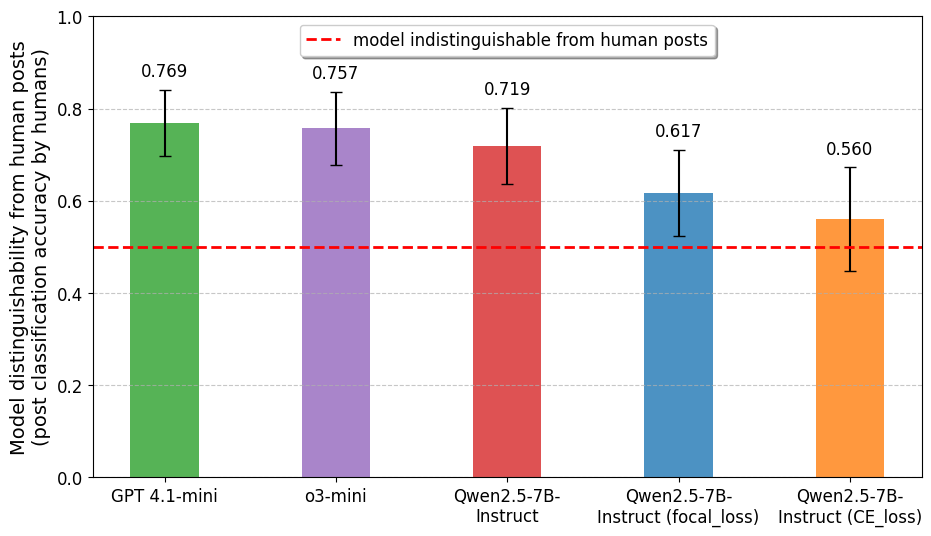

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Extract model names and calculate metrics for each
model_names = []
accuracies = []
lower_ci = []
upper_ci = []

for model_name, data in results.items():
    total = sum(data.values())
    accuracy = (data["correct"] + data["unsure"]/2) / total
    margin_error = 1.96/sqrt(total) * sqrt(accuracy * (1 - accuracy))
    
    model_names.append(model_name)
    accuracies.append(accuracy)
    lower_ci.append(accuracy - margin_error)
    upper_ci.append(accuracy + margin_error)

# Sort by accuracy in descending order
sorted_indices = np.argsort(accuracies)[::-1]
model_names = [model_names[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]
lower_ci = [lower_ci[i] for i in sorted_indices]
upper_ci = [upper_ci[i] for i in sorted_indices]

# Function to wrap text to multiple lines
def wrap_labels(labels, max_width=15):
    wrapped_labels = []
    for label in labels:
        # Split the label into multiple lines if it's too long
        if len(label) > max_width:
            words = label.split()
            lines = []
            current_line = words[0]
            
            for word in words[1:]:
                if len(current_line + ' ' + word) <= max_width:
                    current_line += ' ' + word
                else:
                    lines.append(current_line)
                    current_line = word
            
            lines.append(current_line)
            wrapped_labels.append('\n'.join(lines))
        else:
            wrapped_labels.append(label)
    return wrapped_labels

# Calculate error bar sizes
yerr = np.array([
    np.array(accuracies) - np.array(lower_ci),
    np.array(upper_ci) - np.array(accuracies)
]).T.squeeze().T

# Define colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# Reorder colors to match sorted model order
colors = [colors[i] for i in sorted_indices]

# Wrap model names to multiple lines
wrapped_model_names = model_names #wrap_labels(model_names)

# Increase the global font size
plt.rcParams.update({'font.size': 12})

# Create the bar plot with thinner bars and closer spacing
fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure to accommodate increased font sizes
bar_width = 0.4  # Wider bars to make them closer together
x_positions = np.arange(len(model_names))  # Use numeric positions for bars
bars = ax.bar(x_positions, accuracies, yerr=yerr, capsize=4, alpha=0.8, 
             width=bar_width, color=colors)

# Add red dotted line at 0.5 accuracy
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label="model indistinguishable from human posts")
# Add legend at the top of the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), 
          frameon=True, fontsize=12, shadow=True)

# Add labels and title
ax.set_ylabel('Model distinguishability from human posts\n(post classification accuracy by humans)', fontsize=14)
ax.set_ylim(0, 1.0)

# Set the x-tick positions and labels with wrapped text
ax.set_xticks(x_positions)
ax.set_xticklabels(wrapped_model_names, rotation=0, ha='center', fontsize=12)

# Add value labels above the error bars to avoid obstruction
for i, (acc, err) in enumerate(zip(accuracies, yerr[1])):
    ax.text(i, acc + err + 0.02, f'{acc:.3f}', ha='center', va='bottom', fontsize=12)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.5)  # Add some extra padding to accommodate the wrapped labels and larger fonts
plt.show()

In [21]:
mu = (54+7)/96
mu

0.6354166666666666

In [22]:
za = 1.96
za/sqrt(n) * sqrt(mu*(1-mu))

NameError: name 'n' is not defined

In [ ]:
import re
import numpy as np
import pandas as pd
from collections import defaultdict
from IPython.display import display, Markdown

def parse_clusters(input_string):
    # Parse each cluster
    cluster_pattern = r"Cluster \d+: (\{.+?\})\s+Top words:"
    clusters_data = re.findall(cluster_pattern, input_string, re.DOTALL)
    
    # Convert string representations of dictionaries to actual dictionaries
    clusters = []
    for cluster_str in clusters_data:
        # Clean up and evaluate the string to get a dictionary
        cluster_dict = eval(cluster_str)
        clusters.append(cluster_dict)
    
    # Collect metrics across all clusters
    actions = defaultdict(list)
    
    # Exclude 'total', 'users', and add all other metrics
    for cluster in clusters:
        for key, value in cluster.items():
            actions[key].append(value)
    
    # Calculate statistics
    results = []
    for action, values in actions.items():
        avg = np.mean(values)
        std = np.std(values)
        max_val = np.max(values)
        total = np.sum(values)
        
        # Get values for first two and last two clusters
        first_cluster = values[0] if len(values) > 0 else 0
        second_cluster = values[1] if len(values) > 1 else 0
        second_last_cluster = values[-2] if len(values) > 1 else 0
        last_cluster = values[-1] if len(values) > 0 else 0
        
        results.append({
            'Action': action,
            'Cluster 0': first_cluster,
            'Cluster 1': second_cluster,
            f'Cluster {len(values) - 2}': second_last_cluster,
            f'Cluster {len(values) - 1}': last_cluster,
            'Average ± std': f"{avg:.2f} ± {std:.2f}",
            'Max': max_val,
            'Total': total
        })
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Define the desired order
    order = ['posts', 'replies', 'quote', 'post_update', 'post_delete', 
             'repost', 'unrepost', 'like', 'unlike', 'follow', 
             'unfollow', 'block', 'unblock', 'total', 'users']
    
    # Sort DataFrame by the custom order
    df['order'] = df['Action'].apply(lambda x: order.index(x) if x in order else len(order))
    df = df.sort_values('order').drop('order', axis=1)
    
    # Format the LaTeX table
    latex_table = df.to_latex(index=False, escape=False)
    
    return df, latex_table

input_string = """Cluster 0: {'total': 251, 'posts': 61, 'replies': 0, 'like': 66, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 124, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 25}
  Top words: conservative, pasty, christian, pedophile, christians
Cluster 1: {'total': 44111, 'posts': 16013, 'replies': 433, 'like': 16043, 'unlike': 168, 'repost': 7, 'unrepost': 0, 'follow': 10856, 'unfollow': 99, 'block': 11, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 481, 'ignore': 0, 'users': 1307}
  Top words: they, canada, but, not, as
Cluster 2: {'total': 254, 'posts': 54, 'replies': 0, 'like': 128, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 70, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 19}
  Top words: sosha, wisconsin, rights, abortion, supreme
Cluster 3: {'total': 8312, 'posts': 2049, 'replies': 67, 'like': 2403, 'unlike': 15, 'repost': 1, 'unrepost': 0, 'follow': 3696, 'unfollow': 45, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 31, 'ignore': 0, 'users': 479}
  Top words: canada, bidding, states, oregon, california
Cluster 4: {'total': 166, 'posts': 100, 'replies': 0, 'like': 29, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 36, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 41}
  Top words: wemove, polluters, sign, deal, promotes
Cluster 5: {'total': 1081, 'posts': 229, 'replies': 2, 'like': 415, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 427, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 57}
  Top words: green, rep, censure, your, up
Cluster 6: {'total': 4225, 'posts': 609, 'replies': 3, 'like': 781, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 2800, 'unfollow': 13, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 147}
  Top words: al, green, censure, bsky, social
Cluster 7: {'total': 141, 'posts': 35, 'replies': 0, 'like': 14, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 91, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: photography, photoshoot, glamour, art, yorkshire
Cluster 8: {'total': 510, 'posts': 404, 'replies': 20, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 52, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 114}
  Top words: election, com, at, www, candidates
Cluster 9: {'total': 1781, 'posts': 1103, 'replies': 35, 'like': 226, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 405, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 213}
  Top words: she, her, but, ㅤㅤ, as
Cluster 10: {'total': 839, 'posts': 232, 'replies': 14, 'like': 193, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 389, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 71}
  Top words: perfumesky, green, sotd, fragrancesky, but
Cluster 11: {'total': 73475, 'posts': 14654, 'replies': 191, 'like': 13493, 'unlike': 82, 'repost': 7, 'unrepost': 0, 'follow': 44259, 'unfollow': 555, 'block': 15, 'unblock': 0, 'post_update': 1, 'post_delete': 1, 'quote': 217, 'ignore': 0, 'users': 1420}
  Top words: but, they, not, we, my
Cluster 12: {'total': 20377, 'posts': 1519, 'replies': 7, 'like': 3714, 'unlike': 16, 'repost': 7, 'unrepost': 0, 'follow': 14898, 'unfollow': 176, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 40, 'ignore': 0, 'users': 320}
  Top words: canadian, canada, love, we, respect
Cluster 13: {'total': 704, 'posts': 490, 'replies': 4, 'like': 27, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 179, 'unfollow': 0, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 79}
  Top words: aew, aewdynamite, wwe, vs, briscoe
Cluster 14: {'total': 3080, 'posts': 1977, 'replies': 151, 'like': 232, 'unlike': 1, 'repost': 2, 'unrepost': 0, 'follow': 655, 'unfollow': 26, 'block': 0, 'unblock': 0, 'post_update': 6, 'post_delete': 0, 'quote': 30, 'ignore': 0, 'users': 274}
  Top words: canada, cdnpoli, we, our, ca
Cluster 15: {'total': 16092, 'posts': 2868, 'replies': 19, 'like': 3005, 'unlike': 16, 'repost': 2, 'unrepost': 0, 'follow': 9918, 'unfollow': 152, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 111, 'ignore': 0, 'users': 488}
  Top words: canada, trump, he, canadian, will
Cluster 16: {'total': 9311, 'posts': 2120, 'replies': 19, 'like': 3406, 'unlike': 26, 'repost': 3, 'unrepost': 0, 'follow': 3669, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 47, 'ignore': 0, 'users': 389}
  Top words: canada, railway, canadian, furry, company
Cluster 17: {'total': 1726, 'posts': 777, 'replies': 16, 'like': 540, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 373, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 264}
  Top words: justin, he, but, was, they
Cluster 18: {'total': 8520, 'posts': 461, 'replies': 2, 'like': 1321, 'unlike': 3, 'repost': 2, 'unrepost': 0, 'follow': 6638, 'unfollow': 90, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 153}
  Top words: kelly, mark, senator, he, 2028
Cluster 19: {'total': 31879, 'posts': 14592, 'replies': 805, 'like': 4840, 'unlike': 67, 'repost': 9, 'unrepost': 0, 'follow': 10679, 'unfollow': 101, 'block': 4, 'unblock': 0, 'post_update': 127, 'post_delete': 0, 'quote': 655, 'ignore': 0, 'users': 524}
  Top words: canada, cdnpoli, carney, ca, www
Cluster 20: {'total': 4359, 'posts': 1429, 'replies': 24, 'like': 789, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 2072, 'unfollow': 25, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 411}
  Top words: but, was, my, as, movie
Cluster 21: {'total': 5504, 'posts': 2143, 'replies': 20, 'like': 1695, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 1571, 'unfollow': 50, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 471}
  Top words: green, my, but, so, not
Cluster 22: {'total': 30505, 'posts': 4963, 'replies': 77, 'like': 5029, 'unlike': 33, 'repost': 2, 'unrepost': 0, 'follow': 19967, 'unfollow': 349, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 84, 'ignore': 0, 'users': 805}
  Top words: we, they, not, election, trump
Cluster 23: {'total': 7898, 'posts': 1088, 'replies': 8, 'like': 885, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 5816, 'unfollow': 74, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 19, 'ignore': 0, 'users': 185}
  Top words: election, wisconsin, crawford, court, supreme
Cluster 24: {'total': 967, 'posts': 609, 'replies': 46, 'like': 174, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 131, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 146}
  Top words: ruby, she, her, hio, my
Cluster 25: {'total': 2734, 'posts': 732, 'replies': 1, 'like': 625, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 1356, 'unfollow': 9, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 219}
  Top words: your, all, day, we, green
Cluster 26: {'total': 7531, 'posts': 2143, 'replies': 5, 'like': 1111, 'unlike': 3, 'repost': 2, 'unrepost': 0, 'follow': 4162, 'unfollow': 86, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 372}
  Top words: com, www, job, net, jobs
Cluster 27: {'total': 35, 'posts': 32, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: rossi, esm, gvn, register, 999
Cluster 28: {'total': 4143, 'posts': 1257, 'replies': 9, 'like': 1090, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 1678, 'unfollow': 99, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 324}
  Top words: my, but, green, me, not
Cluster 29: {'total': 2809, 'posts': 284, 'replies': 1, 'like': 537, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 1945, 'unfollow': 38, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 77}
  Top words: al, censure, green, voted, rep
Cluster 30: {'total': 63, 'posts': 35, 'replies': 1, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 21, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: green, day, happy, thong, goonfuel
Cluster 31: {'total': 24, 'posts': 23, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: tickets, fang, 31st, tour, asbury
Cluster 32: {'total': 1778, 'posts': 502, 'replies': 10, 'like': 333, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 906, 'unfollow': 23, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 155}
  Top words: green, at, my, was, as
Cluster 33: {'total': 16602, 'posts': 3080, 'replies': 19, 'like': 5171, 'unlike': 32, 'repost': 4, 'unrepost': 0, 'follow': 8179, 'unfollow': 62, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 53, 'ignore': 0, 'users': 656}
  Top words: canada, canadian, but, not, they
Cluster 34: {'total': 2121, 'posts': 587, 'replies': 80, 'like': 212, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 1218, 'unfollow': 16, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 152}
  Top words: or, not, they, as, but
Cluster 35: {'total': 7137, 'posts': 1659, 'replies': 26, 'like': 2860, 'unlike': 18, 'repost': 4, 'unrepost': 0, 'follow': 2454, 'unfollow': 43, 'block': 7, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 66, 'ignore': 0, 'users': 418}
  Top words: carney, he, trump, mark, canada
Cluster 36: {'total': 2759, 'posts': 589, 'replies': 1, 'like': 856, 'unlike': 9, 'repost': 0, 'unrepost': 0, 'follow': 1243, 'unfollow': 51, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 229}
  Top words: green, but, not, yes, so
Cluster 37: {'total': 5166, 'posts': 1405, 'replies': 7, 'like': 953, 'unlike': 4, 'repost': 3, 'unrepost': 0, 'follow': 2704, 'unfollow': 68, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 21, 'ignore': 0, 'users': 250}
  Top words: 2025, canada, com, 03, www
Cluster 38: {'total': 21282, 'posts': 3276, 'replies': 65, 'like': 10029, 'unlike': 45, 'repost': 9, 'unrepost': 0, 'follow': 7632, 'unfollow': 84, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 142, 'ignore': 0, 'users': 499}
  Top words: carney, canada, mark, he, canadian
Cluster 39: {'total': 13515, 'posts': 2565, 'replies': 54, 'like': 4300, 'unlike': 20, 'repost': 0, 'unrepost': 0, 'follow': 6484, 'unfollow': 19, 'block': 2, 'unblock': 0, 'post_update': 7, 'post_delete': 0, 'quote': 64, 'ignore': 0, 'users': 613}
  Top words: canada, my, but, we, not
Cluster 40: {'total': 7050, 'posts': 1428, 'replies': 18, 'like': 619, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 4431, 'unfollow': 526, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 22, 'ignore': 0, 'users': 324}
  Top words: but, he, they, not, if
Cluster 41: {'total': 987, 'posts': 218, 'replies': 7, 'like': 167, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 590, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 78}
  Top words: 51st, canada, state, groenland, trump
Cluster 42: {'total': 16144, 'posts': 1975, 'replies': 25, 'like': 3480, 'unlike': 28, 'repost': 4, 'unrepost': 0, 'follow': 10537, 'unfollow': 52, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 39, 'ignore': 0, 'users': 492}
  Top words: my, election, but, we, not
Cluster 43: {'total': 2129, 'posts': 1433, 'replies': 25, 'like': 374, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 285, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 414}
  Top words: my, but, so, not, just
Cluster 44: {'total': 1814, 'posts': 232, 'replies': 0, 'like': 769, 'unlike': 3, 'repost': 2, 'unrepost': 0, 'follow': 792, 'unfollow': 2, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 76}
  Top words: blessing, memory, sorry, your, loss
Cluster 45: {'total': 2513, 'posts': 843, 'replies': 5, 'like': 594, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 989, 'unfollow': 74, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 233}
  Top words: my, but, so, green, me
Cluster 46: {'total': 256, 'posts': 142, 'replies': 0, 'like': 63, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 51, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 27}
  Top words: eitherway, tasks, your, as, silky
Cluster 47: {'total': 3203, 'posts': 466, 'replies': 3, 'like': 824, 'unlike': 10, 'repost': 1, 'unrepost': 0, 'follow': 1885, 'unfollow': 9, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 179}
  Top words: never, not, again, they, but
Cluster 48: {'total': 8390, 'posts': 2441, 'replies': 9, 'like': 1761, 'unlike': 12, 'repost': 0, 'unrepost': 0, 'follow': 4076, 'unfollow': 83, 'block': 0, 'unblock': 1, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 518}
  Top words: but, my, me, not, so
Cluster 49: {'total': 9701, 'posts': 1687, 'replies': 16, 'like': 2264, 'unlike': 13, 'repost': 1, 'unrepost': 0, 'follow': 5596, 'unfollow': 99, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 25, 'ignore': 0, 'users': 414}
  Top words: canada, trump, he, greenland, putin
Cluster 50: {'total': 100, 'posts': 24, 'replies': 0, 'like': 21, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 47, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: owl, eagle, kramer, owls, grouse
Cluster 51: {'total': 4095, 'posts': 339, 'replies': 0, 'like': 1136, 'unlike': 6, 'repost': 1, 'unrepost': 0, 'follow': 2601, 'unfollow': 6, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 115}
  Top words: al, green, hero, canada, rep
Cluster 52: {'total': 83, 'posts': 30, 'replies': 0, 'like': 33, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 10}
  Top words: what, politics, venmo, election, he
Cluster 53: {'total': 7569, 'posts': 1080, 'replies': 1, 'like': 1612, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 4844, 'unfollow': 12, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 289}
  Top words: green, out, they, should, was
Cluster 54: {'total': 685, 'posts': 49, 'replies': 0, 'like': 147, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 487, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: 4146, 4315, 3335, jim, 225
Cluster 55: {'total': 13745, 'posts': 2475, 'replies': 24, 'like': 3667, 'unlike': 15, 'repost': 2, 'unrepost': 0, 'follow': 7422, 'unfollow': 114, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 543}
  Top words: they, election, party, not, we
Cluster 56: {'total': 78, 'posts': 29, 'replies': 0, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 39, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: gaeilge, тя, virgin, voyages, 2025
Cluster 57: {'total': 225, 'posts': 186, 'replies': 9, 'like': 13, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 13, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 53}
  Top words: ruby, rails, rubyonrails, com, github
Cluster 58: {'total': 664, 'posts': 161, 'replies': 0, 'like': 63, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 435, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 38}
  Top words: vss365, cerulean, my, as, poem
Cluster 59: {'total': 880, 'posts': 462, 'replies': 66, 'like': 231, 'unlike': 4, 'repost': 1, 'unrepost': 0, 'follow': 106, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 116}
  Top words: helly, gemma, mark, severance, helena
Cluster 60: {'total': 131, 'posts': 47, 'replies': 0, 'like': 58, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 26, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: booksky, bookchallenge, poetrysky, poem, poetry
Cluster 61: {'total': 10899, 'posts': 4902, 'replies': 131, 'like': 2796, 'unlike': 15, 'repost': 1, 'unrepost': 0, 'follow': 2883, 'unfollow': 130, 'block': 4, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 842}
  Top words: but, not, my, they, like
Cluster 62: {'total': 12652, 'posts': 3294, 'replies': 31, 'like': 986, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 8164, 'unfollow': 122, 'block': 0, 'unblock': 0, 'post_update': 12, 'post_delete': 0, 'quote': 37, 'ignore': 0, 'users': 510}
  Top words: com, trump, www, 2025, 03
Cluster 63: {'total': 64, 'posts': 29, 'replies': 1, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 25, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: hot, irv, gemma, mark, helly
Cluster 64: {'total': 21713, 'posts': 4714, 'replies': 145, 'like': 5763, 'unlike': 38, 'repost': 4, 'unrepost': 0, 'follow': 10798, 'unfollow': 94, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 153, 'ignore': 0, 'users': 633}
  Top words: canada, not, but, we, they
Cluster 65: {'total': 2125, 'posts': 384, 'replies': 3, 'like': 619, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1107, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 118}
  Top words: green, go, not, just, my
Cluster 66: {'total': 1507, 'posts': 642, 'replies': 0, 'like': 362, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 481, 'unfollow': 19, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 189}
  Top words: please, your, sir, my, ask
Cluster 67: {'total': 4141, 'posts': 1407, 'replies': 15, 'like': 938, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 1703, 'unfollow': 67, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 413}
  Top words: but, my, album, like, so
Cluster 68: {'total': 3846, 'posts': 451, 'replies': 2, 'like': 1198, 'unlike': 6, 'repost': 1, 'unrepost': 0, 'follow': 2159, 'unfollow': 19, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 158}
  Top words: canada, hope, us, would, they
Cluster 69: {'total': 6009, 'posts': 1476, 'replies': 3, 'like': 411, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 3519, 'unfollow': 588, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 211}
  Top words: politics, com, trump, www, news
Cluster 70: {'total': 60, 'posts': 39, 'replies': 0, 'like': 15, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: rula, jonathan, richman, nowplaying, dracula
Cluster 71: {'total': 3797, 'posts': 943, 'replies': 9, 'like': 804, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 2015, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 212}
  Top words: al, green, democrats, dems, out
Cluster 72: {'total': 1813, 'posts': 770, 'replies': 17, 'like': 454, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 566, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 207}
  Top words: mark, not, hamill, my, like
Cluster 73: {'total': 3279, 'posts': 744, 'replies': 4, 'like': 952, 'unlike': 17, 'repost': 0, 'unrepost': 0, 'follow': 1539, 'unfollow': 16, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 5, 'ignore': 0, 'users': 280}
  Top words: but, not, he, they, we
Cluster 74: {'total': 10799, 'posts': 3506, 'replies': 8, 'like': 804, 'unlike': 15, 'repost': 1, 'unrepost': 0, 'follow': 6354, 'unfollow': 31, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 80, 'ignore': 0, 'users': 252}
  Top words: trump, politics, uspolitics, donaldtrump, maga
Cluster 75: {'total': 9988, 'posts': 1140, 'replies': 19, 'like': 1104, 'unlike': 7, 'repost': 2, 'unrepost': 0, 'follow': 7354, 'unfollow': 354, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 225}
  Top words: we, your, but, our, not
Cluster 76: {'total': 7380, 'posts': 1948, 'replies': 15, 'like': 1811, 'unlike': 26, 'repost': 1, 'unrepost': 0, 'follow': 3475, 'unfollow': 61, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 42, 'ignore': 0, 'users': 462}
  Top words: mark, was, my, but, he
Cluster 77: {'total': 42, 'posts': 33, 'replies': 1, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: mhaith, st, patrick, irish, day
Cluster 78: {'total': 8186, 'posts': 1173, 'replies': 7, 'like': 1377, 'unlike': 7, 'repost': 3, 'unrepost': 0, 'follow': 5546, 'unfollow': 57, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 276}
  Top words: your, we, all, not, but
Cluster 79: {'total': 368, 'posts': 45, 'replies': 0, 'like': 86, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 236, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 22}
  Top words: he, election, they, we, biden
Cluster 80: {'total': 30, 'posts': 20, 'replies': 0, 'like': 7, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: dune, roguelite, my, arcade, hippos
Cluster 81: {'total': 13148, 'posts': 1572, 'replies': 19, 'like': 1504, 'unlike': 9, 'repost': 2, 'unrepost': 0, 'follow': 9917, 'unfollow': 38, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 87, 'ignore': 0, 'users': 406}
  Top words: canada, 51st, trump, state, he
Cluster 82: {'total': 84, 'posts': 31, 'replies': 0, 'like': 20, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 33, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: commondreams, gree, al, pours, disruption
Cluster 83: {'total': 922, 'posts': 783, 'replies': 3, 'like': 72, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 58, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 163}
  Top words: mark, nrl, at, tn, celtic
Cluster 84: {'total': 5770, 'posts': 1466, 'replies': 31, 'like': 669, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 3340, 'unfollow': 259, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 407}
  Top words: my, but, me, not, so
Cluster 85: {'total': 39395, 'posts': 3851, 'replies': 38, 'like': 6004, 'unlike': 47, 'repost': 12, 'unrepost': 0, 'follow': 28955, 'unfollow': 395, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 91, 'ignore': 0, 'users': 633}
  Top words: we, not, but, your, they
Cluster 86: {'total': 1752, 'posts': 948, 'replies': 32, 'like': 477, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 280, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 282}
  Top words: but, not, they, like, was
Cluster 87: {'total': 11602, 'posts': 1203, 'replies': 11, 'like': 1574, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 8751, 'unfollow': 25, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 256}
  Top words: election, wisconsin, musk, he, court
Cluster 88: {'total': 2433, 'posts': 191, 'replies': 0, 'like': 614, 'unlike': 8, 'repost': 1, 'unrepost': 0, 'follow': 1582, 'unfollow': 35, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 72}
  Top words: he, rest, peace, rip, his
Cluster 89: {'total': 362, 'posts': 186, 'replies': 23, 'like': 80, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 69, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 53}
  Top words: mark, he, tong, his, was
Cluster 90: {'total': 565, 'posts': 286, 'replies': 3, 'like': 37, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 237, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 60}
  Top words: spicysky, realnsfw, ddlg, nsfw, onlyfans
Cluster 91: {'total': 5834, 'posts': 1678, 'replies': 22, 'like': 554, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 3462, 'unfollow': 84, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 266}
  Top words: com, trump, www, news, politics
Cluster 92: {'total': 665, 'posts': 457, 'replies': 12, 'like': 83, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 98, 'unfollow': 13, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 97}
  Top words: f1, prix, gasly, chinesegp, leclerc
Cluster 93: {'total': 2338, 'posts': 754, 'replies': 10, 'like': 326, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 1217, 'unfollow': 25, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 1, 'ignore': 0, 'users': 135}
  Top words: album, musicsky, by, nowplaying, song
Cluster 94: {'total': 12842, 'posts': 1297, 'replies': 17, 'like': 2774, 'unlike': 16, 'repost': 2, 'unrepost': 0, 'follow': 8086, 'unfollow': 622, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 27, 'ignore': 0, 'users': 442}
  Top words: she, her, but, not, was
Cluster 95: {'total': 11678, 'posts': 2111, 'replies': 2, 'like': 3168, 'unlike': 23, 'repost': 8, 'unrepost': 0, 'follow': 6318, 'unfollow': 28, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 19, 'ignore': 0, 'users': 445}
  Top words: religion, politics, election, comes, before
Cluster 96: {'total': 16088, 'posts': 4930, 'replies': 63, 'like': 3840, 'unlike': 12, 'repost': 1, 'unrepost': 0, 'follow': 7127, 'unfollow': 73, 'block': 9, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 32, 'ignore': 0, 'users': 788}
  Top words: my, but, not, so, they
Cluster 97: {'total': 1199, 'posts': 626, 'replies': 17, 'like': 210, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 314, 'unfollow': 31, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 215}
  Top words: at, my, will, april, com
Cluster 98: {'total': 5067, 'posts': 2373, 'replies': 33, 'like': 1455, 'unlike': 12, 'repost': 0, 'unrepost': 0, 'follow': 1155, 'unfollow': 5, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 31, 'ignore': 0, 'users': 559}
  Top words: but, was, he, they, not
Cluster 99: {'total': 4498, 'posts': 850, 'replies': 1, 'like': 1100, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2148, 'unfollow': 397, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 250}
  Top words: but, so, my, thank, like
Cluster 100: {'total': 34968, 'posts': 5264, 'replies': 22, 'like': 8328, 'unlike': 77, 'repost': 5, 'unrepost': 0, 'follow': 21025, 'unfollow': 183, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 59, 'ignore': 0, 'users': 911}
  Top words: they, we, not, but, he
Cluster 101: {'total': 4400, 'posts': 1130, 'replies': 4, 'like': 1170, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 2051, 'unfollow': 28, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 375}
  Top words: but, my, think, he, was
Cluster 102: {'total': 297, 'posts': 100, 'replies': 0, 'like': 101, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 95, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: mark, morning, good, rothko, xxx
Cluster 103: {'total': 6623, 'posts': 1363, 'replies': 14, 'like': 1325, 'unlike': 9, 'repost': 2, 'unrepost': 0, 'follow': 3882, 'unfollow': 23, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 420}
  Top words: but, not, my, your, so
Cluster 104: {'total': 23557, 'posts': 7748, 'replies': 447, 'like': 11228, 'unlike': 102, 'repost': 5, 'unrepost': 0, 'follow': 3520, 'unfollow': 21, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 484, 'ignore': 0, 'users': 612}
  Top words: carney, he, poilievre, canada, not
Cluster 105: {'total': 3146, 'posts': 1584, 'replies': 13, 'like': 956, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 562, 'unfollow': 17, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 375}
  Top words: but, he, they, not, think
Cluster 106: {'total': 15512, 'posts': 3869, 'replies': 50, 'like': 1329, 'unlike': 16, 'repost': 1, 'unrepost': 0, 'follow': 9717, 'unfollow': 383, 'block': 0, 'unblock': 0, 'post_update': 97, 'post_delete': 0, 'quote': 50, 'ignore': 0, 'users': 522}
  Top words: politics, brazil, valorinternational, globo, trump
Cluster 107: {'total': 11283, 'posts': 1624, 'replies': 11, 'like': 2371, 'unlike': 9, 'repost': 0, 'unrepost': 0, 'follow': 7197, 'unfollow': 44, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 26, 'ignore': 0, 'users': 340}
  Top words: he, his, trump, they, all
Cluster 108: {'total': 28, 'posts': 26, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: pax, 2025, sidequesting, paxeast, pjp
Cluster 109: {'total': 685, 'posts': 451, 'replies': 7, 'like': 137, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 88, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 187}
  Top words: my, so, but, me, can
Cluster 110: {'total': 61, 'posts': 21, 'replies': 1, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: envy, green, precure, creature, sen
Cluster 111: {'total': 3347, 'posts': 1416, 'replies': 48, 'like': 742, 'unlike': 10, 'repost': 0, 'unrepost': 0, 'follow': 1112, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 438}
  Top words: green, but, my, so, like
Cluster 112: {'total': 2299, 'posts': 1420, 'replies': 4, 'like': 140, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 718, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 28}
  Top words: gayforcongre, valimont, mobilize, cd, canvas
Cluster 113: {'total': 3542, 'posts': 653, 'replies': 3, 'like': 791, 'unlike': 8, 'repost': 1, 'unrepost': 0, 'follow': 2074, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 180}
  Top words: senate, gov, schumer, we, not
Cluster 114: {'total': 66, 'posts': 23, 'replies': 0, 'like': 12, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 29, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 10}
  Top words: misprint, reorder, me, dogmatic, canada
Cluster 115: {'total': 30891, 'posts': 2911, 'replies': 5, 'like': 5694, 'unlike': 21, 'repost': 7, 'unrepost': 0, 'follow': 22017, 'unfollow': 184, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 50, 'ignore': 0, 'users': 513}
  Top words: he, they, election, not, we
Cluster 116: {'total': 13587, 'posts': 657, 'replies': 14, 'like': 102, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10705, 'unfollow': 2064, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 45, 'ignore': 0, 'users': 155}
  Top words: bsky, social, com, politics, podcast
Cluster 117: {'total': 2571, 'posts': 587, 'replies': 40, 'like': 102, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1764, 'unfollow': 75, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 186}
  Top words: or, your, they, can, as
Cluster 118: {'total': 384, 'posts': 187, 'replies': 0, 'like': 38, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 154, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 57}
  Top words: twink, teamlocked, femboy, gaychastity, gaybdsm
Cluster 119: {'total': 95, 'posts': 72, 'replies': 0, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 18}
  Top words: racketeering, profit, illegal, by, disguised
Cluster 120: {'total': 4660, 'posts': 1611, 'replies': 77, 'like': 396, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 2351, 'unfollow': 216, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 286}
  Top words: was, by, toronto, at, otd
Cluster 121: {'total': 574, 'posts': 242, 'replies': 1, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 290, 'unfollow': 38, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 23}
  Top words: memes, blogspot, poetry, laughs, politics
Cluster 122: {'total': 3599, 'posts': 661, 'replies': 11, 'like': 674, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 2131, 'unfollow': 117, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 191}
  Top words: green, my, but, they, so
Cluster 123: {'total': 139, 'posts': 32, 'replies': 1, 'like': 61, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 44, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: trump, investors, he, as, now
Cluster 124: {'total': 13345, 'posts': 3129, 'replies': 127, 'like': 3356, 'unlike': 23, 'repost': 2, 'unrepost': 0, 'follow': 6601, 'unfollow': 37, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 70, 'ignore': 0, 'users': 565}
  Top words: election, but, not, they, he
Cluster 125: {'total': 2173, 'posts': 446, 'replies': 0, 'like': 718, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 978, 'unfollow': 26, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 98}
  Top words: poetry, photography, nature, your, my
Cluster 126: {'total': 835, 'posts': 389, 'replies': 5, 'like': 180, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 250, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 120}
  Top words: green, beans, salad, chicken, garlic
Cluster 127: {'total': 1349, 'posts': 685, 'replies': 12, 'like': 354, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 281, 'unfollow': 8, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 203}
  Top words: mark, my, but, me, not
Cluster 128: {'total': 434, 'posts': 118, 'replies': 0, 'like': 65, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 247, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 30}
  Top words: bsky, social, monika, fy, tay
Cluster 129: {'total': 24187, 'posts': 3596, 'replies': 50, 'like': 2426, 'unlike': 13, 'repost': 2, 'unrepost': 0, 'follow': 17362, 'unfollow': 663, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 75, 'ignore': 0, 'users': 651}
  Top words: trump, he, his, not, but
Cluster 130: {'total': 11386, 'posts': 2480, 'replies': 58, 'like': 2980, 'unlike': 38, 'repost': 3, 'unrepost': 0, 'follow': 5662, 'unfollow': 94, 'block': 2, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 67, 'ignore': 0, 'users': 522}
  Top words: card, green, they, not, he
Cluster 131: {'total': 365, 'posts': 53, 'replies': 0, 'like': 70, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 241, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 22}
  Top words: 38degrees, mps, politics, petitions, our
Cluster 132: {'total': 1322, 'posts': 574, 'replies': 10, 'like': 423, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 309, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 177}
  Top words: ruby, my, so, but, not
Cluster 133: {'total': 2186, 'posts': 461, 'replies': 1, 'like': 773, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 938, 'unfollow': 5, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 128}
  Top words: green, rep, dems, al, heckling
Cluster 134: {'total': 3645, 'posts': 719, 'replies': 14, 'like': 916, 'unlike': 7, 'repost': 2, 'unrepost': 0, 'follow': 1969, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 218}
  Top words: fentanyl, canada, us, border, trump
Cluster 135: {'total': 21890, 'posts': 5963, 'replies': 86, 'like': 9746, 'unlike': 43, 'repost': 7, 'unrepost': 0, 'follow': 5712, 'unfollow': 24, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 308, 'ignore': 0, 'users': 424}
  Top words: poilievre, canada, pierre, he, trump
Cluster 136: {'total': 4468, 'posts': 580, 'replies': 0, 'like': 1146, 'unlike': 7, 'repost': 2, 'unrepost': 0, 'follow': 2719, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 220}
  Top words: green, but, my, so, he
Cluster 137: {'total': 8463, 'posts': 1906, 'replies': 21, 'like': 2342, 'unlike': 11, 'repost': 1, 'unrepost': 0, 'follow': 4061, 'unfollow': 81, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 38, 'ignore': 0, 'users': 482}
  Top words: mark, he, but, green, like
Cluster 138: {'total': 315, 'posts': 128, 'replies': 15, 'like': 52, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 119, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 50}
  Top words: innie, mark, outie, gemma, severance
Cluster 139: {'total': 13232, 'posts': 2501, 'replies': 18, 'like': 3456, 'unlike': 24, 'repost': 0, 'unrepost': 0, 'follow': 7104, 'unfollow': 95, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 30, 'ignore': 0, 'users': 622}
  Top words: mark, he, but, not, they
Cluster 140: {'total': 5156, 'posts': 3146, 'replies': 32, 'like': 1146, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 794, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 607}
  Top words: my, but, so, like, me
Cluster 141: {'total': 11405, 'posts': 3187, 'replies': 23, 'like': 3451, 'unlike': 21, 'repost': 2, 'unrepost': 0, 'follow': 4652, 'unfollow': 23, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 44, 'ignore': 0, 'users': 564}
  Top words: conservative, they, not, people, their
Cluster 142: {'total': 1953, 'posts': 401, 'replies': 1, 'like': 80, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1463, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 68}
  Top words: politics, foreverblue, nevertrump, politicalcartoons, trump
Cluster 143: {'total': 5454, 'posts': 549, 'replies': 5, 'like': 788, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 4085, 'unfollow': 11, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 202}
  Top words: politics, we, fake, not, but
Cluster 144: {'total': 513, 'posts': 210, 'replies': 20, 'like': 139, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 141, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 58}
  Top words: sai, cedrek, justin, survivor, vote
Cluster 145: {'total': 7800, 'posts': 2468, 'replies': 21, 'like': 2115, 'unlike': 11, 'repost': 2, 'unrepost': 1, 'follow': 2977, 'unfollow': 174, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 647}
  Top words: but, my, not, me, so
Cluster 146: {'total': 2557, 'posts': 1010, 'replies': 32, 'like': 851, 'unlike': 9, 'repost': 0, 'unrepost': 0, 'follow': 630, 'unfollow': 9, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 283}
  Top words: green, but, not, they, at
Cluster 147: {'total': 78, 'posts': 54, 'replies': 0, 'like': 7, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 24}
  Top words: eid, eidmubarak, mubarak, holi, blessings
Cluster 148: {'total': 21256, 'posts': 5278, 'replies': 115, 'like': 6861, 'unlike': 51, 'repost': 2, 'unrepost': 0, 'follow': 8252, 'unfollow': 570, 'block': 7, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 120, 'ignore': 0, 'users': 747}
  Top words: canada, canadian, they, not, but
Cluster 149: {'total': 150, 'posts': 115, 'replies': 3, 'like': 10, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 22, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 33}
  Top words: daredevil, miller, mazzucchelli, by, frank
Cluster 150: {'total': 118, 'posts': 54, 'replies': 3, 'like': 14, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 46, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 24}
  Top words: film, movie, but, not, 365
Cluster 151: {'total': 5244, 'posts': 1538, 'replies': 97, 'like': 749, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 2799, 'unfollow': 33, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 434}
  Top words: liberal, politics, but, as, we
Cluster 152: {'total': 14513, 'posts': 1619, 'replies': 3, 'like': 2079, 'unlike': 10, 'repost': 1, 'unrepost': 0, 'follow': 10616, 'unfollow': 74, 'block': 2, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 108, 'ignore': 0, 'users': 315}
  Top words: canada, com, youtube, youtu, canadian
Cluster 153: {'total': 10249, 'posts': 2149, 'replies': 6, 'like': 2659, 'unlike': 21, 'repost': 0, 'unrepost': 0, 'follow': 5336, 'unfollow': 44, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 34, 'ignore': 0, 'users': 532}
  Top words: green, he, but, not, they
Cluster 154: {'total': 1225, 'posts': 374, 'replies': 1, 'like': 404, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 435, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 91}
  Top words: dailyhaikuprompt, haiku, green, poetry, micropoetry
Cluster 155: {'total': 45, 'posts': 37, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 18}
  Top words: we, but, playoff, roty, get
Cluster 156: {'total': 1049, 'posts': 559, 'replies': 2, 'like': 116, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 359, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 189}
  Top words: indiedev, game, gamedev, indiegame, but
Cluster 157: {'total': 1285, 'posts': 862, 'replies': 4, 'like': 88, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 321, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 110}
  Top words: 99, amazon, reg, promo, green
Cluster 158: {'total': 3184, 'posts': 219, 'replies': 0, 'like': 871, 'unlike': 0, 'repost': 2, 'unrepost': 0, 'follow': 2047, 'unfollow': 44, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 76}
  Top words: rot, they, hell, he, burn
Cluster 159: {'total': 16155, 'posts': 5243, 'replies': 84, 'like': 5048, 'unlike': 30, 'repost': 3, 'unrepost': 0, 'follow': 5445, 'unfollow': 122, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 177, 'ignore': 0, 'users': 710}
  Top words: canada, canadian, he, but, not
Cluster 160: {'total': 2102, 'posts': 698, 'replies': 11, 'like': 617, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 756, 'unfollow': 7, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 286}
  Top words: but, my, so, not, green
Cluster 161: {'total': 36, 'posts': 24, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: paper, carers, green, uk, pathways
Cluster 162: {'total': 1693, 'posts': 696, 'replies': 8, 'like': 532, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 444, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 214}
  Top words: jonathan, he, my, was, but
Cluster 163: {'total': 87247, 'posts': 16288, 'replies': 324, 'like': 6527, 'unlike': 83, 'repost': 9, 'unrepost': 0, 'follow': 61928, 'unfollow': 1757, 'block': 2, 'unblock': 0, 'post_update': 48, 'post_delete': 0, 'quote': 281, 'ignore': 0, 'users': 1057}
  Top words: trump, canada, com, he, tariffs
Cluster 164: {'total': 4827, 'posts': 994, 'replies': 46, 'like': 680, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 3047, 'unfollow': 33, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 273}
  Top words: tariffs, canada, trump, tariff, 25
Cluster 165: {'total': 60133, 'posts': 16071, 'replies': 542, 'like': 13505, 'unlike': 102, 'repost': 23, 'unrepost': 0, 'follow': 27323, 'unfollow': 912, 'block': 3, 'unblock': 0, 'post_update': 45, 'post_delete': 0, 'quote': 1607, 'ignore': 0, 'users': 879}
  Top words: canada, canadian, we, cdnpoli, canadians
Cluster 166: {'total': 1599, 'posts': 138, 'replies': 0, 'like': 27, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1299, 'unfollow': 132, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 40}
  Top words: allen, jonathan, vikings, commanders, javon
Cluster 167: {'total': 49, 'posts': 41, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: 2025, woodfield, musicboxtheatre, event, gameindustry
Cluster 168: {'total': 3380, 'posts': 1101, 'replies': 49, 'like': 1179, 'unlike': 9, 'repost': 1, 'unrepost': 0, 'follow': 994, 'unfollow': 19, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 27, 'ignore': 0, 'users': 268}
  Top words: canada, they, us, was, visa
Cluster 169: {'total': 499, 'posts': 434, 'replies': 8, 'like': 21, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 23, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 64}
  Top words: canmnt, canada, soccer, cfmtl, usmnt
Cluster 170: {'total': 24, 'posts': 21, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: carrie, humiliate, phighting, hyperlaser, sufficent
Cluster 171: {'total': 997, 'posts': 569, 'replies': 25, 'like': 256, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 146, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 177}
  Top words: but, episode, was, as, season
Cluster 172: {'total': 11468, 'posts': 2203, 'replies': 23, 'like': 927, 'unlike': 12, 'repost': 3, 'unrepost': 0, 'follow': 8213, 'unfollow': 47, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 38, 'ignore': 0, 'users': 260}
  Top words: trump, green, al, rep, com
Cluster 173: {'total': 2202, 'posts': 1079, 'replies': 50, 'like': 314, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 710, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 38, 'ignore': 0, 'users': 194}
  Top words: canada, ca, www, canadian, 𝗚𝗲𝘁
Cluster 174: {'total': 8213, 'posts': 2314, 'replies': 110, 'like': 1446, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 4242, 'unfollow': 55, 'block': 0, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 36, 'ignore': 0, 'users': 400}
  Top words: not, but, as, or, they
Cluster 175: {'total': 25, 'posts': 21, 'replies': 1, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: throwbacks, starcatchers, cambridgeshire, moe, biggest
Cluster 176: {'total': 27638, 'posts': 10166, 'replies': 248, 'like': 8901, 'unlike': 50, 'repost': 9, 'unrepost': 0, 'follow': 7992, 'unfollow': 124, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 146, 'ignore': 0, 'users': 1098}
  Top words: they, but, not, labour, as
Cluster 177: {'total': 10177, 'posts': 515, 'replies': 6, 'like': 548, 'unlike': 6, 'repost': 1, 'unrepost': 0, 'follow': 8144, 'unfollow': 951, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 206}
  Top words: green, not, but, me, don
Cluster 178: {'total': 741, 'posts': 357, 'replies': 11, 'like': 231, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 138, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 141}
  Top words: green, my, color, why, red
Cluster 179: {'total': 2059, 'posts': 432, 'replies': 4, 'like': 428, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1188, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 85}
  Top words: sen, 224, 4822, 5941, 4254
Cluster 180: {'total': 23477, 'posts': 2822, 'replies': 16, 'like': 5941, 'unlike': 31, 'repost': 9, 'unrepost': 0, 'follow': 14219, 'unfollow': 400, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 35, 'ignore': 0, 'users': 628}
  Top words: election, but, not, they, my
Cluster 181: {'total': 44596, 'posts': 6489, 'replies': 76, 'like': 7286, 'unlike': 37, 'repost': 4, 'unrepost': 0, 'follow': 29586, 'unfollow': 889, 'block': 4, 'unblock': 0, 'post_update': 13, 'post_delete': 1, 'quote': 211, 'ignore': 0, 'users': 808}
  Top words: canada, we, canadian, my, not
Cluster 182: {'total': 3134, 'posts': 985, 'replies': 11, 'like': 746, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 1367, 'unfollow': 13, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 225}
  Top words: photography, green, my, at, queerphotography
Cluster 183: {'total': 34, 'posts': 27, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 10}
  Top words: acast, keefe, podcast, history, com
Cluster 184: {'total': 32491, 'posts': 5216, 'replies': 81, 'like': 5149, 'unlike': 31, 'repost': 11, 'unrepost': 0, 'follow': 21603, 'unfollow': 343, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 56, 'ignore': 0, 'users': 707}
  Top words: election, trump, he, they, was
Cluster 185: {'total': 313, 'posts': 266, 'replies': 2, 'like': 27, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 102}
  Top words: twitch, stream, tv, we, tonight
Cluster 186: {'total': 208, 'posts': 102, 'replies': 0, 'like': 33, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 69, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 24}
  Top words: dm, aspiring, possibilities, delighted, fascinating
Cluster 187: {'total': 49, 'posts': 39, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: green, www, counterpunchmedia, 92bn, bsky
Cluster 188: {'total': 964, 'posts': 323, 'replies': 6, 'like': 100, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 530, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 68}
  Top words: https, 1994, bushmiller, fritzi, archived
Cluster 189: {'total': 31043, 'posts': 3065, 'replies': 4, 'like': 6757, 'unlike': 40, 'repost': 6, 'unrepost': 0, 'follow': 20887, 'unfollow': 229, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 50, 'ignore': 0, 'users': 589}
  Top words: he, they, we, all, his
Cluster 190: {'total': 94, 'posts': 37, 'replies': 2, 'like': 21, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 30, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 12}
  Top words: photography, nikon, kodak, f2, filmphotography
Cluster 191: {'total': 8562, 'posts': 2078, 'replies': 41, 'like': 2022, 'unlike': 12, 'repost': 2, 'unrepost': 0, 'follow': 4318, 'unfollow': 62, 'block': 4, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 19, 'ignore': 0, 'users': 512}
  Top words: green, my, but, not, was
Cluster 192: {'total': 69, 'posts': 33, 'replies': 0, 'like': 26, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: module, hobbystreak, green, floss, independentartist
Cluster 193: {'total': 6392, 'posts': 926, 'replies': 25, 'like': 511, 'unlike': 1, 'repost': 2, 'unrepost': 0, 'follow': 4854, 'unfollow': 50, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 206}
  Top words: musk, election, trump, wisconsin, elon
Cluster 194: {'total': 459, 'posts': 64, 'replies': 0, 'like': 132, 'unlike': 1, 'repost': 2, 'unrepost': 0, 'follow': 255, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 28}
  Top words: octopus, eko, octopuses, seafood, we
Cluster 195: {'total': 3120, 'posts': 1655, 'replies': 21, 'like': 360, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1028, 'unfollow': 28, 'block': 0, 'unblock': 0, 'post_update': 23, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 331}
  Top words: com, www, https, news, hackernews
Cluster 196: {'total': 524, 'posts': 77, 'replies': 0, 'like': 170, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 275, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 27}
  Top words: us, canadian, canada, yale, inhumane
Cluster 197: {'total': 2161, 'posts': 825, 'replies': 18, 'like': 288, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 1022, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 62}
  Top words: crawfordforcourt, stopshadyschimel, sbwi, wisdems, crawford
Cluster 198: {'total': 109, 'posts': 91, 'replies': 2, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 36}
  Top words: deadline, apply, applications, unive, 2025
Cluster 199: {'total': 4008, 'posts': 1600, 'replies': 17, 'like': 907, 'unlike': 10, 'repost': 1, 'unrepost': 0, 'follow': 1449, 'unfollow': 16, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 480}
  Top words: my, but, so, me, like
Cluster 200: {'total': 4585, 'posts': 762, 'replies': 0, 'like': 1330, 'unlike': 7, 'repost': 3, 'unrepost': 0, 'follow': 2466, 'unfollow': 12, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 127}
  Top words: blessing, memory, your, his, her
Cluster 201: {'total': 4608, 'posts': 1897, 'replies': 15, 'like': 1265, 'unlike': 6, 'repost': 1, 'unrepost': 0, 'follow': 1392, 'unfollow': 17, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 14, 'ignore': 0, 'users': 540}
  Top words: my, but, me, so, not
Cluster 202: {'total': 2245, 'posts': 1055, 'replies': 23, 'like': 698, 'unlike': 7, 'repost': 2, 'unrepost': 0, 'follow': 447, 'unfollow': 10, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 330}
  Top words: green, but, like, they, my
Cluster 203: {'total': 682, 'posts': 111, 'replies': 2, 'like': 89, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 466, 'unfollow': 13, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 49}
  Top words: stpatricksday, green, patrick, st, day
Cluster 204: {'total': 1978, 'posts': 1162, 'replies': 50, 'like': 196, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 551, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 11, 'ignore': 0, 'users': 214}
  Top words: party, labour, uk, green, we
Cluster 205: {'total': 61, 'posts': 40, 'replies': 0, 'like': 13, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: bookreview, booksky, buff, by, skybrarians
Cluster 206: {'total': 33950, 'posts': 4790, 'replies': 30, 'like': 6837, 'unlike': 39, 'repost': 4, 'unrepost': 0, 'follow': 22009, 'unfollow': 172, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 67, 'ignore': 0, 'users': 753}
  Top words: we, they, canada, not, but
Cluster 207: {'total': 1223, 'posts': 862, 'replies': 43, 'like': 79, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 229, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 208}
  Top words: canada, canadian, ca, immigcanada, 2025
Cluster 208: {'total': 42, 'posts': 31, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: walnut, cpoc, at, 1543, 2025
Cluster 209: {'total': 207, 'posts': 130, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 72, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: shirt, product, com, digitalart, bbb25
Cluster 210: {'total': 11280, 'posts': 1452, 'replies': 6, 'like': 4891, 'unlike': 35, 'repost': 4, 'unrepost': 0, 'follow': 4796, 'unfollow': 47, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 47, 'ignore': 0, 'users': 462}
  Top words: canada, canadian, canadians, we, but
Cluster 211: {'total': 3462, 'posts': 1151, 'replies': 50, 'like': 830, 'unlike': 5, 'repost': 2, 'unrepost': 0, 'follow': 1410, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 223}
  Top words: frank, anthony, he, iero, but
Cluster 212: {'total': 52015, 'posts': 10615, 'replies': 72, 'like': 11094, 'unlike': 60, 'repost': 6, 'unrepost': 0, 'follow': 29624, 'unfollow': 380, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 159, 'ignore': 0, 'users': 1165}
  Top words: he, they, trump, not, but
Cluster 213: {'total': 125, 'posts': 88, 'replies': 14, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 16, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 44}
  Top words: rna, we, cell, genome, cells
Cluster 214: {'total': 143, 'posts': 110, 'replies': 1, 'like': 12, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 20, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 25}
  Top words: porn, com, anal, aigay, dozer
Cluster 215: {'total': 2718, 'posts': 691, 'replies': 0, 'like': 665, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1343, 'unfollow': 16, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 163}
  Top words: good, your, day, morning, night
Cluster 216: {'total': 1078, 'posts': 291, 'replies': 4, 'like': 291, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 436, 'unfollow': 48, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 124}
  Top words: mickey, ruffalo, 17, mark, pattinson
Cluster 217: {'total': 2780, 'posts': 1686, 'replies': 67, 'like': 321, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 662, 'unfollow': 36, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 337}
  Top words: he, his, her, as, but
Cluster 218: {'total': 1329, 'posts': 589, 'replies': 3, 'like': 280, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 451, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 64}
  Top words: mayday, protest, we, fiftyfifty, democracyforward
Cluster 219: {'total': 27037, 'posts': 2083, 'replies': 9, 'like': 3280, 'unlike': 14, 'repost': 3, 'unrepost': 0, 'follow': 21530, 'unfollow': 88, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 28, 'ignore': 0, 'users': 423}
  Top words: election, he, trump, they, his
Cluster 220: {'total': 10423, 'posts': 3522, 'replies': 188, 'like': 2112, 'unlike': 22, 'repost': 4, 'unrepost': 0, 'follow': 4436, 'unfollow': 73, 'block': 1, 'unblock': 0, 'post_update': 10, 'post_delete': 1, 'quote': 54, 'ignore': 0, 'users': 580}
  Top words: not, but, politics, as, they
Cluster 221: {'total': 3998, 'posts': 309, 'replies': 0, 'like': 1191, 'unlike': 6, 'repost': 2, 'unrepost': 0, 'follow': 2477, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 120}
  Top words: canada, she, he, not, we
Cluster 222: {'total': 88, 'posts': 65, 'replies': 1, 'like': 17, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 12}
  Top words: davis, mark, aewcollision, aewdynamite, my
Cluster 223: {'total': 99, 'posts': 38, 'replies': 0, 'like': 16, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 32, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 10}
  Top words: leadnow, petition, campaigns, investigate, ca
Cluster 224: {'total': 5347, 'posts': 1850, 'replies': 40, 'like': 1299, 'unlike': 10, 'repost': 3, 'unrepost': 0, 'follow': 2074, 'unfollow': 57, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 12, 'ignore': 0, 'users': 479}
  Top words: but, was, my, album, song
Cluster 225: {'total': 18691, 'posts': 3822, 'replies': 70, 'like': 4675, 'unlike': 30, 'repost': 3, 'unrepost': 0, 'follow': 9912, 'unfollow': 74, 'block': 6, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 99, 'ignore': 0, 'users': 706}
  Top words: but, my, not, they, was
Cluster 226: {'total': 1240, 'posts': 294, 'replies': 2, 'like': 702, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 230, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 54}
  Top words: thewildimages, green, photography, photo, adding
Cluster 227: {'total': 1156, 'posts': 74, 'replies': 0, 'like': 127, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 947, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 30}
  Top words: but, willing, sacrifice, some, die
Cluster 228: {'total': 5996, 'posts': 779, 'replies': 0, 'like': 637, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 3930, 'unfollow': 644, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 245}
  Top words: but, my, not, just, need
Cluster 229: {'total': 2713, 'posts': 2531, 'replies': 146, 'like': 6, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 26, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 154}
  Top words: 2503, arxiv, abs, https, org
Cluster 230: {'total': 1738, 'posts': 1109, 'replies': 10, 'like': 321, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 292, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 378}
  Top words: my, but, so, not, some
Cluster 231: {'total': 1279, 'posts': 154, 'replies': 0, 'like': 305, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 801, 'unfollow': 15, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 54}
  Top words: god, bless, allah, protect, your
Cluster 232: {'total': 11875, 'posts': 2111, 'replies': 6, 'like': 3395, 'unlike': 47, 'repost': 2, 'unrepost': 0, 'follow': 6266, 'unfollow': 27, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 19, 'ignore': 0, 'users': 570}
  Top words: canada, they, he, if, not
Cluster 233: {'total': 11642, 'posts': 3951, 'replies': 35, 'like': 3867, 'unlike': 34, 'repost': 1, 'unrepost': 0, 'follow': 3657, 'unfollow': 43, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 51, 'ignore': 0, 'users': 668}
  Top words: my, but, green, me, like
Cluster 234: {'total': 9821, 'posts': 2981, 'replies': 114, 'like': 3379, 'unlike': 35, 'repost': 2, 'unrepost': 0, 'follow': 3230, 'unfollow': 20, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 60, 'ignore': 0, 'users': 731}
  Top words: conservative, they, but, not, their
Cluster 235: {'total': 55533, 'posts': 6875, 'replies': 43, 'like': 8703, 'unlike': 52, 'repost': 11, 'unrepost': 0, 'follow': 39401, 'unfollow': 276, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 169, 'ignore': 0, 'users': 721}
  Top words: canada, we, green, he, trump
Cluster 236: {'total': 35217, 'posts': 11197, 'replies': 196, 'like': 13297, 'unlike': 158, 'repost': 7, 'unrepost': 0, 'follow': 9547, 'unfollow': 605, 'block': 16, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 194, 'ignore': 0, 'users': 1161}
  Top words: they, politics, but, election, not
Cluster 237: {'total': 1205, 'posts': 598, 'replies': 35, 'like': 64, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 503, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 182}
  Top words: green, at, our, we, www
Cluster 238: {'total': 3619, 'posts': 625, 'replies': 5, 'like': 1064, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 1904, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 208}
  Top words: election, 2028, 07m, will, we
Cluster 239: {'total': 1507, 'posts': 234, 'replies': 0, 'like': 206, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 940, 'unfollow': 122, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 42}
  Top words: om, canon, photography, wildlifephotography, ii
Cluster 240: {'total': 440, 'posts': 39, 'replies': 0, 'like': 207, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 190, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 10}
  Top words: vive, canada, le, long, live
Cluster 241: {'total': 8340, 'posts': 2162, 'replies': 85, 'like': 2051, 'unlike': 10, 'repost': 1, 'unrepost': 0, 'follow': 3893, 'unfollow': 71, 'block': 1, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 63, 'ignore': 0, 'users': 488}
  Top words: canada, trump, tariffs, he, us
Cluster 242: {'total': 19852, 'posts': 3220, 'replies': 58, 'like': 3149, 'unlike': 22, 'repost': 2, 'unrepost': 0, 'follow': 13296, 'unfollow': 48, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 55, 'ignore': 0, 'users': 687}
  Top words: but, not, they, as, people
Cluster 243: {'total': 999, 'posts': 187, 'replies': 2, 'like': 115, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 687, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 85}
  Top words: women, we, day, internationalwomensday, international
Cluster 244: {'total': 742, 'posts': 61, 'replies': 0, 'like': 42, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 636, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 19}
  Top words: phd, elected, physics, oxford, turnip
Cluster 245: {'total': 3866, 'posts': 1169, 'replies': 33, 'like': 850, 'unlike': 9, 'repost': 1, 'unrepost': 0, 'follow': 1731, 'unfollow': 31, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 41, 'ignore': 0, 'users': 269}
  Top words: carney, kanada, canada, mark, trump
Cluster 246: {'total': 3508, 'posts': 527, 'replies': 1, 'like': 44, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2863, 'unfollow': 73, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 57}
  Top words: my, your, help, we, our
Cluster 247: {'total': 22, 'posts': 21, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: repossession, indiedev, inhalation, steampowered, toolbox
Cluster 248: {'total': 2422, 'posts': 1008, 'replies': 13, 'like': 710, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 617, 'unfollow': 62, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 337}
  Top words: but, if, not, my, just
Cluster 249: {'total': 437, 'posts': 58, 'replies': 0, 'like': 121, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 257, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: green, bsky, social, al, repmoskowitz
Cluster 250: {'total': 27820, 'posts': 4007, 'replies': 7, 'like': 5110, 'unlike': 35, 'repost': 9, 'unrepost': 0, 'follow': 18230, 'unfollow': 372, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 49, 'ignore': 0, 'users': 681}
  Top words: trump, canada, he, election, they
Cluster 251: {'total': 227, 'posts': 23, 'replies': 0, 'like': 29, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 173, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: phd, bankruptcies, felonies, smithsonian, carnival
Cluster 252: {'total': 859, 'posts': 544, 'replies': 18, 'like': 167, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 120, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 167}
  Top words: devil, cry, dmc, evanescence, but
Cluster 253: {'total': 5924, 'posts': 1762, 'replies': 17, 'like': 968, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 3091, 'unfollow': 52, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 25, 'ignore': 0, 'users': 283}
  Top words: canada, canadian, rob, social, bsky
Cluster 254: {'total': 3025, 'posts': 583, 'replies': 4, 'like': 774, 'unlike': 8, 'repost': 1, 'unrepost': 0, 'follow': 1639, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 217}
  Top words: mark, but, beast, my, or
Cluster 255: {'total': 20312, 'posts': 2002, 'replies': 13, 'like': 4095, 'unlike': 48, 'repost': 2, 'unrepost': 0, 'follow': 14058, 'unfollow': 68, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 25, 'ignore': 0, 'users': 465}
  Top words: kelly, mark, he, we, not
Cluster 256: {'total': 5610, 'posts': 2356, 'replies': 53, 'like': 1364, 'unlike': 10, 'repost': 0, 'unrepost': 0, 'follow': 1668, 'unfollow': 141, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 14, 'ignore': 0, 'users': 569}
  Top words: but, not, or, if, my
Cluster 257: {'total': 27, 'posts': 21, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: green, guitar, rathalos, settle, ps2
Cluster 258: {'total': 272, 'posts': 234, 'replies': 1, 'like': 24, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 61}
  Top words: twitch, tv, materia, www, est
Cluster 259: {'total': 81966, 'posts': 29979, 'replies': 1900, 'like': 34502, 'unlike': 198, 'repost': 19, 'unrepost': 0, 'follow': 13257, 'unfollow': 90, 'block': 12, 'unblock': 0, 'post_update': 13, 'post_delete': 0, 'quote': 1996, 'ignore': 0, 'users': 1315}
  Top words: canada, he, we, not, but
Cluster 260: {'total': 4952, 'posts': 1002, 'replies': 14, 'like': 847, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 3049, 'unfollow': 22, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 14, 'ignore': 0, 'users': 218}
  Top words: al, green, censure, rep, democrats
Cluster 261: {'total': 29, 'posts': 24, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: exhibition, mbta, morris, malcolm, livepainting
Cluster 262: {'total': 2641, 'posts': 324, 'replies': 7, 'like': 512, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 1776, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 92}
  Top words: election, wisconsin, supreme, wi, court
Cluster 263: {'total': 781, 'posts': 654, 'replies': 4, 'like': 27, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 92, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 59}
  Top words: aircraft, km, adsb, detected, boeing
Cluster 264: {'total': 22, 'posts': 20, 'replies': 1, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: criticised, bigla, semana, dito, ngayon
Cluster 265: {'total': 6042, 'posts': 1346, 'replies': 24, 'like': 1304, 'unlike': 8, 'repost': 1, 'unrepost': 0, 'follow': 3250, 'unfollow': 97, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 414}
  Top words: but, not, your, they, we
Cluster 266: {'total': 14451, 'posts': 2057, 'replies': 12, 'like': 3899, 'unlike': 32, 'repost': 2, 'unrepost': 0, 'follow': 8269, 'unfollow': 144, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 35, 'ignore': 0, 'users': 510}
  Top words: but, not, they, if, my
Cluster 267: {'total': 8479, 'posts': 1714, 'replies': 21, 'like': 1889, 'unlike': 14, 'repost': 5, 'unrepost': 0, 'follow': 4717, 'unfollow': 85, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 472}
  Top words: but, not, they, as, he
Cluster 268: {'total': 5229, 'posts': 1816, 'replies': 4, 'like': 1473, 'unlike': 16, 'repost': 0, 'unrepost': 0, 'follow': 1895, 'unfollow': 15, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 500}
  Top words: but, not, my, as, like
Cluster 269: {'total': 56, 'posts': 41, 'replies': 2, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: signum, uk, neuengamme, portals, 2025
Cluster 270: {'total': 13060, 'posts': 1645, 'replies': 3, 'like': 3291, 'unlike': 18, 'repost': 4, 'unrepost': 0, 'follow': 7959, 'unfollow': 116, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 422}
  Top words: he, peace, rest, your, so
Cluster 271: {'total': 2302, 'posts': 932, 'replies': 58, 'like': 626, 'unlike': 9, 'repost': 0, 'unrepost': 0, 'follow': 653, 'unfollow': 11, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 191}
  Top words: card, green, he, not, terrorist
Cluster 272: {'total': 10188, 'posts': 1566, 'replies': 21, 'like': 3164, 'unlike': 22, 'repost': 1, 'unrepost': 0, 'follow': 5189, 'unfollow': 37, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 187, 'ignore': 0, 'users': 298}
  Top words: carney, canada, mark, minister, prime
Cluster 273: {'total': 6273, 'posts': 1462, 'replies': 86, 'like': 1960, 'unlike': 23, 'repost': 0, 'unrepost': 0, 'follow': 2676, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 58, 'ignore': 0, 'users': 345}
  Top words: canada, us, canadian, tariffs, not
Cluster 274: {'total': 47, 'posts': 45, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: green, canvas, booby, セーラームーン, sailormoon
Cluster 275: {'total': 49, 'posts': 46, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 19}
  Top words: scovell, ticketsource, uk, foylesforbooks, tickets
Cluster 276: {'total': 24, 'posts': 22, 'replies': 0, 'like': 1, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: nasfaa, ncga, unm, women, will
Cluster 277: {'total': 28622, 'posts': 8399, 'replies': 206, 'like': 6282, 'unlike': 28, 'repost': 7, 'unrepost': 0, 'follow': 12037, 'unfollow': 427, 'block': 0, 'unblock': 0, 'post_update': 29, 'post_delete': 0, 'quote': 1207, 'ignore': 0, 'users': 441}
  Top words: canada, cdnpoli, canadasky, elbowsup, canadastrong
Cluster 278: {'total': 3748, 'posts': 1664, 'replies': 6, 'like': 981, 'unlike': 9, 'repost': 0, 'unrepost': 0, 'follow': 1060, 'unfollow': 18, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 492}
  Top words: my, but, me, not, think
Cluster 279: {'total': 13520, 'posts': 2513, 'replies': 8, 'like': 3739, 'unlike': 14, 'repost': 6, 'unrepost': 0, 'follow': 6995, 'unfollow': 219, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 574}
  Top words: they, election, not, he, trump
Cluster 280: {'total': 3849, 'posts': 2017, 'replies': 45, 'like': 746, 'unlike': 12, 'repost': 0, 'unrepost': 0, 'follow': 961, 'unfollow': 61, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 576}
  Top words: but, my, so, not, as
Cluster 281: {'total': 17656, 'posts': 1900, 'replies': 2, 'like': 4473, 'unlike': 19, 'repost': 4, 'unrepost': 0, 'follow': 10510, 'unfollow': 719, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 390}
  Top words: canada, canadian, we, he, canadians
Cluster 282: {'total': 125, 'posts': 62, 'replies': 0, 'like': 25, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 38, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 22}
  Top words: help, yeee, ask, sit, hug
Cluster 283: {'total': 10778, 'posts': 1022, 'replies': 3, 'like': 1842, 'unlike': 11, 'repost': 0, 'unrepost': 0, 'follow': 7743, 'unfollow': 27, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 130, 'ignore': 0, 'users': 161}
  Top words: canada, canadian, strong, stand, buy
Cluster 284: {'total': 8175, 'posts': 1089, 'replies': 2, 'like': 2967, 'unlike': 11, 'repost': 6, 'unrepost': 0, 'follow': 3977, 'unfollow': 14, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 108, 'ignore': 0, 'users': 232}
  Top words: elbows, canada, up, canadian, we
Cluster 285: {'total': 292, 'posts': 184, 'replies': 10, 'like': 23, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 71, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 41}
  Top words: prefecture, 2023, blackwork, maps, allegorical
Cluster 286: {'total': 96, 'posts': 90, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 19}
  Top words: verlander, bb, sfgiants, ip, justin
Cluster 287: {'total': 23881, 'posts': 3873, 'replies': 30, 'like': 2723, 'unlike': 23, 'repost': 1, 'unrepost': 0, 'follow': 17047, 'unfollow': 111, 'block': 2, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 70, 'ignore': 0, 'users': 529}
  Top words: politics, trump, we, he, not
Cluster 288: {'total': 27866, 'posts': 10099, 'replies': 163, 'like': 10835, 'unlike': 92, 'repost': 4, 'unrepost': 0, 'follow': 6320, 'unfollow': 104, 'block': 18, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 230, 'ignore': 0, 'users': 1136}
  Top words: but, not, he, they, was
Cluster 289: {'total': 2383, 'posts': 690, 'replies': 1, 'like': 540, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 1134, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 243}
  Top words: ask, if, what, your, my
Cluster 290: {'total': 1085, 'posts': 983, 'replies': 9, 'like': 44, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 45, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 136}
  Top words: reb, kuminga, pts, sixers, nba
Cluster 291: {'total': 491, 'posts': 256, 'replies': 3, 'like': 77, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 151, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 76}
  Top words: fields, justin, qb, steelers, jets
Cluster 292: {'total': 1077, 'posts': 213, 'replies': 0, 'like': 261, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 591, 'unfollow': 12, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 79}
  Top words: green, so, looks, beautiful, love
Cluster 293: {'total': 3356, 'posts': 330, 'replies': 3, 'like': 332, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2651, 'unfollow': 37, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 71}
  Top words: allah, your, my, dnt, god
Cluster 294: {'total': 3268, 'posts': 1355, 'replies': 85, 'like': 852, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 951, 'unfollow': 4, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 273}
  Top words: mark, helly, gemma, severance, was
Cluster 295: {'total': 697, 'posts': 356, 'replies': 3, 'like': 128, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 205, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 134}
  Top words: green, day, my, st, patrick
Cluster 296: {'total': 37365, 'posts': 9528, 'replies': 217, 'like': 8802, 'unlike': 65, 'repost': 4, 'unrepost': 0, 'follow': 18182, 'unfollow': 235, 'block': 11, 'unblock': 0, 'post_update': 8, 'post_delete': 1, 'quote': 312, 'ignore': 0, 'users': 1119}
  Top words: canada, but, not, they, was
Cluster 297: {'total': 1179, 'posts': 740, 'replies': 19, 'like': 208, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 194, 'unfollow': 15, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 125}
  Top words: march, directed, by, filmsky, frank
Cluster 298: {'total': 4306, 'posts': 1105, 'replies': 67, 'like': 553, 'unlike': 4, 'repost': 2, 'unrepost': 0, 'follow': 2452, 'unfollow': 111, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 206}
  Top words: covid, measles, not, but, www
Cluster 299: {'total': 46, 'posts': 42, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 18}
  Top words: abstracts, submissions, abstract, submit, 2025
Cluster 300: {'total': 12614, 'posts': 3758, 'replies': 113, 'like': 2636, 'unlike': 14, 'repost': 3, 'unrepost': 0, 'follow': 5840, 'unfollow': 191, 'block': 3, 'unblock': 0, 'post_update': 8, 'post_delete': 0, 'quote': 48, 'ignore': 0, 'users': 718}
  Top words: but, not, as, was, my
Cluster 301: {'total': 97, 'posts': 53, 'replies': 3, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 13, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: by, green, montauk, bayside, her
Cluster 302: {'total': 45, 'posts': 22, 'replies': 1, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 18, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: pif, tick, telomere, genitals, intersex
Cluster 303: {'total': 2263, 'posts': 2050, 'replies': 10, 'like': 81, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 121, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 125}
  Top words: action, sponsor, bill, 2025, referred
Cluster 304: {'total': 11422, 'posts': 2230, 'replies': 22, 'like': 2200, 'unlike': 20, 'repost': 2, 'unrepost': 0, 'follow': 6886, 'unfollow': 23, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 38, 'ignore': 0, 'users': 379}
  Top words: aoc, bernie, klobuchar, murphy, duckworth
Cluster 305: {'total': 22273, 'posts': 8797, 'replies': 99, 'like': 6898, 'unlike': 52, 'repost': 1, 'unrepost': 0, 'follow': 6226, 'unfollow': 92, 'block': 15, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 92, 'ignore': 0, 'users': 1153}
  Top words: but, not, my, was, they
Cluster 306: {'total': 22343, 'posts': 2188, 'replies': 7, 'like': 4831, 'unlike': 33, 'repost': 4, 'unrepost': 0, 'follow': 15059, 'unfollow': 188, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 32, 'ignore': 0, 'users': 599}
  Top words: they, but, not, we, canada
Cluster 307: {'total': 6012, 'posts': 1483, 'replies': 61, 'like': 1690, 'unlike': 14, 'repost': 0, 'unrepost': 0, 'follow': 2648, 'unfollow': 95, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 484}
  Top words: politics, not, people, they, but
Cluster 308: {'total': 44, 'posts': 41, 'replies': 1, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: twitch, tv, stream, facecam, my
Cluster 309: {'total': 1141, 'posts': 907, 'replies': 20, 'like': 64, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 142, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 218}
  Top words: uk, www, at, green, news
Cluster 310: {'total': 1824, 'posts': 277, 'replies': 0, 'like': 462, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1079, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 108}
  Top words: odds, favor, your, force, ever
Cluster 311: {'total': 2863, 'posts': 1180, 'replies': 1, 'like': 923, 'unlike': 10, 'repost': 0, 'unrepost': 0, 'follow': 727, 'unfollow': 10, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 418}
  Top words: but, my, not, so, if
Cluster 312: {'total': 59, 'posts': 32, 'replies': 1, 'like': 8, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 18, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: carbuncle, glace, taeyong, united24, u24
Cluster 313: {'total': 997, 'posts': 104, 'replies': 0, 'like': 169, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 717, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 39}
  Top words: levernews, leonard, leo, tied, groups
Cluster 314: {'total': 19490, 'posts': 3391, 'replies': 21, 'like': 3114, 'unlike': 12, 'repost': 2, 'unrepost': 0, 'follow': 12737, 'unfollow': 151, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 60, 'ignore': 0, 'users': 519}
  Top words: trump, green, al, he, they
Cluster 315: {'total': 1927, 'posts': 475, 'replies': 7, 'like': 42, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1273, 'unfollow': 127, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 141}
  Top words: mark, com, episode, promised, minute
Cluster 316: {'total': 4080, 'posts': 1216, 'replies': 10, 'like': 211, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2632, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 252}
  Top words: com, app, www, search, source
Cluster 317: {'total': 650, 'posts': 237, 'replies': 0, 'like': 248, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 161, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 49}
  Top words: musicchallenge, 30daysongchallenge, sentimental, 31greatwomenmusicians, day
Cluster 318: {'total': 13192, 'posts': 1456, 'replies': 26, 'like': 1368, 'unlike': 10, 'repost': 2, 'unrepost': 0, 'follow': 10206, 'unfollow': 103, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 21, 'ignore': 0, 'users': 332}
  Top words: kelly, mark, musk, elon, traitor
Cluster 319: {'total': 17838, 'posts': 2508, 'replies': 36, 'like': 4259, 'unlike': 31, 'repost': 3, 'unrepost': 0, 'follow': 10726, 'unfollow': 205, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 70, 'ignore': 0, 'users': 537}
  Top words: canada, we, trump, us, canadian
Cluster 320: {'total': 25, 'posts': 24, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: vinyl, delasoul, audiotorium, sunspot, sleeve
Cluster 321: {'total': 265, 'posts': 128, 'replies': 1, 'like': 10, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 125, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 54}
  Top words: week, schedule, stream, est, streams
Cluster 322: {'total': 5832, 'posts': 1110, 'replies': 5, 'like': 1561, 'unlike': 14, 'repost': 7, 'unrepost': 0, 'follow': 3096, 'unfollow': 25, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 338}
  Top words: our, movement, we, interest, they
Cluster 323: {'total': 50216, 'posts': 5752, 'replies': 4, 'like': 12500, 'unlike': 70, 'repost': 11, 'unrepost': 0, 'follow': 31398, 'unfollow': 310, 'block': 9, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 162, 'ignore': 0, 'users': 707}
  Top words: canada, we, he, election, they
Cluster 324: {'total': 76, 'posts': 24, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 49, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: mark, kyra, srilanka, cosmos, 1480
Cluster 325: {'total': 40, 'posts': 25, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 13, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: 30th, wilbert, boehm, anniversary, dookie
Cluster 326: {'total': 12052, 'posts': 1610, 'replies': 11, 'like': 2644, 'unlike': 21, 'repost': 2, 'unrepost': 0, 'follow': 7675, 'unfollow': 78, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 381}
  Top words: green, my, but, we, so
Cluster 327: {'total': 1603, 'posts': 893, 'replies': 12, 'like': 263, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 421, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 243}
  Top words: my, me, your, but, her
Cluster 328: {'total': 10039, 'posts': 2001, 'replies': 45, 'like': 2200, 'unlike': 18, 'repost': 1, 'unrepost': 0, 'follow': 5683, 'unfollow': 76, 'block': 2, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 486}
  Top words: but, my, not, they, if
Cluster 329: {'total': 709, 'posts': 306, 'replies': 7, 'like': 14, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 379, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 105}
  Top words: eu, green, social, bsky, europe
Cluster 330: {'total': 4988, 'posts': 1081, 'replies': 30, 'like': 1129, 'unlike': 13, 'repost': 0, 'unrepost': 0, 'follow': 2559, 'unfollow': 158, 'block': 3, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 298}
  Top words: trans, not, people, they, as
Cluster 331: {'total': 1119, 'posts': 86, 'replies': 1, 'like': 78, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 950, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 22}
  Top words: calif, jim, conn, kaptur, gluesenkamp
Cluster 332: {'total': 13923, 'posts': 2572, 'replies': 24, 'like': 4564, 'unlike': 31, 'repost': 4, 'unrepost': 0, 'follow': 6607, 'unfollow': 21, 'block': 2, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 93, 'ignore': 0, 'users': 481}
  Top words: canada, canadian, trump, canadians, us
Cluster 333: {'total': 591, 'posts': 436, 'replies': 0, 'like': 49, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 100, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 135}
  Top words: twitch, tv, vtuber, twitchstreamer, stream
Cluster 334: {'total': 6650, 'posts': 834, 'replies': 5, 'like': 1449, 'unlike': 8, 'repost': 1, 'unrepost': 0, 'follow': 4233, 'unfollow': 113, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 215}
  Top words: al, green, lead, we, nice
Cluster 335: {'total': 103, 'posts': 60, 'replies': 3, 'like': 20, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 18, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 27}
  Top words: severance, mark, season, invincible, finale
Cluster 336: {'total': 630, 'posts': 569, 'replies': 7, 'like': 14, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 39, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 83}
  Top words: theaters, disney, avengers, doomsday, trailer
Cluster 337: {'total': 1506, 'posts': 635, 'replies': 36, 'like': 694, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 136, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 100}
  Top words: your, aries, venus, moon, pisces
Cluster 338: {'total': 12043, 'posts': 2711, 'replies': 76, 'like': 3274, 'unlike': 23, 'repost': 1, 'unrepost': 0, 'follow': 5898, 'unfollow': 25, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 30, 'ignore': 0, 'users': 549}
  Top words: not, they, but, if, or
Cluster 339: {'total': 32588, 'posts': 4316, 'replies': 56, 'like': 3602, 'unlike': 36, 'repost': 6, 'unrepost': 0, 'follow': 23247, 'unfollow': 1184, 'block': 4, 'unblock': 0, 'post_update': 19, 'post_delete': 0, 'quote': 118, 'ignore': 0, 'users': 689}
  Top words: but, not, we, com, they
Cluster 340: {'total': 3824, 'posts': 1739, 'replies': 16, 'like': 1056, 'unlike': 11, 'repost': 0, 'unrepost': 0, 'follow': 978, 'unfollow': 15, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 500}
  Top words: my, but, not, as, so
Cluster 341: {'total': 1084, 'posts': 296, 'replies': 5, 'like': 287, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 488, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 83}
  Top words: puzzle, wordle, connections, green, purple
Cluster 342: {'total': 15174, 'posts': 2240, 'replies': 28, 'like': 4117, 'unlike': 19, 'repost': 10, 'unrepost': 0, 'follow': 8589, 'unfollow': 31, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 139, 'ignore': 0, 'users': 422}
  Top words: canada, www, com, ca, canadian
Cluster 343: {'total': 86, 'posts': 23, 'replies': 0, 'like': 10, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 52, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 10}
  Top words: fingerprint, fonts, passcode, lei, fascistic
Cluster 344: {'total': 40, 'posts': 27, 'replies': 0, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: ehrenreich, alden, fansite, markhamillofficial, adoring
Cluster 345: {'total': 61, 'posts': 37, 'replies': 5, 'like': 18, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: mccall, genevieve, 10, kohler, duggan
Cluster 346: {'total': 399, 'posts': 209, 'replies': 15, 'like': 96, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 76, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 79}
  Top words: jonathan, sterne, his, he, was
Cluster 347: {'total': 37517, 'posts': 6921, 'replies': 50, 'like': 11701, 'unlike': 72, 'repost': 4, 'unrepost': 0, 'follow': 18442, 'unfollow': 202, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 123, 'ignore': 0, 'users': 975}
  Top words: canada, they, he, not, will
Cluster 348: {'total': 83, 'posts': 50, 'replies': 1, 'like': 15, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: qwer, babymonster, jennie, aespa, newjeans
Cluster 349: {'total': 26031, 'posts': 8720, 'replies': 166, 'like': 6427, 'unlike': 57, 'repost': 5, 'unrepost': 0, 'follow': 10286, 'unfollow': 165, 'block': 8, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 196, 'ignore': 0, 'users': 1019}
  Top words: but, not, they, he, trump
Cluster 350: {'total': 437, 'posts': 115, 'replies': 2, 'like': 69, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 240, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 36}
  Top words: green, my, me, your, sagebrush
Cluster 351: {'total': 260, 'posts': 119, 'replies': 3, 'like': 56, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 80, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 47}
  Top words: green, beans, rice, dinner, sauce
Cluster 352: {'total': 47, 'posts': 22, 'replies': 0, 'like': 17, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: studs, knitting, baguette, chapter, poppy
Cluster 353: {'total': 1697, 'posts': 230, 'replies': 1, 'like': 291, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 1168, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 83}
  Top words: green, al, out, should, they
Cluster 354: {'total': 6412, 'posts': 905, 'replies': 2, 'like': 1939, 'unlike': 16, 'repost': 2, 'unrepost': 0, 'follow': 3523, 'unfollow': 13, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 210}
  Top words: al, green, censure, your, voted
Cluster 355: {'total': 38, 'posts': 31, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: dana, boulderreportinglab, rei, mercado, he
Cluster 356: {'total': 26, 'posts': 23, 'replies': 1, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: emu, her, rosy, ash, quicksand
Cluster 357: {'total': 225, 'posts': 74, 'replies': 1, 'like': 44, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 103, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 24}
  Top words: 2024, vgencomm, regretevator, near, cheeseburger
Cluster 358: {'total': 14593, 'posts': 6482, 'replies': 228, 'like': 4897, 'unlike': 53, 'repost': 0, 'unrepost': 0, 'follow': 2764, 'unfollow': 32, 'block': 26, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 110, 'ignore': 0, 'users': 887}
  Top words: but, they, not, politics, as
Cluster 359: {'total': 69, 'posts': 23, 'replies': 1, 'like': 29, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 16, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: canadian, he, his, canada, nardwuar
Cluster 360: {'total': 2102, 'posts': 186, 'replies': 1, 'like': 333, 'unlike': 3, 'repost': 1, 'unrepost': 0, 'follow': 1569, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 58}
  Top words: rigged, election, trump, he, admitted
Cluster 361: {'total': 156, 'posts': 62, 'replies': 0, 'like': 33, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 61, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: 2our, theusa, tvshow, realtime, petehegseth
Cluster 362: {'total': 3733, 'posts': 765, 'replies': 2, 'like': 961, 'unlike': 13, 'repost': 1, 'unrepost': 0, 'follow': 1979, 'unfollow': 7, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 166}
  Top words: youtu, green, youtube, watch, com
Cluster 363: {'total': 17672, 'posts': 2360, 'replies': 33, 'like': 4331, 'unlike': 68, 'repost': 2, 'unrepost': 0, 'follow': 10727, 'unfollow': 80, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 70, 'ignore': 0, 'users': 488}
  Top words: canada, canadian, we, my, us
Cluster 364: {'total': 2957, 'posts': 1574, 'replies': 36, 'like': 883, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 434, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 358}
  Top words: mark, but, so, like, my
Cluster 365: {'total': 30932, 'posts': 2943, 'replies': 5, 'like': 7016, 'unlike': 36, 'repost': 6, 'unrepost': 0, 'follow': 20754, 'unfollow': 144, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 546}
  Top words: canada, he, election, not, they
Cluster 366: {'total': 15175, 'posts': 2786, 'replies': 18, 'like': 1520, 'unlike': 6, 'repost': 5, 'unrepost': 0, 'follow': 10630, 'unfollow': 97, 'block': 1, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 108, 'ignore': 0, 'users': 319}
  Top words: youtube, com, canada, trump, youtu
Cluster 367: {'total': 887, 'posts': 285, 'replies': 14, 'like': 363, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 213, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 121}
  Top words: green, blue, yellow, but, they
Cluster 368: {'total': 7798, 'posts': 2838, 'replies': 18, 'like': 1650, 'unlike': 19, 'repost': 0, 'unrepost': 0, 'follow': 3205, 'unfollow': 52, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 14, 'ignore': 0, 'users': 542}
  Top words: my, but, so, me, not
Cluster 369: {'total': 645, 'posts': 134, 'replies': 0, 'like': 13, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 495, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 27}
  Top words: pinned, my, please, boost, hello
Cluster 370: {'total': 2147, 'posts': 954, 'replies': 7, 'like': 578, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 600, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 275}
  Top words: so, my, but, green, he
Cluster 371: {'total': 2516, 'posts': 1352, 'replies': 21, 'like': 561, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 559, 'unfollow': 13, 'block': 1, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 444}
  Top words: but, game, my, so, like
Cluster 372: {'total': 10095, 'posts': 2976, 'replies': 59, 'like': 1626, 'unlike': 8, 'repost': 2, 'unrepost': 0, 'follow': 5235, 'unfollow': 107, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 81, 'ignore': 0, 'users': 443}
  Top words: trump, canada, he, tariffs, us
Cluster 373: {'total': 620, 'posts': 534, 'replies': 7, 'like': 41, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 35, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 83}
  Top words: goal, scored, green, league, assists
Cluster 374: {'total': 997, 'posts': 699, 'replies': 14, 'like': 152, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 128, 'unfollow': 1, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 99}
  Top words: comicstrip, by, gocomics, doonesbury, comic
Cluster 375: {'total': 323, 'posts': 95, 'replies': 1, 'like': 35, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 192, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 32}
  Top words: 2024, naturephotography, photography, goodvibes, nationalparks
Cluster 376: {'total': 14737, 'posts': 4586, 'replies': 106, 'like': 4859, 'unlike': 55, 'repost': 0, 'unrepost': 0, 'follow': 4974, 'unfollow': 102, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 52, 'ignore': 0, 'users': 777}
  Top words: they, not, but, people, as
Cluster 377: {'total': 1206, 'posts': 846, 'replies': 13, 'like': 126, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 213, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 181}
  Top words: com, new, will, at, www
Cluster 378: {'total': 565, 'posts': 365, 'replies': 6, 'like': 43, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 147, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 139}
  Top words: stream, week, schedule, we, my
Cluster 379: {'total': 1209, 'posts': 128, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1073, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: ada35961, gofund, tents, displaced, any
Cluster 380: {'total': 310, 'posts': 207, 'replies': 10, 'like': 14, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 73, 'unfollow': 3, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 83}
  Top words: lecture, at, 2025, eventbrite, dr
Cluster 381: {'total': 1655, 'posts': 686, 'replies': 6, 'like': 548, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 412, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 213}
  Top words: green, hole, par, shot, he
Cluster 382: {'total': 10464, 'posts': 1929, 'replies': 11, 'like': 2357, 'unlike': 17, 'repost': 1, 'unrepost': 0, 'follow': 6031, 'unfollow': 93, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 403}
  Top words: al, green, they, we, not
Cluster 383: {'total': 39, 'posts': 24, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: but, compressor, backer, logical, appear
Cluster 384: {'total': 18120, 'posts': 2815, 'replies': 15, 'like': 4056, 'unlike': 28, 'repost': 4, 'unrepost': 0, 'follow': 11112, 'unfollow': 33, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 55, 'ignore': 0, 'users': 619}
  Top words: he, they, trump, his, not
Cluster 385: {'total': 189, 'posts': 114, 'replies': 1, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 72, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: yyt, metal, newfoundlandandlabrador, stjohns, 2025
Cluster 386: {'total': 8839, 'posts': 2703, 'replies': 46, 'like': 2556, 'unlike': 18, 'repost': 3, 'unrepost': 0, 'follow': 3445, 'unfollow': 34, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 622}
  Top words: they, dems, election, democrats, not
Cluster 387: {'total': 3488, 'posts': 931, 'replies': 4, 'like': 474, 'unlike': 5, 'repost': 2, 'unrepost': 0, 'follow': 2028, 'unfollow': 37, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 349}
  Top words: but, my, not, me, at
Cluster 388: {'total': 128, 'posts': 21, 'replies': 2, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 78, 'unfollow': 16, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: busty, boudoir, bikini, swimsuit, model
Cluster 389: {'total': 29, 'posts': 28, 'replies': 1, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: pintofscience, 2025, quench, pint, science
Cluster 390: {'total': 3951, 'posts': 1467, 'replies': 20, 'like': 923, 'unlike': 10, 'repost': 1, 'unrepost': 0, 'follow': 1476, 'unfollow': 48, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 185}
  Top words: canada, photography, landscapephotography, nature, britishcolumbia
Cluster 391: {'total': 15940, 'posts': 1677, 'replies': 4, 'like': 4142, 'unlike': 18, 'repost': 0, 'unrepost': 0, 'follow': 9868, 'unfollow': 210, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 19, 'ignore': 0, 'users': 462}
  Top words: canada, they, election, we, he
Cluster 392: {'total': 3493, 'posts': 2014, 'replies': 38, 'like': 881, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 515, 'unfollow': 40, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 511}
  Top words: but, game, not, like, so
Cluster 393: {'total': 112, 'posts': 46, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 64, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 18}
  Top words: massage, icg, doi, relaxation, aav
Cluster 394: {'total': 684, 'posts': 151, 'replies': 3, 'like': 110, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 417, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 56}
  Top words: travel, advisories, united, canada, countries
Cluster 395: {'total': 1370, 'posts': 469, 'replies': 3, 'like': 170, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 720, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 117}
  Top words: com, music, youtube, entertainmentnews, youtu
Cluster 396: {'total': 716, 'posts': 67, 'replies': 2, 'like': 55, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 515, 'unfollow': 76, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 22}
  Top words: or, 2635, gain, 702, private
Cluster 397: {'total': 526, 'posts': 345, 'replies': 10, 'like': 18, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 147, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 133}
  Top words: dr, social, bsky, health, research
Cluster 398: {'total': 289, 'posts': 218, 'replies': 2, 'like': 48, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 20, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 36}
  Top words: bvb, chukwuemeka, jonathan, manchester, mufc
Cluster 399: {'total': 36314, 'posts': 6527, 'replies': 18, 'like': 11283, 'unlike': 48, 'repost': 7, 'unrepost': 0, 'follow': 18182, 'unfollow': 146, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 100, 'ignore': 0, 'users': 785}
  Top words: canada, he, trump, they, election
Cluster 400: {'total': 25454, 'posts': 4906, 'replies': 95, 'like': 1478, 'unlike': 8, 'repost': 2, 'unrepost': 0, 'follow': 18472, 'unfollow': 445, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 48, 'ignore': 0, 'users': 376}
  Top words: trump, canada, tariffs, us, canadian
Cluster 401: {'total': 161, 'posts': 148, 'replies': 1, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 26}
  Top words: cosplay, boise, 2025, comic, convention
Cluster 402: {'total': 889, 'posts': 677, 'replies': 10, 'like': 49, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 143, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 134}
  Top words: ras, nfl, unofficial, draft, wr
Cluster 403: {'total': 24008, 'posts': 7635, 'replies': 86, 'like': 1813, 'unlike': 28, 'repost': 3, 'unrepost': 0, 'follow': 13647, 'unfollow': 728, 'block': 0, 'unblock': 0, 'post_update': 17, 'post_delete': 0, 'quote': 51, 'ignore': 0, 'users': 539}
  Top words: com, trump, www, canada, news
Cluster 404: {'total': 2698, 'posts': 279, 'replies': 4, 'like': 473, 'unlike': 6, 'repost': 2, 'unrepost': 0, 'follow': 1916, 'unfollow': 11, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 102}
  Top words: green, biden, marjorie, al, censured
Cluster 405: {'total': 58, 'posts': 36, 'replies': 2, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 16, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 19}
  Top words: patrick, green, st, day, art
Cluster 406: {'total': 648, 'posts': 217, 'replies': 0, 'like': 280, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 147, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 52}
  Top words: 7pm, weizman, mjcca, mon, dc
Cluster 407: {'total': 1061, 'posts': 877, 'replies': 12, 'like': 51, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 116, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 179}
  Top words: indianafever, wnba, at, mark, com
Cluster 408: {'total': 39, 'posts': 34, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: eventsair, bird, early, 2025, asn
Cluster 409: {'total': 16051, 'posts': 6232, 'replies': 88, 'like': 4375, 'unlike': 49, 'repost': 1, 'unrepost': 0, 'follow': 5182, 'unfollow': 51, 'block': 6, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 67, 'ignore': 0, 'users': 732}
  Top words: liberal, they, not, but, like
Cluster 410: {'total': 6348, 'posts': 341, 'replies': 27, 'like': 66, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 5159, 'unfollow': 753, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 110}
  Top words: women, womenshistorymonth, was, her, woman
Cluster 411: {'total': 1230, 'posts': 319, 'replies': 7, 'like': 105, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 785, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 90}
  Top words: allah, eid, mubarak, ramadan, your
Cluster 412: {'total': 3393, 'posts': 370, 'replies': 2, 'like': 467, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 2524, 'unfollow': 27, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 76}
  Top words: justin, morning, good, thank, day
Cluster 413: {'total': 12087, 'posts': 1282, 'replies': 2, 'like': 2979, 'unlike': 14, 'repost': 4, 'unrepost': 0, 'follow': 7554, 'unfollow': 222, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 359}
  Top words: your, they, not, but, we
Cluster 414: {'total': 30579, 'posts': 11832, 'replies': 642, 'like': 8573, 'unlike': 49, 'repost': 11, 'unrepost': 0, 'follow': 8451, 'unfollow': 69, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 951, 'ignore': 0, 'users': 488}
  Top words: poilievre, canada, he, trump, carney
Cluster 415: {'total': 57, 'posts': 44, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 20}
  Top words: 2025, org, at, bioinformatics, tfk
Cluster 416: {'total': 256, 'posts': 158, 'replies': 10, 'like': 43, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 43, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 30}
  Top words: yves, chuu, instagram, artms, my
Cluster 417: {'total': 31, 'posts': 30, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: devil, dante, devilmaycry, dmc, cry
Cluster 418: {'total': 229, 'posts': 161, 'replies': 6, 'like': 14, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 45, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 57}
  Top words: submissions, endoftheworldpublishing, ends, anthology, we
Cluster 419: {'total': 24675, 'posts': 4209, 'replies': 62, 'like': 5859, 'unlike': 25, 'repost': 5, 'unrepost': 0, 'follow': 14279, 'unfollow': 145, 'block': 6, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 85, 'ignore': 0, 'users': 723}
  Top words: canada, my, but, canadian, not
Cluster 420: {'total': 512, 'posts': 184, 'replies': 0, 'like': 160, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 165, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 60}
  Top words: wemove, polluters, sign, deal, promotes
Cluster 421: {'total': 987, 'posts': 711, 'replies': 12, 'like': 73, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 182, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 242}
  Top words: 2025, at, org, ly, our
Cluster 422: {'total': 25, 'posts': 21, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: reactjs, gitnation, react, workshops, badges
Cluster 423: {'total': 13042, 'posts': 2453, 'replies': 15, 'like': 3727, 'unlike': 17, 'repost': 2, 'unrepost': 0, 'follow': 6729, 'unfollow': 65, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 31, 'ignore': 0, 'users': 568}
  Top words: not, he, but, they, election
Cluster 424: {'total': 198, 'posts': 20, 'replies': 0, 'like': 40, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 114, 'unfollow': 19, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 10}
  Top words: canada, now, right, canadian, sneeringly
Cluster 425: {'total': 95, 'posts': 42, 'replies': 2, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 40, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 19}
  Top words: baldur, was, but, s3, they
Cluster 426: {'total': 11217, 'posts': 2809, 'replies': 62, 'like': 1686, 'unlike': 21, 'repost': 0, 'unrepost': 0, 'follow': 6534, 'unfollow': 53, 'block': 0, 'unblock': 0, 'post_update': 7, 'post_delete': 0, 'quote': 45, 'ignore': 0, 'users': 325}
  Top words: auspol, election, dutton, australia, au
Cluster 427: {'total': 515, 'posts': 140, 'replies': 2, 'like': 26, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 347, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 40}
  Top words: ruby, rwby, rubyrose, sandstorm, jennie
Cluster 428: {'total': 117, 'posts': 87, 'replies': 0, 'like': 17, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 13, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 29}
  Top words: vtuber, envtuber, vsky, stream, twitch
Cluster 429: {'total': 4395, 'posts': 722, 'replies': 4, 'like': 1372, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2172, 'unfollow': 121, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 210}
  Top words: green, photography, nature, my, eastcoastkin
Cluster 430: {'total': 92, 'posts': 72, 'replies': 1, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 28}
  Top words: vtuber, envtuber, schedule, stream, week
Cluster 431: {'total': 62, 'posts': 50, 'replies': 1, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 20}
  Top words: bursary, apply, remote, applications, 000
Cluster 432: {'total': 9736, 'posts': 1050, 'replies': 5, 'like': 2205, 'unlike': 20, 'repost': 1, 'unrepost': 0, 'follow': 6332, 'unfollow': 99, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 305}
  Top words: green, censure, al, voted, democrats
Cluster 433: {'total': 33158, 'posts': 8160, 'replies': 135, 'like': 7621, 'unlike': 72, 'repost': 1, 'unrepost': 0, 'follow': 16525, 'unfollow': 549, 'block': 8, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 87, 'ignore': 0, 'users': 949}
  Top words: not, they, but, we, people
Cluster 434: {'total': 3878, 'posts': 1095, 'replies': 6, 'like': 1256, 'unlike': 6, 'repost': 1, 'unrepost': 0, 'follow': 1462, 'unfollow': 41, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 319}
  Top words: green, but, not, my, was
Cluster 435: {'total': 6932, 'posts': 902, 'replies': 18, 'like': 1783, 'unlike': 13, 'repost': 3, 'unrepost': 0, 'follow': 4170, 'unfollow': 14, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 28, 'ignore': 0, 'users': 287}
  Top words: trudeau, he, canada, trump, justin
Cluster 436: {'total': 3234, 'posts': 592, 'replies': 6, 'like': 595, 'unlike': 5, 'repost': 2, 'unrepost': 0, 'follow': 1949, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 78, 'ignore': 0, 'users': 155}
  Top words: canada, com, www, youtube, cdnpoli
Cluster 437: {'total': 592, 'posts': 267, 'replies': 0, 'like': 2, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 266, 'unfollow': 54, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 40}
  Top words: nfl, justin, nbcsports, vikings, qb
Cluster 438: {'total': 863, 'posts': 144, 'replies': 5, 'like': 108, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 604, 'unfollow': 1, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 50}
  Top words: mark, crypto, he, as, not
Cluster 439: {'total': 1099, 'posts': 501, 'replies': 56, 'like': 362, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 171, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 147}
  Top words: mark, he, invincible, but, was
Cluster 440: {'total': 15800, 'posts': 2301, 'replies': 4, 'like': 3801, 'unlike': 18, 'repost': 8, 'unrepost': 0, 'follow': 9485, 'unfollow': 154, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 599}
  Top words: he, not, but, his, him
Cluster 441: {'total': 2002, 'posts': 916, 'replies': 16, 'like': 439, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 615, 'unfollow': 12, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 171}
  Top words: by, frank, mark, green, frazetta
Cluster 442: {'total': 13607, 'posts': 1342, 'replies': 2, 'like': 312, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 11666, 'unfollow': 273, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 96}
  Top words: bluecrew, resist, politics, fafo, trump
Cluster 443: {'total': 345, 'posts': 182, 'replies': 6, 'like': 47, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 108, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 38}
  Top words: tarot, tarotsky, pentacles, your, wands
Cluster 444: {'total': 2554, 'posts': 545, 'replies': 2, 'like': 893, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 1101, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 81}
  Top words: photography, photographersofbluesky, eastcoastkin, canada, fineart
Cluster 445: {'total': 2055, 'posts': 245, 'replies': 0, 'like': 377, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 1427, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 102}
  Top words: words, mark, my, will, they
Cluster 446: {'total': 38231, 'posts': 11483, 'replies': 578, 'like': 7336, 'unlike': 47, 'repost': 8, 'unrepost': 0, 'follow': 17563, 'unfollow': 325, 'block': 0, 'unblock': 0, 'post_update': 13, 'post_delete': 0, 'quote': 878, 'ignore': 0, 'users': 749}
  Top words: canada, trump, canadian, he, us
Cluster 447: {'total': 15582, 'posts': 4371, 'replies': 87, 'like': 4562, 'unlike': 54, 'repost': 0, 'unrepost': 0, 'follow': 6414, 'unfollow': 42, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 49, 'ignore': 0, 'users': 709}
  Top words: election, they, not, people, was
Cluster 448: {'total': 22639, 'posts': 5849, 'replies': 129, 'like': 7150, 'unlike': 58, 'repost': 3, 'unrepost': 0, 'follow': 9234, 'unfollow': 71, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 140, 'ignore': 0, 'users': 804}
  Top words: canada, us, not, trump, but
Cluster 449: {'total': 1591, 'posts': 631, 'replies': 2, 'like': 346, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 586, 'unfollow': 23, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 113}
  Top words: birds, birdphotography, photography, wildlife, wildlifephotography
Cluster 450: {'total': 903, 'posts': 520, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 373, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: my, amputated, stingy, gofund, provide
Cluster 451: {'total': 36, 'posts': 27, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: ai, moti, reshaping, beth, blog
Cluster 452: {'total': 1722, 'posts': 632, 'replies': 6, 'like': 546, 'unlike': 3, 'repost': 2, 'unrepost': 0, 'follow': 524, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 233}
  Top words: green, day, my, st, patrick
Cluster 453: {'total': 236, 'posts': 28, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 206, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: gorom, création, quebec, infos, gofund
Cluster 454: {'total': 142, 'posts': 136, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: ticketmaster, beyhive, metlife, cowboycarter, rutherford
Cluster 455: {'total': 154, 'posts': 93, 'replies': 0, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 33, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: 20, no, 20bookchallenge, explanations, day
Cluster 456: {'total': 5322, 'posts': 1973, 'replies': 27, 'like': 1806, 'unlike': 12, 'repost': 1, 'unrepost': 0, 'follow': 1462, 'unfollow': 24, 'block': 3, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 532}
  Top words: green, my, but, was, at
Cluster 457: {'total': 257, 'posts': 32, 'replies': 0, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 214, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: conservative, men, piercings, bidet, deadass
Cluster 458: {'total': 4769, 'posts': 2611, 'replies': 69, 'like': 1388, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 654, 'unfollow': 30, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 641}
  Top words: but, he, not, she, her
Cluster 459: {'total': 599, 'posts': 325, 'replies': 6, 'like': 167, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 99, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 96}
  Top words: de, een, en, het, van
Cluster 460: {'total': 31414, 'posts': 12523, 'replies': 490, 'like': 11746, 'unlike': 119, 'repost': 3, 'unrepost': 0, 'follow': 6209, 'unfollow': 66, 'block': 15, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 243, 'ignore': 0, 'users': 1225}
  Top words: they, but, politics, not, election
Cluster 461: {'total': 689, 'posts': 557, 'replies': 9, 'like': 10, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 112, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 135}
  Top words: at, theatre, com, tickets, www
Cluster 462: {'total': 65, 'posts': 23, 'replies': 0, 'like': 18, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 24, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: hallo, hur, glide, unedited, delete
Cluster 463: {'total': 166, 'posts': 123, 'replies': 1, 'like': 26, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 15, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 35}
  Top words: eurovision, kaj, melfest, but, sanremo
Cluster 464: {'total': 6596, 'posts': 1337, 'replies': 14, 'like': 644, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 4567, 'unfollow': 33, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 154}
  Top words: good, morning, your, day, happy
Cluster 465: {'total': 2293, 'posts': 949, 'replies': 8, 'like': 704, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 603, 'unfollow': 15, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 294}
  Top words: green, my, but, so, me
Cluster 466: {'total': 695, 'posts': 560, 'replies': 9, 'like': 16, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 105, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 168}
  Top words: 2025, register, conference, iba, ly
Cluster 467: {'total': 5241, 'posts': 2128, 'replies': 28, 'like': 1525, 'unlike': 22, 'repost': 0, 'unrepost': 0, 'follow': 1487, 'unfollow': 24, 'block': 6, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 21, 'ignore': 0, 'users': 587}
  Top words: but, my, book, not, so
Cluster 468: {'total': 904, 'posts': 185, 'replies': 2, 'like': 104, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 602, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 65}
  Top words: censure, al, trump, green, democrats
Cluster 469: {'total': 2274, 'posts': 768, 'replies': 17, 'like': 320, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 1153, 'unfollow': 9, 'block': 2, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 201}
  Top words: com, album, mark, music, was
Cluster 470: {'total': 2947, 'posts': 836, 'replies': 4, 'like': 1161, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 915, 'unfollow': 19, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 278}
  Top words: green, my, but, not, so
Cluster 471: {'total': 546, 'posts': 378, 'replies': 8, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 151, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 95}
  Top words: 2025, tickets, at, com, tour
Cluster 472: {'total': 33, 'posts': 20, 'replies': 1, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: today, writingcommunity, writerscafe, hygge, 5amwritersclub
Cluster 473: {'total': 4212, 'posts': 2444, 'replies': 22, 'like': 1048, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 643, 'unfollow': 4, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 46, 'ignore': 0, 'users': 514}
  Top words: green, but, he, not, they
Cluster 474: {'total': 32, 'posts': 25, 'replies': 0, 'like': 3, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: gorton, m18, 929, com, pastries
Cluster 475: {'total': 399, 'posts': 262, 'replies': 3, 'like': 19, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 115, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 74}
  Top words: canada, kawarthanow, canadian, at, metabolomics
Cluster 476: {'total': 5013, 'posts': 796, 'replies': 4, 'like': 616, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 3509, 'unfollow': 83, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 150}
  Top words: པད, padme, mani, hum, om
Cluster 477: {'total': 79, 'posts': 36, 'replies': 0, 'like': 37, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: eko, octopus, octopuses, stop, action
Cluster 478: {'total': 4125, 'posts': 622, 'replies': 3, 'like': 883, 'unlike': 7, 'repost': 2, 'unrepost': 0, 'follow': 2592, 'unfollow': 14, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 134}
  Top words: vote, no, schumer, senator, cloture
Cluster 479: {'total': 23, 'posts': 20, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 10}
  Top words: stpatricksday, patrick, signlanguage, day, green
Cluster 480: {'total': 25, 'posts': 24, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: msu, lan, vtol, our, we
Cluster 481: {'total': 8219, 'posts': 1199, 'replies': 18, 'like': 2185, 'unlike': 16, 'repost': 1, 'unrepost': 0, 'follow': 4417, 'unfollow': 378, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 318}
  Top words: green, but, my, so, not
Cluster 482: {'total': 16017, 'posts': 5954, 'replies': 159, 'like': 5977, 'unlike': 46, 'repost': 5, 'unrepost': 0, 'follow': 3689, 'unfollow': 81, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 106, 'ignore': 0, 'users': 846}
  Top words: but, not, they, as, if
Cluster 483: {'total': 4279, 'posts': 1609, 'replies': 58, 'like': 970, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 1623, 'unfollow': 12, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 473}
  Top words: but, not, my, or, if
Cluster 484: {'total': 7354, 'posts': 1344, 'replies': 5, 'like': 1136, 'unlike': 10, 'repost': 1, 'unrepost': 0, 'follow': 4832, 'unfollow': 21, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 396}
  Top words: my, your, but, me, not
Cluster 485: {'total': 28, 'posts': 21, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: ikke, har, kirby, endnu, winkleman
Cluster 486: {'total': 3382, 'posts': 263, 'replies': 0, 'like': 268, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 2558, 'unfollow': 292, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 86}
  Top words: catsofbluesky, dogsofbluesky, caturday, cats, my
Cluster 487: {'total': 14502, 'posts': 2307, 'replies': 10, 'like': 4070, 'unlike': 30, 'repost': 2, 'unrepost': 0, 'follow': 7972, 'unfollow': 73, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 37, 'ignore': 0, 'users': 565}
  Top words: he, canada, trump, his, not
Cluster 488: {'total': 618, 'posts': 90, 'replies': 13, 'like': 121, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 389, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 42}
  Top words: logan, card, interrogated, airport, green
Cluster 489: {'total': 2780, 'posts': 758, 'replies': 34, 'like': 481, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 1481, 'unfollow': 7, 'block': 1, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 246}
  Top words: card, khalil, green, mahmoud, his
Cluster 490: {'total': 1125, 'posts': 707, 'replies': 20, 'like': 86, 'unlike': 3, 'repost': 1, 'unrepost': 0, 'follow': 302, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 199}
  Top words: at, social, bsky, www, com
Cluster 491: {'total': 30, 'posts': 27, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: reall, symposium, 2025, ebc, programme
Cluster 492: {'total': 128, 'posts': 91, 'replies': 0, 'like': 28, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 27}
  Top words: subscribepage, newsletter, bonifasko, ly, our
Cluster 493: {'total': 3014, 'posts': 1112, 'replies': 40, 'like': 294, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1538, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 237}
  Top words: not, but, as, or, their
Cluster 494: {'total': 23, 'posts': 18, 'replies': 1, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: my, jedi, bob, he, hollowcrownfans
Cluster 495: {'total': 411, 'posts': 251, 'replies': 1, 'like': 18, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 141, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 52}
  Top words: godswill, bible, wixsite, lord, god
Cluster 496: {'total': 62, 'posts': 26, 'replies': 0, 'like': 16, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 19, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: suppressions, remember, about, biden, orders
Cluster 497: {'total': 1144, 'posts': 57, 'replies': 3, 'like': 150, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 933, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 21}
  Top words: canada, 1814, 1867, canadians, house
Cluster 498: {'total': 276, 'posts': 140, 'replies': 3, 'like': 19, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 93, 'unfollow': 19, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 44}
  Top words: ych, furryart, commissions, slots, commsopen
Cluster 499: {'total': 16812, 'posts': 2199, 'replies': 3, 'like': 4437, 'unlike': 26, 'repost': 2, 'unrepost': 0, 'follow': 10070, 'unfollow': 48, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 405}
  Top words: canada, they, election, green, not
Cluster 500: {'total': 13806, 'posts': 1124, 'replies': 2, 'like': 3105, 'unlike': 24, 'repost': 1, 'unrepost': 0, 'follow': 9476, 'unfollow': 48, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 342}
  Top words: canada, not, canadian, he, we
Cluster 501: {'total': 483, 'posts': 64, 'replies': 0, 'like': 140, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 274, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 22}
  Top words: so, perm, res, holder, he
Cluster 502: {'total': 24311, 'posts': 3748, 'replies': 21, 'like': 7067, 'unlike': 51, 'repost': 9, 'unrepost': 0, 'follow': 13156, 'unfollow': 186, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 72, 'ignore': 0, 'users': 541}
  Top words: canada, canadian, we, us, canadians
Cluster 503: {'total': 974, 'posts': 677, 'replies': 5, 'like': 74, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 216, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 143}
  Top words: album, com, new, out, release
Cluster 504: {'total': 4112, 'posts': 602, 'replies': 4, 'like': 589, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 2856, 'unfollow': 27, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 31, 'ignore': 0, 'users': 107}
  Top words: election, rigged, span, trump, www
Cluster 505: {'total': 695, 'posts': 285, 'replies': 7, 'like': 266, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 132, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 92}
  Top words: green, but, wildflowerhour, as, agapostemon
Cluster 506: {'total': 127, 'posts': 20, 'replies': 0, 'like': 32, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 75, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: green, canada, conservative, light, doesn
Cluster 507: {'total': 3493, 'posts': 1061, 'replies': 5, 'like': 741, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 1641, 'unfollow': 28, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 300}
  Top words: but, thearchers, not, my, we
Cluster 508: {'total': 4115, 'posts': 1686, 'replies': 51, 'like': 1089, 'unlike': 9, 'repost': 1, 'unrepost': 0, 'follow': 1149, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 127, 'ignore': 0, 'users': 109}
  Top words: canada, never51state, neverpoilievre, tradewar, supportlocal
Cluster 509: {'total': 87227, 'posts': 26095, 'replies': 907, 'like': 40621, 'unlike': 224, 'repost': 25, 'unrepost': 0, 'follow': 17507, 'unfollow': 379, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1465, 'ignore': 0, 'users': 1138}
  Top words: he, canada, carney, not, they
Cluster 510: {'total': 1075, 'posts': 521, 'replies': 16, 'like': 193, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 337, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 151}
  Top words: 2025mmm, species, but, they, green
Cluster 511: {'total': 70654, 'posts': 17436, 'replies': 147, 'like': 20233, 'unlike': 125, 'repost': 9, 'unrepost': 0, 'follow': 31667, 'unfollow': 728, 'block': 14, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 295, 'ignore': 0, 'users': 1545}
  Top words: they, not, but, he, canada
Cluster 512: {'total': 2851, 'posts': 234, 'replies': 3, 'like': 178, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 2350, 'unfollow': 81, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 78}
  Top words: eichorn, justin, minnesota, soliciting, arrested
Cluster 513: {'total': 86120, 'posts': 26295, 'replies': 677, 'like': 23173, 'unlike': 164, 'repost': 15, 'unrepost': 0, 'follow': 33994, 'unfollow': 866, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 2, 'quote': 929, 'ignore': 0, 'users': 1209}
  Top words: canada, we, us, canadian, trump
Cluster 514: {'total': 41, 'posts': 35, 'replies': 0, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: nostr, bestiality, cnc, incest, btc
Cluster 515: {'total': 1583, 'posts': 889, 'replies': 10, 'like': 426, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 247, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 195}
  Top words: gh, but, he, she, her
Cluster 516: {'total': 165, 'posts': 114, 'replies': 3, 'like': 15, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 31, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 25}
  Top words: 765, 45pm, residents, 2025, contest
Cluster 517: {'total': 2647, 'posts': 1288, 'replies': 31, 'like': 369, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 928, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 356}
  Top words: com, politics, social, substack, bsky
Cluster 518: {'total': 1920, 'posts': 687, 'replies': 14, 'like': 710, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 473, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 27, 'ignore': 0, 'users': 113}
  Top words: danielle, smith, ableg, abpoli, canada
Cluster 519: {'total': 308, 'posts': 164, 'replies': 6, 'like': 90, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 47, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 59}
  Top words: album, new, bandcamp, bsky, social
Cluster 520: {'total': 1071, 'posts': 725, 'replies': 8, 'like': 159, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 168, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 255}
  Top words: stream, my, but, so, streaming
Cluster 521: {'total': 16547, 'posts': 5160, 'replies': 26, 'like': 4216, 'unlike': 20, 'repost': 2, 'unrepost': 0, 'follow': 6993, 'unfollow': 94, 'block': 6, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 30, 'ignore': 0, 'users': 772}
  Top words: but, my, so, not, just
Cluster 522: {'total': 50228, 'posts': 7259, 'replies': 29, 'like': 14315, 'unlike': 64, 'repost': 31, 'unrepost': 0, 'follow': 28055, 'unfollow': 233, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 239, 'ignore': 0, 'users': 592}
  Top words: canada, we, canadian, trump, canadians
Cluster 523: {'total': 3502, 'posts': 327, 'replies': 2, 'like': 801, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 2342, 'unfollow': 24, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 122}
  Top words: canada, than, us, americans, more
Cluster 524: {'total': 146, 'posts': 46, 'replies': 0, 'like': 31, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 69, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: our, himself, support, considers, accountable
Cluster 525: {'total': 2233, 'posts': 758, 'replies': 22, 'like': 690, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 721, 'unfollow': 33, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 260}
  Top words: by, book, my, books, read
Cluster 526: {'total': 77, 'posts': 76, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: co2, kwh, 24h, wrt, intensity
Cluster 527: {'total': 28, 'posts': 21, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: coupon, blueskies, bandcamp, liquidated, tiger
Cluster 528: {'total': 1447, 'posts': 268, 'replies': 4, 'like': 252, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 912, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 85}
  Top words: twain, mark, but, your, they
Cluster 529: {'total': 11702, 'posts': 2224, 'replies': 11, 'like': 2755, 'unlike': 22, 'repost': 2, 'unrepost': 0, 'follow': 6631, 'unfollow': 28, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 28, 'ignore': 0, 'users': 575}
  Top words: they, election, not, he, trump
Cluster 530: {'total': 3353, 'posts': 360, 'replies': 0, 'like': 652, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 2325, 'unfollow': 8, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 146}
  Top words: right, think, but, not, they
Cluster 531: {'total': 44, 'posts': 29, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: positivemindset, personalgrowth, bowmanville, rc, positivethinking
Cluster 532: {'total': 1993, 'posts': 742, 'replies': 36, 'like': 306, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 892, 'unfollow': 12, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 242}
  Top words: your, we, if, or, as
Cluster 533: {'total': 2401, 'posts': 1032, 'replies': 115, 'like': 662, 'unlike': 3, 'repost': 1, 'unrepost': 0, 'follow': 573, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 288}
  Top words: frank, his, he, vince, but
Cluster 534: {'total': 1975, 'posts': 479, 'replies': 4, 'like': 736, 'unlike': 4, 'repost': 1, 'unrepost': 0, 'follow': 740, 'unfollow': 5, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 149}
  Top words: card, green, he, holders, not
Cluster 535: {'total': 951, 'posts': 325, 'replies': 0, 'like': 77, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 541, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 20}
  Top words: smartnews, fuckproject2025, meidasmighty, read, com
Cluster 536: {'total': 18294, 'posts': 4913, 'replies': 53, 'like': 1635, 'unlike': 12, 'repost': 0, 'unrepost': 0, 'follow': 11159, 'unfollow': 278, 'block': 2, 'unblock': 0, 'post_update': 78, 'post_delete': 0, 'quote': 164, 'ignore': 0, 'users': 509}
  Top words: trump, canada, cdnpoli, tariffs, uspoli
Cluster 537: {'total': 11406, 'posts': 1726, 'replies': 9, 'like': 2796, 'unlike': 15, 'repost': 2, 'unrepost': 0, 'follow': 6631, 'unfollow': 77, 'block': 0, 'unblock': 0, 'post_update': 7, 'post_delete': 0, 'quote': 143, 'ignore': 0, 'users': 283}
  Top words: canada, cdnpoli, canadian, swagbucks, trump
Cluster 538: {'total': 4008, 'posts': 633, 'replies': 6, 'like': 873, 'unlike': 13, 'repost': 0, 'unrepost': 0, 'follow': 2449, 'unfollow': 27, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 209}
  Top words: cuban, mark, he, not, but
Cluster 539: {'total': 205, 'posts': 42, 'replies': 1, 'like': 44, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 114, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: nya, yass, yes, trl, floatzel
Cluster 540: {'total': 1521, 'posts': 715, 'replies': 10, 'like': 463, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 293, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 32, 'ignore': 0, 'users': 189}
  Top words: canada, mexico, us, usmnt, canadian
Cluster 541: {'total': 607, 'posts': 255, 'replies': 4, 'like': 116, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 231, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 77}
  Top words: green, art, sunfish, stablediffusion, aiartists
Cluster 542: {'total': 9619, 'posts': 2521, 'replies': 18, 'like': 2139, 'unlike': 21, 'repost': 3, 'unrepost': 0, 'follow': 4708, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 31, 'post_delete': 0, 'quote': 157, 'ignore': 0, 'users': 269}
  Top words: elbowsup, canada, canadian, canadastrong, canadasky
Cluster 543: {'total': 24146, 'posts': 4804, 'replies': 44, 'like': 4842, 'unlike': 34, 'repost': 0, 'unrepost': 0, 'follow': 13859, 'unfollow': 387, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 175, 'ignore': 0, 'users': 686}
  Top words: canada, canadian, trump, they, he
Cluster 544: {'total': 2393, 'posts': 2208, 'replies': 23, 'like': 76, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 76, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 131}
  Top words: mar, precip, cdt, iembot, snow
Cluster 545: {'total': 5655, 'posts': 974, 'replies': 25, 'like': 1525, 'unlike': 5, 'repost': 2, 'unrepost': 0, 'follow': 3034, 'unfollow': 51, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 38, 'ignore': 0, 'users': 254}
  Top words: canada, eu, european, europe, would
Cluster 546: {'total': 17484, 'posts': 4360, 'replies': 129, 'like': 1096, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 11237, 'unfollow': 551, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 100, 'ignore': 0, 'users': 487}
  Top words: trump, canada, tariffs, com, www
Cluster 547: {'total': 15354, 'posts': 3380, 'replies': 20, 'like': 4701, 'unlike': 34, 'repost': 7, 'unrepost': 0, 'follow': 7068, 'unfollow': 88, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 53, 'ignore': 0, 'users': 580}
  Top words: election, they, liberal, he, politics
Cluster 548: {'total': 7264, 'posts': 2227, 'replies': 5, 'like': 2116, 'unlike': 9, 'repost': 1, 'unrepost': 0, 'follow': 2881, 'unfollow': 16, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 526}
  Top words: your, my, but, so, all
Cluster 549: {'total': 29744, 'posts': 12350, 'replies': 501, 'like': 8503, 'unlike': 57, 'repost': 17, 'unrepost': 0, 'follow': 6073, 'unfollow': 31, 'block': 1, 'unblock': 0, 'post_update': 43, 'post_delete': 0, 'quote': 2168, 'ignore': 0, 'users': 444}
  Top words: cdnpoli, canada, uspoli, abpoli, poilievre
Cluster 550: {'total': 30, 'posts': 25, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: twitch, furrylive, vtuber, stargazers, live
Cluster 551: {'total': 2024, 'posts': 1329, 'replies': 18, 'like': 359, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 308, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 4, 'ignore': 0, 'users': 403}
  Top words: twitch, my, stream, but, we
Cluster 552: {'total': 1086, 'posts': 277, 'replies': 7, 'like': 197, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 577, 'unfollow': 25, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 74}
  Top words: cat, she, her, cats, he
Cluster 553: {'total': 560, 'posts': 28, 'replies': 0, 'like': 72, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 457, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: force, bondsman, preach, papercuts, blossom
Cluster 554: {'total': 10038, 'posts': 1003, 'replies': 2, 'like': 2560, 'unlike': 9, 'repost': 3, 'unrepost': 0, 'follow': 6420, 'unfollow': 30, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 293}
  Top words: he, pronto, his, they, get
Cluster 555: {'total': 22096, 'posts': 6642, 'replies': 15, 'like': 2343, 'unlike': 20, 'repost': 10, 'unrepost': 0, 'follow': 12829, 'unfollow': 130, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 107, 'ignore': 0, 'users': 407}
  Top words: canada, trump, www, com, news
Cluster 556: {'total': 12801, 'posts': 3893, 'replies': 2, 'like': 888, 'unlike': 2, 'repost': 2, 'unrepost': 0, 'follow': 7964, 'unfollow': 48, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 194}
  Top words: canada, trump, tariffs, canadian, carney
Cluster 557: {'total': 35, 'posts': 30, 'replies': 1, 'like': 2, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: 170, 2025, paris, peatland, tickets
Cluster 558: {'total': 21438, 'posts': 6479, 'replies': 32, 'like': 6466, 'unlike': 33, 'repost': 5, 'unrepost': 0, 'follow': 8182, 'unfollow': 170, 'block': 14, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 57, 'ignore': 0, 'users': 877}
  Top words: but, my, not, green, was
Cluster 559: {'total': 229, 'posts': 163, 'replies': 4, 'like': 12, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 47, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 66}
  Top words: women, iwd2025, we, internationalwomensday, internationalwomensday2025
Cluster 560: {'total': 120, 'posts': 66, 'replies': 0, 'like': 40, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 13, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 22}
  Top words: tffac, habitats, uk, foe, 38degrees
Cluster 561: {'total': 5269, 'posts': 1493, 'replies': 50, 'like': 1162, 'unlike': 11, 'repost': 0, 'unrepost': 0, 'follow': 2450, 'unfollow': 87, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 506}
  Top words: politics, my, but, not, me
Cluster 562: {'total': 1841, 'posts': 887, 'replies': 39, 'like': 540, 'unlike': 4, 'repost': 1, 'unrepost': 0, 'follow': 356, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 255}
  Top words: green, my, dancing, so, but
Cluster 563: {'total': 4434, 'posts': 1713, 'replies': 10, 'like': 1280, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 1398, 'unfollow': 14, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 480}
  Top words: but, my, not, or, me
Cluster 564: {'total': 81, 'posts': 43, 'replies': 0, 'like': 24, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 14, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: id, real, driver, penndot, realid
Cluster 565: {'total': 1771, 'posts': 572, 'replies': 5, 'like': 513, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 666, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 195}
  Top words: green, my, but, day, me
Cluster 566: {'total': 348, 'posts': 228, 'replies': 3, 'like': 66, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 50, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 38}
  Top words: elizabeth, eva, olsen, shippen, green
Cluster 567: {'total': 10078, 'posts': 1287, 'replies': 1, 'like': 3442, 'unlike': 13, 'repost': 3, 'unrepost': 0, 'follow': 5251, 'unfollow': 63, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 17, 'ignore': 0, 'users': 320}
  Top words: canada, canadian, please, share, needs
Cluster 568: {'total': 254, 'posts': 110, 'replies': 0, 'like': 115, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 27, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: wearecanadian, elbowsup, canadastrong, canada, we
Cluster 569: {'total': 2070, 'posts': 369, 'replies': 10, 'like': 317, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 1351, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 58}
  Top words: teslatakedown, tesla, actionnetwork, march, mobilize
Cluster 570: {'total': 5658, 'posts': 1799, 'replies': 36, 'like': 718, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 2973, 'unfollow': 111, 'block': 0, 'unblock': 0, 'post_update': 9, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 294}
  Top words: by, was, frank, green, mark
Cluster 571: {'total': 775, 'posts': 534, 'replies': 16, 'like': 46, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 159, 'unfollow': 19, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 149}
  Top words: green, greener, energy, com, octopus
Cluster 572: {'total': 32, 'posts': 22, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: baba, vs, comics, matsuda, brisco
Cluster 573: {'total': 3459, 'posts': 414, 'replies': 9, 'like': 996, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2023, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 141}
  Top words: geese, goose, canada, birds, canadian
Cluster 574: {'total': 762, 'posts': 96, 'replies': 2, 'like': 7, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 657, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 29}
  Top words: java, tea, metabolism, keto, weight
Cluster 575: {'total': 195, 'posts': 117, 'replies': 2, 'like': 44, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 32, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 31}
  Top words: jazzsky, jazz, recorded, blues, bluenote
Cluster 576: {'total': 4052, 'posts': 2600, 'replies': 2, 'like': 335, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1079, 'unfollow': 27, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 221}
  Top words: https, 2025, com, 03, www
Cluster 577: {'total': 106667, 'posts': 24115, 'replies': 241, 'like': 19127, 'unlike': 140, 'repost': 16, 'unrepost': 1, 'follow': 61927, 'unfollow': 689, 'block': 10, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 401, 'ignore': 0, 'users': 1715}
  Top words: they, he, not, election, we
Cluster 578: {'total': 9211, 'posts': 1274, 'replies': 14, 'like': 2753, 'unlike': 15, 'repost': 0, 'unrepost': 0, 'follow': 5080, 'unfollow': 46, 'block': 2, 'unblock': 1, 'post_update': 0, 'post_delete': 0, 'quote': 26, 'ignore': 0, 'users': 383}
  Top words: canada, canadian, my, but, so
Cluster 579: {'total': 376, 'posts': 115, 'replies': 0, 'like': 48, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 207, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 46}
  Top words: eid, mubarak, eidmubarak, peace, prosperity
Cluster 580: {'total': 445, 'posts': 355, 'replies': 11, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 75, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: rottentomatoes, itunes, cast, 99, genre
Cluster 581: {'total': 49, 'posts': 22, 'replies': 0, 'like': 18, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: carrol, pels, shemar, sallie, green
Cluster 582: {'total': 3941, 'posts': 1072, 'replies': 14, 'like': 890, 'unlike': 4, 'repost': 1, 'unrepost': 0, 'follow': 1930, 'unfollow': 16, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 315}
  Top words: 2025, we, trump, election, people
Cluster 583: {'total': 824, 'posts': 713, 'replies': 12, 'like': 50, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 41, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 134}
  Top words: nhl, scheifele, jankowski, mark, game
Cluster 584: {'total': 2531, 'posts': 523, 'replies': 4, 'like': 560, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1309, 'unfollow': 131, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 186}
  Top words: green, nsfw, https, gallery, sweater
Cluster 585: {'total': 493, 'posts': 439, 'replies': 4, 'like': 31, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 14, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 77}
  Top words: nascar, allgaier, green, xfinity, justin
Cluster 586: {'total': 98, 'posts': 25, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 73, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: langston, malden, at, derby, palmerston
Cluster 587: {'total': 2574, 'posts': 507, 'replies': 8, 'like': 660, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 1360, 'unfollow': 7, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 25, 'ignore': 0, 'users': 125}
  Top words: bsky, carney, social, longrun, staging
Cluster 588: {'total': 14544, 'posts': 2417, 'replies': 10, 'like': 3522, 'unlike': 19, 'repost': 5, 'unrepost': 0, 'follow': 8464, 'unfollow': 62, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 44, 'ignore': 0, 'users': 487}
  Top words: canada, trump, should, he, they
Cluster 589: {'total': 3311, 'posts': 399, 'replies': 1, 'like': 842, 'unlike': 3, 'repost': 3, 'unrepost': 0, 'follow': 2048, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 135}
  Top words: al, green, rep, hero, up
Cluster 590: {'total': 6461, 'posts': 3644, 'replies': 60, 'like': 1376, 'unlike': 8, 'repost': 2, 'unrepost': 0, 'follow': 1343, 'unfollow': 18, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 709}
  Top words: but, my, not, so, like
Cluster 591: {'total': 33, 'posts': 23, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: rutter, emmys, godber, shakespearenorthplayhouse, colt
Cluster 592: {'total': 24, 'posts': 21, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: googlevidsfilmfestival, chazelle, asu, festival, phoenix
Cluster 593: {'total': 107, 'posts': 23, 'replies': 0, 'like': 64, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: switchboard, dalio, 3121, schumer, vedras
Cluster 594: {'total': 1248, 'posts': 848, 'replies': 22, 'like': 49, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 288, 'unfollow': 36, 'block': 0, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 276}
  Top words: at, your, our, we, com
Cluster 595: {'total': 2427, 'posts': 226, 'replies': 6, 'like': 361, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 1805, 'unfollow': 22, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 77}
  Top words: jim, gillen, bera, kaptur, houlahan
Cluster 596: {'total': 624, 'posts': 233, 'replies': 6, 'like': 146, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 236, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 74}
  Top words: 2025, absent, kistler, 1st, solidarity
Cluster 597: {'total': 72, 'posts': 23, 'replies': 0, 'like': 38, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: elon, he, election, trump, rstats
Cluster 598: {'total': 1452, 'posts': 885, 'replies': 11, 'like': 237, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 314, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 348}
  Top words: my, art, but, so, oc
Cluster 599: {'total': 683, 'posts': 401, 'replies': 18, 'like': 23, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 219, 'unfollow': 17, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 138}
  Top words: politics, social, bsky, ac, uk
Cluster 600: {'total': 10406, 'posts': 2025, 'replies': 11, 'like': 3375, 'unlike': 22, 'repost': 1, 'unrepost': 0, 'follow': 4911, 'unfollow': 34, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 554}
  Top words: green, they, but, not, we
Cluster 601: {'total': 1761, 'posts': 1002, 'replies': 42, 'like': 366, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 330, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 8, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 314}
  Top words: but, not, if, as, or
Cluster 602: {'total': 2604, 'posts': 566, 'replies': 3, 'like': 450, 'unlike': 3, 'repost': 1, 'unrepost': 0, 'follow': 1562, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 83}
  Top words: canada, canadamemes, canadastrong, canadafirst, trump
Cluster 603: {'total': 1121, 'posts': 201, 'replies': 11, 'like': 225, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 582, 'unfollow': 100, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 89}
  Top words: green, today, wear, wearing, my
Cluster 604: {'total': 32475, 'posts': 10718, 'replies': 136, 'like': 10890, 'unlike': 90, 'repost': 1, 'unrepost': 0, 'follow': 10256, 'unfollow': 241, 'block': 15, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 127, 'ignore': 0, 'users': 1213}
  Top words: but, not, they, my, like
Cluster 605: {'total': 5706, 'posts': 397, 'replies': 6, 'like': 685, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 4142, 'unfollow': 474, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 58}
  Top words: mark, morning, good, xx, happy
Cluster 606: {'total': 16004, 'posts': 6411, 'replies': 80, 'like': 5638, 'unlike': 60, 'repost': 1, 'unrepost': 0, 'follow': 3581, 'unfollow': 96, 'block': 11, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 126, 'ignore': 0, 'users': 972}
  Top words: but, they, my, like, not
Cluster 607: {'total': 393, 'posts': 48, 'replies': 0, 'like': 177, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 164, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 20}
  Top words: eko, stop, mark, zuckerberg, ban
Cluster 608: {'total': 10096, 'posts': 4214, 'replies': 153, 'like': 970, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 4504, 'unfollow': 217, 'block': 0, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 28, 'ignore': 0, 'users': 408}
  Top words: ukraine, trump, worldnews, russia, canada
Cluster 609: {'total': 18576, 'posts': 2717, 'replies': 7, 'like': 5164, 'unlike': 25, 'repost': 3, 'unrepost': 0, 'follow': 10176, 'unfollow': 460, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 679}
  Top words: he, they, canada, not, but
Cluster 610: {'total': 35, 'posts': 31, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: trivia, jax, 228, at, brewing
Cluster 611: {'total': 11906, 'posts': 3154, 'replies': 202, 'like': 6505, 'unlike': 72, 'repost': 8, 'unrepost': 0, 'follow': 1623, 'unfollow': 6, 'block': 2, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 333, 'ignore': 0, 'users': 399}
  Top words: ndp, canada, vote, election, lpc
Cluster 612: {'total': 84, 'posts': 72, 'replies': 1, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 24}
  Top words: twitch, chillvibes, cozyhorror, lgbt, tv
Cluster 613: {'total': 865, 'posts': 266, 'replies': 3, 'like': 437, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 148, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 68}
  Top words: pierre, clearance, asset, poser, houde
Cluster 614: {'total': 1512, 'posts': 24, 'replies': 1, 'like': 8, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1478, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: catfishing, please, they, techniques, know
Cluster 615: {'total': 3359, 'posts': 356, 'replies': 7, 'like': 149, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2399, 'unfollow': 445, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 86}
  Top words: centralamerica, your, southamerica, puertorico, day
Cluster 616: {'total': 410, 'posts': 131, 'replies': 1, 'like': 111, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 167, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 41}
  Top words: birthday, happy, your, birthdays, many
Cluster 617: {'total': 14620, 'posts': 2651, 'replies': 57, 'like': 8049, 'unlike': 53, 'repost': 3, 'unrepost': 0, 'follow': 3685, 'unfollow': 32, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 88, 'ignore': 0, 'users': 461}
  Top words: election, canada, ndp, canadian, we
Cluster 618: {'total': 281, 'posts': 157, 'replies': 0, 'like': 47, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 76, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 50}
  Top words: birthday, happybirthday, happy, your, wishing
Cluster 619: {'total': 8094, 'posts': 2002, 'replies': 39, 'like': 2122, 'unlike': 18, 'repost': 1, 'unrepost': 0, 'follow': 3838, 'unfollow': 34, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 38, 'ignore': 0, 'users': 502}
  Top words: tesla, musk, he, but, not
Cluster 620: {'total': 50142, 'posts': 15257, 'replies': 335, 'like': 16206, 'unlike': 110, 'repost': 12, 'unrepost': 0, 'follow': 17395, 'unfollow': 151, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 674, 'ignore': 0, 'users': 700}
  Top words: canada, carney, trump, he, we
Cluster 621: {'total': 38, 'posts': 25, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: my, minigames, agility, vitality, learing
Cluster 622: {'total': 5002, 'posts': 1634, 'replies': 74, 'like': 782, 'unlike': 9, 'repost': 0, 'unrepost': 0, 'follow': 2484, 'unfollow': 7, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 482}
  Top words: but, ai, not, they, as
Cluster 623: {'total': 1973, 'posts': 547, 'replies': 2, 'like': 438, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 969, 'unfollow': 13, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 223}
  Top words: my, but, not, me, think
Cluster 624: {'total': 53, 'posts': 39, 'replies': 1, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: resetna, c64, commodore64, amstrad, platformer
Cluster 625: {'total': 12897, 'posts': 4401, 'replies': 235, 'like': 3540, 'unlike': 36, 'repost': 3, 'unrepost': 0, 'follow': 4555, 'unfollow': 40, 'block': 2, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 84, 'ignore': 0, 'users': 759}
  Top words: liberal, they, not, but, as
Cluster 626: {'total': 1141, 'posts': 367, 'replies': 14, 'like': 30, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 694, 'unfollow': 34, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 116}
  Top words: cancer, patients, com, treatment, www
Cluster 627: {'total': 146, 'posts': 30, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 111, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: wpxi, sacs, triblive, overcast, listennow
Cluster 628: {'total': 5675, 'posts': 1076, 'replies': 94, 'like': 710, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 3656, 'unfollow': 126, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 240}
  Top words: election, oid, com, trump, elections
Cluster 629: {'total': 1326, 'posts': 399, 'replies': 21, 'like': 98, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 742, 'unfollow': 64, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 131}
  Top words: billion, com, www, 000, but
Cluster 630: {'total': 61, 'posts': 51, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: hardback, dustjacket, paperback, currency, prices
Cluster 631: {'total': 19391, 'posts': 3044, 'replies': 17, 'like': 3288, 'unlike': 22, 'repost': 5, 'unrepost': 0, 'follow': 12781, 'unfollow': 181, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 53, 'ignore': 0, 'users': 567}
  Top words: but, not, we, they, as
Cluster 632: {'total': 2816, 'posts': 555, 'replies': 15, 'like': 227, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2002, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 199}
  Top words: bsky, social, 00, com, we
Cluster 633: {'total': 36888, 'posts': 7088, 'replies': 165, 'like': 5646, 'unlike': 55, 'repost': 2, 'unrepost': 0, 'follow': 23331, 'unfollow': 332, 'block': 2, 'unblock': 0, 'post_update': 6, 'post_delete': 0, 'quote': 261, 'ignore': 0, 'users': 827}
  Top words: canada, trump, we, us, not
Cluster 634: {'total': 62, 'posts': 24, 'replies': 0, 'like': 3, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 32, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: faraway, ois, 27b, franc, stranded
Cluster 635: {'total': 686, 'posts': 227, 'replies': 3, 'like': 262, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 190, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 103}
  Top words: green, all, he, my, not
Cluster 636: {'total': 2101, 'posts': 740, 'replies': 4, 'like': 863, 'unlike': 2, 'repost': 2, 'unrepost': 0, 'follow': 475, 'unfollow': 13, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 232}
  Top words: green, so, love, but, my
Cluster 637: {'total': 2612, 'posts': 219, 'replies': 7, 'like': 231, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 2147, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 27}
  Top words: techmom, elizabeth, morning, good, friend
Cluster 638: {'total': 49, 'posts': 39, 'replies': 0, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: aiart, rule34, blåhaj, salliemay, furryart
Cluster 639: {'total': 990, 'posts': 458, 'replies': 0, 'like': 125, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 395, 'unfollow': 12, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 82}
  Top words: paint, join, taste, mhmm, lick
Cluster 640: {'total': 55515, 'posts': 9888, 'replies': 66, 'like': 9126, 'unlike': 61, 'repost': 4, 'unrepost': 0, 'follow': 35505, 'unfollow': 669, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 191, 'ignore': 0, 'users': 1114}
  Top words: he, trump, they, not, his
Cluster 641: {'total': 9243, 'posts': 1238, 'replies': 9, 'like': 1596, 'unlike': 5, 'repost': 3, 'unrepost': 0, 'follow': 6342, 'unfollow': 17, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 31, 'ignore': 0, 'users': 301}
  Top words: judge, al, green, abelson, lamberth
Cluster 642: {'total': 7509, 'posts': 2241, 'replies': 19, 'like': 1097, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 3764, 'unfollow': 368, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 377}
  Top words: avanti, sundays, industrial, coast, affect
Cluster 643: {'total': 33, 'posts': 26, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: bible, niv, lord, sabbath, psalms
Cluster 644: {'total': 12171, 'posts': 2902, 'replies': 77, 'like': 2241, 'unlike': 23, 'repost': 0, 'unrepost': 0, 'follow': 6636, 'unfollow': 212, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 79, 'ignore': 0, 'users': 518}
  Top words: canada, tariffs, will, not, but
Cluster 645: {'total': 4030, 'posts': 726, 'replies': 29, 'like': 790, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 2441, 'unfollow': 16, 'block': 1, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 16, 'ignore': 0, 'users': 173}
  Top words: canada, us, canadian, com, www
Cluster 646: {'total': 49114, 'posts': 14547, 'replies': 232, 'like': 14420, 'unlike': 107, 'repost': 10, 'unrepost': 0, 'follow': 19358, 'unfollow': 142, 'block': 8, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 290, 'ignore': 0, 'users': 1342}
  Top words: canada, they, trump, he, not
Cluster 647: {'total': 2130, 'posts': 213, 'replies': 0, 'like': 127, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1764, 'unfollow': 22, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 42}
  Top words: voterizer, fieldteam6, stopthesaveact, bluevoterguide, 3121
Cluster 648: {'total': 210, 'posts': 35, 'replies': 0, 'like': 7, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 168, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: beliefs, negative, chakra, unifying, we
Cluster 649: {'total': 35953, 'posts': 6183, 'replies': 95, 'like': 7429, 'unlike': 75, 'repost': 2, 'unrepost': 0, 'follow': 21352, 'unfollow': 674, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 141, 'ignore': 0, 'users': 853}
  Top words: green, al, they, not, he
Cluster 650: {'total': 179, 'posts': 56, 'replies': 0, 'like': 63, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 54, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 19}
  Top words: joshkaulwi, election, musk, bribery, wisconsin
Cluster 651: {'total': 337, 'posts': 224, 'replies': 7, 'like': 66, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 37, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 74}
  Top words: severance, mark, helly, innie, gemma
Cluster 652: {'total': 1074, 'posts': 115, 'replies': 0, 'like': 249, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 701, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 52}
  Top words: kidnapped, detained, ice, felt, weeks
Cluster 653: {'total': 1566, 'posts': 103, 'replies': 0, 'like': 226, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 1232, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 30}
  Top words: rot, hell, they, he, trump
Cluster 654: {'total': 235, 'posts': 235, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 42}
  Top words: green, costas, lema, mark, linkages
Cluster 655: {'total': 49, 'posts': 30, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 19, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: utc, destiny2, bungie, maintenance, pdt
Cluster 656: {'total': 4855, 'posts': 495, 'replies': 25, 'like': 138, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3834, 'unfollow': 349, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 116}
  Top words: election, district, special, pennsylvania, senate
Cluster 657: {'total': 25, 'posts': 22, 'replies': 1, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: imber, aetna, bcbs, cigna, woodbury
Cluster 658: {'total': 29, 'posts': 18, 'replies': 3, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: hostilities, canada, canadian, furby, part
Cluster 659: {'total': 4206, 'posts': 950, 'replies': 32, 'like': 387, 'unlike': 4, 'repost': 1, 'unrepost': 0, 'follow': 2742, 'unfollow': 80, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 237}
  Top words: election, we, our, your, at
Cluster 660: {'total': 17351, 'posts': 1606, 'replies': 3, 'like': 3255, 'unlike': 20, 'repost': 3, 'unrepost': 0, 'follow': 12326, 'unfollow': 105, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 368}
  Top words: al, green, canada, he, rep
Cluster 661: {'total': 6447, 'posts': 1268, 'replies': 99, 'like': 379, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 4445, 'unfollow': 241, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 291}
  Top words: not, we, but, your, they
Cluster 662: {'total': 876, 'posts': 737, 'replies': 9, 'like': 62, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 55, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 177}
  Top words: at, tickets, com, music, bsky
Cluster 663: {'total': 7873, 'posts': 2121, 'replies': 36, 'like': 2229, 'unlike': 15, 'repost': 0, 'unrepost': 0, 'follow': 3392, 'unfollow': 50, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 28, 'ignore': 0, 'users': 477}
  Top words: but, my, so, green, not
Cluster 664: {'total': 616, 'posts': 294, 'replies': 15, 'like': 71, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 234, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 110}
  Top words: she, her, but, as, oc
Cluster 665: {'total': 3326, 'posts': 737, 'replies': 7, 'like': 229, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 2064, 'unfollow': 287, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 210}
  Top words: art, digitalart, illustration, aiart, oc
Cluster 666: {'total': 8033, 'posts': 1676, 'replies': 38, 'like': 208, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5359, 'unfollow': 748, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 167}
  Top words: bitcoin, crypto, btc, eth, xrp
Cluster 667: {'total': 1379, 'posts': 383, 'replies': 0, 'like': 238, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 755, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 86}
  Top words: peace, babymetal, your, day, all
Cluster 668: {'total': 416, 'posts': 251, 'replies': 4, 'like': 113, 'unlike': 1, 'repost': 2, 'unrepost': 0, 'follow': 43, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 67}
  Top words: sandpiper, chiffchaff, ukbirding, woodpecker, green
Cluster 669: {'total': 508, 'posts': 371, 'replies': 6, 'like': 61, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 67, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 95}
  Top words: booksky, shifter, 2025, by, preorder
Cluster 670: {'total': 64, 'posts': 52, 'replies': 1, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: stpatricksday2025, stpatricksday, happystpatricksday, green, happystpatricksday2025
Cluster 671: {'total': 34, 'posts': 26, 'replies': 1, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 11}
  Top words: leeds, survey, parks, green, bradford
Cluster 672: {'total': 8168, 'posts': 759, 'replies': 16, 'like': 238, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 6999, 'unfollow': 145, 'block': 1, 'unblock': 0, 'post_update': 6, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 254}
  Top words: we, my, com, your, but
Cluster 673: {'total': 5437, 'posts': 2214, 'replies': 142, 'like': 1177, 'unlike': 12, 'repost': 1, 'unrepost': 0, 'follow': 1847, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 37, 'ignore': 0, 'users': 357}
  Top words: canadian, canada, craigu, at, penticton
Cluster 674: {'total': 339, 'posts': 250, 'replies': 2, 'like': 47, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 40, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 95}
  Top words: bsky, social, art, oc, but
Cluster 675: {'total': 320, 'posts': 57, 'replies': 0, 'like': 65, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 196, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: trump, judge, declared, conservative, law
Cluster 676: {'total': 2151, 'posts': 514, 'replies': 3, 'like': 508, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1104, 'unfollow': 10, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 171}
  Top words: birthday, happy, your, day, my
Cluster 677: {'total': 2808, 'posts': 1544, 'replies': 54, 'like': 315, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 853, 'unfollow': 35, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 215}
  Top words: otd, royal, elizabeth, queen, march
Cluster 678: {'total': 55, 'posts': 20, 'replies': 0, 'like': 24, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: spillovers, us, biiig, canada, control
Cluster 679: {'total': 6818, 'posts': 2202, 'replies': 62, 'like': 2380, 'unlike': 14, 'repost': 1, 'unrepost': 0, 'follow': 2048, 'unfollow': 20, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 90, 'ignore': 0, 'users': 408}
  Top words: canadian, canada, my, but, doonie
Cluster 680: {'total': 1342, 'posts': 1083, 'replies': 16, 'like': 111, 'unlike': 1, 'repost': 1, 'unrepost': 1, 'follow': 111, 'unfollow': 3, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 14, 'ignore': 0, 'users': 206}
  Top words: baseball, mlb, 3b, dh, lf
Cluster 681: {'total': 512, 'posts': 362, 'replies': 3, 'like': 29, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 115, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 113}
  Top words: com, book, my, books, preorder
Cluster 682: {'total': 87, 'posts': 30, 'replies': 0, 'like': 11, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 43, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: 9th, fleeces, bakken, lausanne, transformation
Cluster 683: {'total': 81, 'posts': 67, 'replies': 0, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 27}
  Top words: mark, invincible, fanart, regretevator, digitalart
Cluster 684: {'total': 40, 'posts': 29, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: hulke, nxt, chelsea, wwe, green
Cluster 685: {'total': 458, 'posts': 367, 'replies': 7, 'like': 53, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 29, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 113}
  Top words: que, de, não, uma, da
Cluster 686: {'total': 9908, 'posts': 3235, 'replies': 299, 'like': 4993, 'unlike': 47, 'repost': 6, 'unrepost': 0, 'follow': 1144, 'unfollow': 7, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 176, 'ignore': 0, 'users': 431}
  Top words: ndp, they, but, not, vote
Cluster 687: {'total': 59, 'posts': 23, 'replies': 1, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 33, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: like, cell, sociality, homeostatic, types
Cluster 688: {'total': 1436, 'posts': 398, 'replies': 6, 'like': 167, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 835, 'unfollow': 25, 'block': 1, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 156}
  Top words: green, my, miniaturepainting, but, hobbystreak
Cluster 689: {'total': 44, 'posts': 35, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: inaturalist, fws, observations, the100dayproject, nwr
Cluster 690: {'total': 277, 'posts': 129, 'replies': 3, 'like': 74, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 68, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 47}
  Top words: mariah, sauce, solace, geary, darcy
Cluster 691: {'total': 2608, 'posts': 194, 'replies': 1, 'like': 469, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1927, 'unfollow': 6, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 74}
  Top words: canada, he, canadian, trump, but
Cluster 692: {'total': 84, 'posts': 36, 'replies': 0, 'like': 28, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 18, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: wfmu, at, souhan, bsky, social
Cluster 693: {'total': 291, 'posts': 118, 'replies': 2, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 164, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 40}
  Top words: election, vote, bluevoterguide, elections, 2025
Cluster 694: {'total': 2521, 'posts': 1450, 'replies': 24, 'like': 620, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 400, 'unfollow': 15, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 324}
  Top words: he, but, not, we, they
Cluster 695: {'total': 13699, 'posts': 3929, 'replies': 66, 'like': 3922, 'unlike': 20, 'repost': 1, 'unrepost': 0, 'follow': 5643, 'unfollow': 38, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 79, 'ignore': 0, 'users': 770}
  Top words: canadian, my, canada, but, was
Cluster 696: {'total': 4417, 'posts': 892, 'replies': 20, 'like': 1390, 'unlike': 7, 'repost': 2, 'unrepost': 0, 'follow': 2044, 'unfollow': 23, 'block': 1, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 36, 'ignore': 0, 'users': 323}
  Top words: canada, canadian, we, us, my
Cluster 697: {'total': 25582, 'posts': 6443, 'replies': 240, 'like': 1548, 'unlike': 16, 'repost': 2, 'unrepost': 0, 'follow': 16747, 'unfollow': 514, 'block': 0, 'unblock': 0, 'post_update': 13, 'post_delete': 0, 'quote': 59, 'ignore': 0, 'users': 479}
  Top words: trump, com, election, he, his
Cluster 698: {'total': 590, 'posts': 318, 'replies': 20, 'like': 72, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 178, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 62}
  Top words: initiator, duel, reject, reply, initiated
Cluster 699: {'total': 4133, 'posts': 1604, 'replies': 55, 'like': 900, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 1463, 'unfollow': 91, 'block': 3, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 405}
  Top words: but, as, not, they, was
Cluster 700: {'total': 1158, 'posts': 331, 'replies': 4, 'like': 559, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 255, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 105}
  Top words: showmeyourknits, knitsky, green, knitting, yarn
Cluster 701: {'total': 6207, 'posts': 1292, 'replies': 21, 'like': 1839, 'unlike': 9, 'repost': 3, 'unrepost': 0, 'follow': 2994, 'unfollow': 24, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 397}
  Top words: canada, my, canadian, but, so
Cluster 702: {'total': 2257, 'posts': 1147, 'replies': 54, 'like': 315, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 703, 'unfollow': 34, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 346}
  Top words: but, as, he, arin, green
Cluster 703: {'total': 3762, 'posts': 1099, 'replies': 2, 'like': 527, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 2047, 'unfollow': 73, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 322}
  Top words: my, but, green, so, social
Cluster 704: {'total': 515, 'posts': 24, 'replies': 0, 'like': 19, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 468, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: wettest, shakira, imamoglu, erdogan, his
Cluster 705: {'total': 337, 'posts': 140, 'replies': 0, 'like': 118, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 78, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 14}
  Top words: blessing, memory, peace, rest, his
Cluster 706: {'total': 107, 'posts': 91, 'replies': 1, 'like': 13, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 34}
  Top words: 2025, social, bsky, at, our
Cluster 707: {'total': 5192, 'posts': 2599, 'replies': 51, 'like': 572, 'unlike': 9, 'repost': 1, 'unrepost': 0, 'follow': 1922, 'unfollow': 14, 'block': 0, 'unblock': 0, 'post_update': 6, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 470}
  Top words: com, www, bill, as, 2025
Cluster 708: {'total': 71701, 'posts': 6885, 'replies': 35, 'like': 10708, 'unlike': 43, 'repost': 11, 'unrepost': 0, 'follow': 53235, 'unfollow': 620, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 164, 'ignore': 0, 'users': 744}
  Top words: canada, he, we, they, not
Cluster 709: {'total': 2851, 'posts': 306, 'replies': 4, 'like': 205, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2285, 'unfollow': 39, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 105}
  Top words: al, green, rep, trump, speech
Cluster 710: {'total': 353, 'posts': 244, 'replies': 2, 'like': 56, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 50, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 60}
  Top words: findom, finsub, paypig, humanatm, femdom
Cluster 711: {'total': 5073, 'posts': 1505, 'replies': 24, 'like': 1434, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 2016, 'unfollow': 70, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 405}
  Top words: green, but, my, so, was
Cluster 712: {'total': 135, 'posts': 94, 'replies': 3, 'like': 26, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 12, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 31}
  Top words: april, jul, aug, chicago, jun
Cluster 713: {'total': 855, 'posts': 735, 'replies': 21, 'like': 38, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 59, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 144}
  Top words: storms, rain, gusts, weather, severe
Cluster 714: {'total': 329, 'posts': 247, 'replies': 4, 'like': 41, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 35, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 68}
  Top words: nintendo, switch, gonintendo, contents, 2025
Cluster 715: {'total': 122678, 'posts': 21116, 'replies': 86, 'like': 25172, 'unlike': 176, 'repost': 19, 'unrepost': 0, 'follow': 74867, 'unfollow': 953, 'block': 9, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 280, 'ignore': 0, 'users': 1671}
  Top words: he, they, election, we, not
Cluster 716: {'total': 359, 'posts': 99, 'replies': 0, 'like': 61, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 199, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 33}
  Top words: 38degrees, our, sign, uk, politics
Cluster 717: {'total': 17395, 'posts': 3573, 'replies': 49, 'like': 6917, 'unlike': 46, 'repost': 9, 'unrepost': 0, 'follow': 6327, 'unfollow': 41, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 432, 'ignore': 0, 'users': 330}
  Top words: carney, canada, social, bsky, our
Cluster 718: {'total': 3540, 'posts': 218, 'replies': 0, 'like': 518, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2800, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 70}
  Top words: mark, thank, thanks, we, canada
Cluster 719: {'total': 862, 'posts': 84, 'replies': 2, 'like': 20, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 746, 'unfollow': 5, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 24}
  Top words: muddle, catharsis, pinning, trump, facilitated
Cluster 720: {'total': 1054, 'posts': 152, 'replies': 0, 'like': 386, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 511, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 57}
  Top words: continue, long, so, he, your
Cluster 721: {'total': 33434, 'posts': 2707, 'replies': 7, 'like': 6720, 'unlike': 45, 'repost': 7, 'unrepost': 0, 'follow': 23443, 'unfollow': 427, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 74, 'ignore': 0, 'users': 467}
  Top words: canada, canadian, my, we, green
Cluster 722: {'total': 73, 'posts': 34, 'replies': 1, 'like': 20, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 18, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: nsfw, your, content, mark, if
Cluster 723: {'total': 990, 'posts': 691, 'replies': 12, 'like': 142, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 140, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 179}
  Top words: but, fpl, he, we, not
Cluster 724: {'total': 2435, 'posts': 612, 'replies': 5, 'like': 265, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1504, 'unfollow': 43, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 89}
  Top words: doge, musk, trump, whitehouse, com
Cluster 725: {'total': 790, 'posts': 338, 'replies': 4, 'like': 258, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 178, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 99}
  Top words: green, love, so, her, like
Cluster 726: {'total': 172, 'posts': 153, 'replies': 6, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 59}
  Top words: register, join, green, atte, our
Cluster 727: {'total': 30, 'posts': 30, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: smpl, frizzle, ceelo, green, midway
Cluster 728: {'total': 4465, 'posts': 1893, 'replies': 17, 'like': 1427, 'unlike': 11, 'repost': 2, 'unrepost': 0, 'follow': 1087, 'unfollow': 21, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 433}
  Top words: green, my, but, me, like
Cluster 729: {'total': 280, 'posts': 159, 'replies': 2, 'like': 69, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 48, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 60}
  Top words: album, 2nd, bandcamp, new, propagandhi
Cluster 730: {'total': 2816, 'posts': 1818, 'replies': 61, 'like': 172, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 756, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 276}
  Top words: green, info, more, hydrogen, climate
Cluster 731: {'total': 105, 'posts': 45, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 57, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: workshop, sadhana, prana, yoga, sanatandharma
Cluster 732: {'total': 1797, 'posts': 225, 'replies': 5, 'like': 182, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 1317, 'unfollow': 57, 'block': 0, 'unblock': 0, 'post_update': 6, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 77}
  Top words: detained, canadian, ice, com, was
Cluster 733: {'total': 24, 'posts': 22, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: dahlia, saejima, akiyama, yakuza, kiryu
Cluster 734: {'total': 41, 'posts': 33, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: tcmparty, notalonetalk, noiralley, eddiemuller, movie
Cluster 735: {'total': 9127, 'posts': 1211, 'replies': 5, 'like': 2047, 'unlike': 23, 'repost': 1, 'unrepost': 0, 'follow': 5751, 'unfollow': 67, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 21, 'ignore': 0, 'users': 332}
  Top words: election, they, he, was, we
Cluster 736: {'total': 89, 'posts': 51, 'replies': 1, 'like': 25, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: now, den, alora, me, peets
Cluster 737: {'total': 6530, 'posts': 1551, 'replies': 10, 'like': 771, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 4082, 'unfollow': 106, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 244}
  Top words: halper, pacification, palestinians, we, jeff
Cluster 738: {'total': 17241, 'posts': 5023, 'replies': 164, 'like': 5703, 'unlike': 49, 'repost': 6, 'unrepost': 0, 'follow': 6169, 'unfollow': 35, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 90, 'ignore': 0, 'users': 641}
  Top words: election, dutton, liberal, auspol, lnp
Cluster 739: {'total': 40, 'posts': 27, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: day, pokemongoapp, ceramics, eurobeat, pokemongo
Cluster 740: {'total': 52, 'posts': 45, 'replies': 4, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: com, 00, bethel, at, dunblane
Cluster 741: {'total': 13650, 'posts': 2792, 'replies': 33, 'like': 3906, 'unlike': 24, 'repost': 4, 'unrepost': 0, 'follow': 6796, 'unfollow': 53, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 42, 'ignore': 0, 'users': 477}
  Top words: canada, us, will, we, they
Cluster 742: {'total': 1699, 'posts': 442, 'replies': 2, 'like': 720, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 527, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 112}
  Top words: photography, green, nature, landscapephotography, naturephotography
Cluster 743: {'total': 49, 'posts': 32, 'replies': 2, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: constructing, pillars, systematically, trumpdictator, trump
Cluster 744: {'total': 3924, 'posts': 886, 'replies': 3, 'like': 1020, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1976, 'unfollow': 33, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 313}
  Top words: but, my, not, so, me
Cluster 745: {'total': 31, 'posts': 25, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: utc, 00, flickr, tutorial, com
Cluster 746: {'total': 83170, 'posts': 12180, 'replies': 99, 'like': 10680, 'unlike': 71, 'repost': 12, 'unrepost': 0, 'follow': 58383, 'unfollow': 1265, 'block': 2, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 473, 'ignore': 0, 'users': 1031}
  Top words: canada, trump, com, he, www
Cluster 747: {'total': 5231, 'posts': 410, 'replies': 14, 'like': 486, 'unlike': 4, 'repost': 1, 'unrepost': 0, 'follow': 4252, 'unfollow': 53, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 121}
  Top words: musk, canada, elon, technocracy, grandfather
Cluster 748: {'total': 49, 'posts': 19, 'replies': 1, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 18, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 10}
  Top words: deku, morty, song, justin, wthjh
Cluster 749: {'total': 14670, 'posts': 1095, 'replies': 0, 'like': 3660, 'unlike': 20, 'repost': 4, 'unrepost': 0, 'follow': 9705, 'unfollow': 152, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 232}
  Top words: canada, vote, liberal, carney, mark
Cluster 750: {'total': 12582, 'posts': 1931, 'replies': 20, 'like': 3001, 'unlike': 25, 'repost': 2, 'unrepost': 0, 'follow': 7519, 'unfollow': 65, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 515}
  Top words: election, we, they, not, will
Cluster 751: {'total': 10769, 'posts': 2812, 'replies': 48, 'like': 3134, 'unlike': 15, 'repost': 1, 'unrepost': 0, 'follow': 4665, 'unfollow': 40, 'block': 2, 'unblock': 0, 'post_update': 9, 'post_delete': 0, 'quote': 43, 'ignore': 0, 'users': 613}
  Top words: canada, my, canadian, but, was
Cluster 752: {'total': 2153, 'posts': 336, 'replies': 2, 'like': 187, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1625, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 103}
  Top words: helluva, 7250, boss, subreddit, fanart
Cluster 753: {'total': 1624, 'posts': 957, 'replies': 9, 'like': 109, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 506, 'unfollow': 39, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 217}
  Top words: podcast, com, episode, 962, iheart
Cluster 754: {'total': 40550, 'posts': 12795, 'replies': 401, 'like': 15849, 'unlike': 94, 'repost': 6, 'unrepost': 0, 'follow': 10718, 'unfollow': 68, 'block': 7, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 611, 'ignore': 0, 'users': 1172}
  Top words: canada, canadian, but, not, my
Cluster 755: {'total': 192, 'posts': 184, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: painting, digital, 2025, surrealism, mark
Cluster 756: {'total': 1295, 'posts': 373, 'replies': 12, 'like': 87, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 816, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 88}
  Top words: wisconsin, election, court, supreme, vote
Cluster 757: {'total': 71, 'posts': 32, 'replies': 1, 'like': 12, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 26, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: metroid, pokemon, blades, devil, delta
Cluster 758: {'total': 262, 'posts': 93, 'replies': 1, 'like': 95, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 72, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 33}
  Top words: heron, birds, green, greenheron, herons
Cluster 759: {'total': 56385, 'posts': 9759, 'replies': 169, 'like': 6785, 'unlike': 62, 'repost': 4, 'unrepost': 0, 'follow': 38704, 'unfollow': 626, 'block': 2, 'unblock': 0, 'post_update': 16, 'post_delete': 0, 'quote': 258, 'ignore': 0, 'users': 994}
  Top words: com, trump, not, www, they
Cluster 760: {'total': 11587, 'posts': 1536, 'replies': 5, 'like': 2079, 'unlike': 12, 'repost': 7, 'unrepost': 0, 'follow': 7873, 'unfollow': 55, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 409}
  Top words: com, www, but, grok, not
Cluster 761: {'total': 52, 'posts': 26, 'replies': 0, 'like': 7, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 19, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: pigment, tower, tapestries, verdigris, ben
Cluster 762: {'total': 494, 'posts': 293, 'replies': 0, 'like': 52, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 146, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 87}
  Top words: 2025, com, 03, by, blogspot
Cluster 763: {'total': 162, 'posts': 80, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 79, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: waive, pictures, plaza, furthermore, displayed
Cluster 764: {'total': 92, 'posts': 83, 'replies': 0, 'like': 3, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: andor, premieres, april, 29th, 13th
Cluster 765: {'total': 10339, 'posts': 1313, 'replies': 23, 'like': 1219, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 7677, 'unfollow': 56, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 43, 'ignore': 0, 'users': 171}
  Top words: election, fl, special, house, floridians
Cluster 766: {'total': 23, 'posts': 20, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: prologues, cringe, think, blocky, iterative
Cluster 767: {'total': 77, 'posts': 20, 'replies': 0, 'like': 31, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 26, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: she, election, they, unqualified, not
Cluster 768: {'total': 5079, 'posts': 527, 'replies': 0, 'like': 1308, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 3216, 'unfollow': 5, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 15, 'ignore': 0, 'users': 158}
  Top words: canada, stand, canadian, american, us
Cluster 769: {'total': 36, 'posts': 18, 'replies': 1, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: green, colorwork, my, paintings, orzhov
Cluster 770: {'total': 31, 'posts': 20, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: sando, interruptus, ichigo, alucard, charon
Cluster 771: {'total': 1261, 'posts': 312, 'replies': 4, 'like': 131, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 671, 'unfollow': 141, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 116}
  Top words: stpatricksday, green, st, patrick, day
Cluster 772: {'total': 56325, 'posts': 12005, 'replies': 96, 'like': 8431, 'unlike': 48, 'repost': 9, 'unrepost': 1, 'follow': 34939, 'unfollow': 524, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 267, 'ignore': 0, 'users': 1198}
  Top words: trump, canada, he, they, not
Cluster 773: {'total': 41, 'posts': 27, 'replies': 2, 'like': 7, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: mond, carrd, affiliate, faq, com
Cluster 774: {'total': 2345, 'posts': 765, 'replies': 2, 'like': 417, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 1140, 'unfollow': 18, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 188}
  Top words: booksky, writingcommunity, my, book, writing
Cluster 775: {'total': 85, 'posts': 61, 'replies': 7, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 12, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 28}
  Top words: effects, asha, findings, effect, chis
Cluster 776: {'total': 51, 'posts': 20, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 28, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: cenobite, butterball, fear, vash, dt
Cluster 777: {'total': 102, 'posts': 59, 'replies': 1, 'like': 16, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 24, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 21}
  Top words: her, she, 31greatwomenmusicians, defied, forfun
Cluster 778: {'total': 4481, 'posts': 931, 'replies': 5, 'like': 1278, 'unlike': 13, 'repost': 3, 'unrepost': 0, 'follow': 2197, 'unfollow': 46, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 330}
  Top words: not, but, they, think, so
Cluster 779: {'total': 8275, 'posts': 3983, 'replies': 48, 'like': 2090, 'unlike': 15, 'repost': 0, 'unrepost': 0, 'follow': 2074, 'unfollow': 40, 'block': 4, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 21, 'ignore': 0, 'users': 743}
  Top words: but, my, not, me, like
Cluster 780: {'total': 1831, 'posts': 536, 'replies': 8, 'like': 811, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 447, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 19, 'ignore': 0, 'users': 84}
  Top words: clearance, pp, poilievre, he, security
Cluster 781: {'total': 2921, 'posts': 456, 'replies': 10, 'like': 368, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2052, 'unfollow': 27, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 119}
  Top words: elizabeth, my, tav, her, she
Cluster 782: {'total': 379, 'posts': 136, 'replies': 2, 'like': 143, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 95, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 32}
  Top words: vinyl, nowspinning, nowplaying, alphabetical, vinylcommunity
Cluster 783: {'total': 214, 'posts': 130, 'replies': 0, 'like': 59, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 23, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 51}
  Top words: mariah, toni, storm, vs, aew
Cluster 784: {'total': 33, 'posts': 22, 'replies': 1, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: togetherness, fosters, dedicate, we, election
Cluster 785: {'total': 310, 'posts': 264, 'replies': 3, 'like': 13, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 26, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 56}
  Top words: catlett, artist, exhibition, brooklyn, elizabeth
Cluster 786: {'total': 330, 'posts': 287, 'replies': 4, 'like': 16, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 23, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 95}
  Top words: 2025, deadline, org, cfp, apply
Cluster 787: {'total': 31, 'posts': 25, 'replies': 1, 'like': 2, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: mvp, plaques, canada, odoo, startups
Cluster 788: {'total': 170, 'posts': 124, 'replies': 9, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 37}
  Top words: que, mark, de, não, pra
Cluster 789: {'total': 6414, 'posts': 2084, 'replies': 8, 'like': 1840, 'unlike': 17, 'repost': 1, 'unrepost': 0, 'follow': 2423, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 505}
  Top words: green, but, not, my, like
Cluster 790: {'total': 31, 'posts': 23, 'replies': 0, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: rooney, lampard, ringers, mariners, shoegaze
Cluster 791: {'total': 866, 'posts': 450, 'replies': 11, 'like': 323, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 74, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 102}
  Top words: aewdynamite, davis, aewcollision, mark, briscoe
Cluster 792: {'total': 58, 'posts': 23, 'replies': 0, 'like': 25, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: no, hypocrisy, magats, well, as
Cluster 793: {'total': 38, 'posts': 23, 'replies': 0, 'like': 5, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: bleue, lamia, coconuts, primates, gle
Cluster 794: {'total': 1912, 'posts': 915, 'replies': 10, 'like': 100, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 873, 'unfollow': 9, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 217}
  Top words: film, com, theaters, starring, by
Cluster 795: {'total': 4032, 'posts': 427, 'replies': 0, 'like': 1144, 'unlike': 14, 'repost': 2, 'unrepost': 0, 'follow': 2404, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 138}
  Top words: canada, canadian, not, canadians, we
Cluster 796: {'total': 13050, 'posts': 1263, 'replies': 16, 'like': 2313, 'unlike': 11, 'repost': 0, 'unrepost': 0, 'follow': 8841, 'unfollow': 570, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 35, 'ignore': 0, 'users': 431}
  Top words: canada, 51st, state, he, we
Cluster 797: {'total': 1356, 'posts': 284, 'replies': 0, 'like': 450, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 609, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 60}
  Top words: thetyee, ca, via, canada, 2025
Cluster 798: {'total': 244, 'posts': 58, 'replies': 0, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 175, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: fansly, onlyfans, mysticthemag, camgirl, allmylinks
Cluster 799: {'total': 54, 'posts': 50, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 20}
  Top words: riddles, pokemon, mhwilds, wilds, monsterhunter
Cluster 800: {'total': 43, 'posts': 32, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: tantaly, sfphotou, gaysex, 8311, sca_ref
Cluster 801: {'total': 12169, 'posts': 4008, 'replies': 210, 'like': 4767, 'unlike': 64, 'repost': 3, 'unrepost': 0, 'follow': 2837, 'unfollow': 38, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 237, 'ignore': 0, 'users': 609}
  Top words: canada, canadian, but, we, not
Cluster 802: {'total': 47, 'posts': 38, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: astros, verlander, milb, gerrit, cards
Cluster 803: {'total': 97493, 'posts': 30494, 'replies': 1564, 'like': 36362, 'unlike': 181, 'repost': 28, 'unrepost': 0, 'follow': 24883, 'unfollow': 1157, 'block': 4, 'unblock': 0, 'post_update': 2, 'post_delete': 1, 'quote': 2817, 'ignore': 0, 'users': 1096}
  Top words: canada, carney, he, poilievre, cdnpoli
Cluster 804: {'total': 39, 'posts': 32, 'replies': 1, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: ruralhealth, exam, legistar, citycouncil, amctheatres
Cluster 805: {'total': 14661, 'posts': 2477, 'replies': 34, 'like': 2072, 'unlike': 12, 'repost': 3, 'unrepost': 0, 'follow': 9962, 'unfollow': 65, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 36, 'ignore': 0, 'users': 230}
  Top words: election, alliance, eta, truth, discrepancies
Cluster 806: {'total': 2378, 'posts': 942, 'replies': 20, 'like': 483, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 885, 'unfollow': 29, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 16, 'ignore': 0, 'users': 187}
  Top words: we, not, social, but, bsky
Cluster 807: {'total': 601, 'posts': 134, 'replies': 0, 'like': 63, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 400, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 51}
  Top words: added, please, my, as, one
Cluster 808: {'total': 5243, 'posts': 891, 'replies': 1, 'like': 1158, 'unlike': 5, 'repost': 5, 'unrepost': 0, 'follow': 3143, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 32, 'ignore': 0, 'users': 194}
  Top words: substack, pub, com, open, canada
Cluster 809: {'total': 1160, 'posts': 485, 'replies': 16, 'like': 314, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 328, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 110}
  Top words: paper, green, pip, people, disability
Cluster 810: {'total': 1301, 'posts': 534, 'replies': 4, 'like': 85, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 656, 'unfollow': 20, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 148}
  Top words: your, we, eid, our, all
Cluster 811: {'total': 24, 'posts': 23, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: throwbacks, 5fm, biggest, 10am, west
Cluster 812: {'total': 546, 'posts': 93, 'replies': 1, 'like': 147, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 297, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 32}
  Top words: elbows, canada, elbowsup, up, canadian
Cluster 813: {'total': 614, 'posts': 341, 'replies': 1, 'like': 111, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 141, 'unfollow': 19, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 75}
  Top words: canada, photography, newfoundland, menstyle, malemodel
Cluster 814: {'total': 42, 'posts': 20, 'replies': 1, 'like': 12, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 11}
  Top words: solicitations, scrawled, 2025, improv, courogen
Cluster 815: {'total': 44, 'posts': 19, 'replies': 1, 'like': 16, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: canada, no, greenpeaceuk, fuel, michiganders
Cluster 816: {'total': 3010, 'posts': 801, 'replies': 1, 'like': 719, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 1466, 'unfollow': 12, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 108}
  Top words: sinatra, frank, green, by, youtube
Cluster 817: {'total': 11075, 'posts': 2179, 'replies': 24, 'like': 1417, 'unlike': 15, 'repost': 2, 'unrepost': 0, 'follow': 6667, 'unfollow': 744, 'block': 1, 'unblock': 0, 'post_update': 15, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 577}
  Top words: my, but, not, so, me
Cluster 818: {'total': 2110, 'posts': 385, 'replies': 1, 'like': 297, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 1410, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 81}
  Top words: election, rigged, trump, president, was
Cluster 819: {'total': 59, 'posts': 22, 'replies': 1, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 36, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: freebook, green, ku, com, glob
Cluster 820: {'total': 266, 'posts': 134, 'replies': 1, 'like': 70, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 59, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 38}
  Top words: eggs, 1678, price, egg, eggwatch
Cluster 821: {'total': 734, 'posts': 646, 'replies': 8, 'like': 50, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 30, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 148}
  Top words: com, 2025, xbox, ps5, www
Cluster 822: {'total': 118, 'posts': 85, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 28, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 22}
  Top words: podcast, podcasts, episode, apple, avert
Cluster 823: {'total': 914, 'posts': 407, 'replies': 9, 'like': 135, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 360, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 88}
  Top words: justin, baldoni, com, blakelively, www
Cluster 824: {'total': 4284, 'posts': 1867, 'replies': 17, 'like': 1205, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 1147, 'unfollow': 11, 'block': 0, 'unblock': 0, 'post_update': 5, 'post_delete': 0, 'quote': 24, 'ignore': 0, 'users': 426}
  Top words: my, but, green, so, at
Cluster 825: {'total': 6181, 'posts': 808, 'replies': 1, 'like': 1575, 'unlike': 12, 'repost': 0, 'unrepost': 0, 'follow': 3762, 'unfollow': 14, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 228}
  Top words: election, he, interference, they, we
Cluster 826: {'total': 14911, 'posts': 2659, 'replies': 39, 'like': 2069, 'unlike': 12, 'repost': 3, 'unrepost': 0, 'follow': 9958, 'unfollow': 91, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 78, 'ignore': 0, 'users': 476}
  Top words: social, bsky, com, trump, not
Cluster 827: {'total': 29, 'posts': 23, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: calcite, fluorite, green, balochistan, sims4
Cluster 828: {'total': 54, 'posts': 29, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 23, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: closeness, 10, bsky, social, nickname
Cluster 829: {'total': 115, 'posts': 22, 'replies': 0, 'like': 10, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 82, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: green, eczema, my, tesla, tobacco
Cluster 830: {'total': 40, 'posts': 35, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: dusty, michigan, tournament, 247sports, unlv
Cluster 831: {'total': 6973, 'posts': 2036, 'replies': 60, 'like': 2556, 'unlike': 15, 'repost': 4, 'unrepost': 0, 'follow': 2236, 'unfollow': 33, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 33, 'ignore': 0, 'users': 428}
  Top words: labour, party, they, green, election
Cluster 832: {'total': 984, 'posts': 504, 'replies': 7, 'like': 226, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 233, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 135}
  Top words: but, as, so, her, my
Cluster 833: {'total': 8010, 'posts': 1065, 'replies': 3, 'like': 2252, 'unlike': 12, 'repost': 1, 'unrepost': 0, 'follow': 4640, 'unfollow': 17, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 400}
  Top words: canada, canadian, can, we, us
Cluster 834: {'total': 2036, 'posts': 724, 'replies': 3, 'like': 554, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 740, 'unfollow': 8, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 206}
  Top words: your, my, please, so, if
Cluster 835: {'total': 303, 'posts': 140, 'replies': 1, 'like': 62, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 85, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 14, 'ignore': 0, 'users': 19}
  Top words: pierrepoilievre, poilievre, bonnard, eugenio, substack
Cluster 836: {'total': 441, 'posts': 263, 'replies': 3, 'like': 124, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 50, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 74}
  Top words: mariah, toni, aewrevolution, aew, storm
Cluster 837: {'total': 13872, 'posts': 1675, 'replies': 1, 'like': 2854, 'unlike': 7, 'repost': 5, 'unrepost': 0, 'follow': 9261, 'unfollow': 49, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 325}
  Top words: election, ssnews, rigged, was, stolen
Cluster 838: {'total': 285, 'posts': 215, 'replies': 0, 'like': 8, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 62, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: 初音ミク, 2025, pixiv, instagram, artworks
Cluster 839: {'total': 76, 'posts': 28, 'replies': 0, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 19, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: payment, my, if, allotted, not
Cluster 840: {'total': 8651, 'posts': 1397, 'replies': 5, 'like': 3203, 'unlike': 15, 'repost': 1, 'unrepost': 0, 'follow': 3994, 'unfollow': 11, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 23, 'ignore': 0, 'users': 356}
  Top words: canada, should, urgently, deploy, nuclear
Cluster 841: {'total': 8405, 'posts': 2490, 'replies': 19, 'like': 2305, 'unlike': 15, 'repost': 1, 'unrepost': 0, 'follow': 3538, 'unfollow': 17, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 18, 'ignore': 0, 'users': 549}
  Top words: your, my, but, we, not
Cluster 842: {'total': 4204, 'posts': 2426, 'replies': 50, 'like': 497, 'unlike': 5, 'repost': 0, 'unrepost': 0, 'follow': 1198, 'unfollow': 21, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 366}
  Top words: he, but, not, my, his
Cluster 843: {'total': 531, 'posts': 327, 'replies': 0, 'like': 85, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 114, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 105}
  Top words: lufc, but, he, not, we
Cluster 844: {'total': 144, 'posts': 144, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 24}
  Top words: tstm, wnd, iembot, 0000, cdt
Cluster 845: {'total': 180, 'posts': 118, 'replies': 2, 'like': 23, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 35, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 32}
  Top words: holyrood, scottish, snp, scotsman, scotland
Cluster 846: {'total': 27, 'posts': 20, 'replies': 0, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: argyle, gsc, pafc, oru, ashford
Cluster 847: {'total': 222, 'posts': 100, 'replies': 0, 'like': 24, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 92, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 23}
  Top words: olsen, avengers, doomsday, marvel, elizabeth
Cluster 848: {'total': 1087, 'posts': 260, 'replies': 2, 'like': 41, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 783, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 95}
  Top words: day, st, patrick, green, irish
Cluster 849: {'total': 1529, 'posts': 1464, 'replies': 42, 'like': 10, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 58}
  Top words: train, due, operating, route, at
Cluster 850: {'total': 2460, 'posts': 529, 'replies': 14, 'like': 342, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1568, 'unfollow': 2, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 186}
  Top words: green, my, but, so, like
Cluster 851: {'total': 7065, 'posts': 1441, 'replies': 7, 'like': 1715, 'unlike': 17, 'repost': 1, 'unrepost': 0, 'follow': 3817, 'unfollow': 40, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 26, 'ignore': 0, 'users': 329}
  Top words: schumer, he, chuck, not, trump
Cluster 852: {'total': 26, 'posts': 18, 'replies': 2, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 1, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: timberlake, timbe, justin, lagniappe, album
Cluster 853: {'total': 4831, 'posts': 1093, 'replies': 10, 'like': 1060, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 2570, 'unfollow': 79, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 1, 'quote': 14, 'ignore': 0, 'users': 320}
  Top words: bsky, social, my, follow, please
Cluster 854: {'total': 911, 'posts': 407, 'replies': 6, 'like': 68, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 396, 'unfollow': 32, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 62}
  Top words: election, until, theorical, days, midterms
Cluster 855: {'total': 5855, 'posts': 562, 'replies': 1, 'like': 1607, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 3648, 'unfollow': 18, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 11, 'ignore': 0, 'users': 181}
  Top words: green, rep, thank, representative, up
Cluster 856: {'total': 365, 'posts': 240, 'replies': 8, 'like': 66, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 46, 'unfollow': 4, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 100}
  Top words: commissions, my, if, me, commission
Cluster 857: {'total': 40, 'posts': 28, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 12, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: 2025, fda, timestamp, anim, antimicrobial
Cluster 858: {'total': 2385, 'posts': 870, 'replies': 6, 'like': 703, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 768, 'unfollow': 31, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 251}
  Top words: but, my, not, me, as
Cluster 859: {'total': 220, 'posts': 31, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 187, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: dei, woke, godly, karens, overlooking
Cluster 860: {'total': 1607, 'posts': 592, 'replies': 9, 'like': 297, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 691, 'unfollow': 3, 'block': 4, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 231}
  Top words: green, patrick, st, day, irish
Cluster 861: {'total': 5658, 'posts': 5655, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 20}
  Top words: 1012, cancer, kidney, diagnosed, help
Cluster 862: {'total': 2709, 'posts': 1530, 'replies': 26, 'like': 778, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 346, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 264}
  Top words: aew, mariah, toni, aewrevolution, but
Cluster 863: {'total': 5439, 'posts': 930, 'replies': 9, 'like': 794, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 3605, 'unfollow': 85, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 10, 'ignore': 0, 'users': 348}
  Top words: bluesky, my, as, but, politics
Cluster 864: {'total': 1884, 'posts': 1051, 'replies': 13, 'like': 210, 'unlike': 0, 'repost': 1, 'unrepost': 0, 'follow': 593, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 216}
  Top words: book, harrowing, social, bsky, bathhouse
Cluster 865: {'total': 373, 'posts': 124, 'replies': 2, 'like': 135, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 110, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 51}
  Top words: like, peak, not, looks, but
Cluster 866: {'total': 27, 'posts': 22, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: magik, drawing, spidey, tea, businesscard
Cluster 867: {'total': 4932, 'posts': 1644, 'replies': 6, 'like': 1667, 'unlike': 14, 'repost': 1, 'unrepost': 0, 'follow': 1558, 'unfollow': 18, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 21, 'ignore': 0, 'users': 359}
  Top words: liberal, corrupt, lying, they, not
Cluster 868: {'total': 5725, 'posts': 1064, 'replies': 15, 'like': 692, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 3927, 'unfollow': 14, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 174}
  Top words: com, ncuti, social, bsky, canada
Cluster 869: {'total': 11890, 'posts': 1091, 'replies': 10, 'like': 1169, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 9374, 'unfollow': 232, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 7, 'ignore': 0, 'users': 236}
  Top words: mark, my, but, thank, so
Cluster 870: {'total': 31137, 'posts': 6363, 'replies': 22, 'like': 2356, 'unlike': 9, 'repost': 6, 'unrepost': 0, 'follow': 22097, 'unfollow': 240, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 43, 'ignore': 0, 'users': 469}
  Top words: trump, com, www, rawstory, canada
Cluster 871: {'total': 10899, 'posts': 5818, 'replies': 208, 'like': 1679, 'unlike': 13, 'repost': 0, 'unrepost': 0, 'follow': 2915, 'unfollow': 47, 'block': 0, 'unblock': 0, 'post_update': 25, 'post_delete': 0, 'quote': 194, 'ignore': 0, 'users': 466}
  Top words: cbc, canada, www, ca, canadian
Cluster 872: {'total': 1105, 'posts': 420, 'replies': 16, 'like': 126, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 529, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 140}
  Top words: mark, gott, by, was, he
Cluster 873: {'total': 128, 'posts': 66, 'replies': 0, 'like': 14, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 48, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: oferta, xiaomi, verde, 256gb, smartphone
Cluster 874: {'total': 2361, 'posts': 1072, 'replies': 25, 'like': 135, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1067, 'unfollow': 54, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 203}
  Top words: god, we, jesus, he, your
Cluster 875: {'total': 862, 'posts': 257, 'replies': 9, 'like': 300, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 294, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 111}
  Top words: my, green, but, not, me
Cluster 876: {'total': 2315, 'posts': 1092, 'replies': 44, 'like': 119, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1052, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 305}
  Top words: ai, com, www, but, detection
Cluster 877: {'total': 868, 'posts': 702, 'replies': 11, 'like': 84, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 66, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 101}
  Top words: canada, canadian, curling, championships, at
Cluster 878: {'total': 44, 'posts': 21, 'replies': 0, 'like': 14, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 9, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: spoonflower, pattern, zoisite, ravelry, yarn
Cluster 879: {'total': 36, 'posts': 30, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: rockström, mazzucato, pik, saskatoon, johan
Cluster 880: {'total': 163, 'posts': 24, 'replies': 0, 'like': 36, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 103, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: idiot, an, he, like, groucho
Cluster 881: {'total': 444, 'posts': 71, 'replies': 0, 'like': 11, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 360, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: my, please, pinned, jonathan, me
Cluster 882: {'total': 37782, 'posts': 4637, 'replies': 31, 'like': 11396, 'unlike': 62, 'repost': 13, 'unrepost': 0, 'follow': 21313, 'unfollow': 193, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 136, 'ignore': 0, 'users': 663}
  Top words: canada, canadian, we, not, us
Cluster 883: {'total': 6590, 'posts': 369, 'replies': 1, 'like': 103, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 5698, 'unfollow': 413, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 90}
  Top words: 2025, 03, com, canada, blogspot
Cluster 884: {'total': 4667, 'posts': 385, 'replies': 1, 'like': 1220, 'unlike': 5, 'repost': 2, 'unrepost': 0, 'follow': 3029, 'unfollow': 12, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 136}
  Top words: canada, love, canadian, thank, we
Cluster 885: {'total': 34, 'posts': 17, 'replies': 1, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 16, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: tyt, my, queen, or, rapscallion
Cluster 886: {'total': 363, 'posts': 254, 'replies': 3, 'like': 38, 'unlike': 0, 'repost': 2, 'unrepost': 0, 'follow': 63, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 51}
  Top words: exmouth, devon, council, libdems, uk
Cluster 887: {'total': 636, 'posts': 313, 'replies': 25, 'like': 64, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 228, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 127}
  Top words: my, or, not, but, me
Cluster 888: {'total': 1158, 'posts': 555, 'replies': 16, 'like': 343, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 242, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 167}
  Top words: tea, green, my, but, teas
Cluster 889: {'total': 77, 'posts': 42, 'replies': 0, 'like': 11, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 22, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 16}
  Top words: liberal, mark, hamdanballal, theclash, may1
Cluster 890: {'total': 127, 'posts': 60, 'replies': 5, 'like': 19, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 43, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 19}
  Top words: 90dayfiance, mina, mark, jordan, her
Cluster 891: {'total': 1156, 'posts': 478, 'replies': 12, 'like': 287, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 367, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 161}
  Top words: green, my, love, so, color
Cluster 892: {'total': 884, 'posts': 688, 'replies': 6, 'like': 68, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 116, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 3, 'ignore': 0, 'users': 124}
  Top words: ambor, https, radio, fm, now
Cluster 893: {'total': 7189, 'posts': 631, 'replies': 7, 'like': 1056, 'unlike': 3, 'repost': 2, 'unrepost': 0, 'follow': 5376, 'unfollow': 102, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 12, 'ignore': 0, 'users': 147}
  Top words: jim, gillen, himes, kaptur, bera
Cluster 894: {'total': 33, 'posts': 21, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 12, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: subsumed, metacognition, as, storylines, themes
Cluster 895: {'total': 1968, 'posts': 870, 'replies': 17, 'like': 130, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 905, 'unfollow': 38, 'block': 0, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 190}
  Top words: com, study, www, doi, health
Cluster 896: {'total': 6358, 'posts': 2238, 'replies': 43, 'like': 1380, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 2603, 'unfollow': 48, 'block': 2, 'unblock': 0, 'post_update': 8, 'post_delete': 0, 'quote': 28, 'ignore': 0, 'users': 503}
  Top words: my, but, not, if, they
Cluster 897: {'total': 116, 'posts': 35, 'replies': 0, 'like': 28, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 52, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: prose, sixth, sixthandi, politics, senato
Cluster 898: {'total': 146908, 'posts': 40808, 'replies': 770, 'like': 60181, 'unlike': 389, 'repost': 56, 'unrepost': 0, 'follow': 42530, 'unfollow': 758, 'block': 12, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 1403, 'ignore': 0, 'users': 1587}
  Top words: canada, canadian, we, he, not
Cluster 899: {'total': 31, 'posts': 22, 'replies': 0, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 5, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: mclusky, lnk, paramore, shorturl, graphicnovel
Cluster 900: {'total': 23571, 'posts': 5096, 'replies': 30, 'like': 7215, 'unlike': 49, 'repost': 3, 'unrepost': 0, 'follow': 10873, 'unfollow': 149, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 155, 'ignore': 0, 'users': 762}
  Top words: canada, he, canadian, trump, they
Cluster 901: {'total': 551, 'posts': 194, 'replies': 6, 'like': 134, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 207, 'unfollow': 10, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 48}
  Top words: witchsky, occultsky, pagansky, your, witch
Cluster 902: {'total': 34, 'posts': 27, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 7, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: lewd, mun, personals, multiship, bridgerton
Cluster 903: {'total': 29, 'posts': 24, 'replies': 1, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: april, devil, crunchyroll, season, cry
Cluster 904: {'total': 919, 'posts': 321, 'replies': 8, 'like': 316, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 261, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 112}
  Top words: green, day, my, me, but
Cluster 905: {'total': 42, 'posts': 25, 'replies': 2, 'like': 8, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 10}
  Top words: spykin, benniloco, teeny, 21stcsuffragettes, social
Cluster 906: {'total': 574, 'posts': 243, 'replies': 2, 'like': 127, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 199, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 56}
  Top words: survivor48, survivor, tribe, sai, amazingrace
Cluster 907: {'total': 7892, 'posts': 1109, 'replies': 6, 'like': 2206, 'unlike': 20, 'repost': 4, 'unrepost': 0, 'follow': 4365, 'unfollow': 169, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 13, 'ignore': 0, 'users': 287}
  Top words: al, green, democrats, we, he
Cluster 908: {'total': 260, 'posts': 142, 'replies': 1, 'like': 90, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 27, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 49}
  Top words: majors, jonathan, magazine, magazinedreams, dreams
Cluster 909: {'total': 23644, 'posts': 4990, 'replies': 80, 'like': 3462, 'unlike': 22, 'repost': 3, 'unrepost': 0, 'follow': 14876, 'unfollow': 103, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 107, 'ignore': 0, 'users': 725}
  Top words: trump, he, was, not, as
Cluster 910: {'total': 434, 'posts': 206, 'replies': 0, 'like': 56, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 145, 'unfollow': 26, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 62}
  Top words: green, glitchart, art, aiart, digitalart
Cluster 911: {'total': 31, 'posts': 23, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: lausanne, bonn, worksh, innovation, workshop
Cluster 912: {'total': 39, 'posts': 23, 'replies': 11, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: resell, ych, character, customized, design
Cluster 913: {'total': 499, 'posts': 83, 'replies': 0, 'like': 239, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 175, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 21}
  Top words: peace, rest, eternal, soul, richard
Cluster 914: {'total': 281, 'posts': 37, 'replies': 0, 'like': 60, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 179, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 14}
  Top words: rawstory, traitor, accuses, treason, www
Cluster 915: {'total': 109582, 'posts': 20784, 'replies': 158, 'like': 23151, 'unlike': 129, 'repost': 15, 'unrepost': 0, 'follow': 64549, 'unfollow': 326, 'block': 5, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 465, 'ignore': 0, 'users': 1528}
  Top words: canada, we, he, they, not
Cluster 916: {'total': 32, 'posts': 29, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: futurama, yonder, cartoon, chairlift, 600th
Cluster 917: {'total': 904, 'posts': 111, 'replies': 0, 'like': 190, 'unlike': 0, 'repost': 2, 'unrepost': 0, 'follow': 581, 'unfollow': 18, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 42}
  Top words: unlockdemocracy, 167894, uk, 167495, letter
Cluster 918: {'total': 184, 'posts': 86, 'replies': 0, 'like': 1, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 97, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: animation, animated, anime, store, my
Cluster 919: {'total': 432, 'posts': 52, 'replies': 3, 'like': 33, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 310, 'unfollow': 33, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: fursuiter, fursuiting, fursuit, costume, stpatricksday
Cluster 920: {'total': 9387, 'posts': 1920, 'replies': 11, 'like': 2386, 'unlike': 11, 'repost': 1, 'unrepost': 0, 'follow': 4912, 'unfollow': 139, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 473}
  Top words: my, but, not, so, your
Cluster 921: {'total': 39, 'posts': 28, 'replies': 1, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 8, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: lyrafest, thames21, festival, wiltshire, 25th
Cluster 922: {'total': 26, 'posts': 21, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: bonterra, fe304, artpop, debut, jasmin
Cluster 923: {'total': 66, 'posts': 22, 'replies': 0, 'like': 8, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 36, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: forgetting, opined, 13, joce, เล
Cluster 924: {'total': 13204, 'posts': 4475, 'replies': 102, 'like': 2568, 'unlike': 15, 'repost': 3, 'unrepost': 0, 'follow': 5631, 'unfollow': 342, 'block': 1, 'unblock': 0, 'post_update': 4, 'post_delete': 0, 'quote': 63, 'ignore': 0, 'users': 658}
  Top words: labour, uk, as, but, politics
Cluster 925: {'total': 285, 'posts': 125, 'replies': 0, 'like': 68, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 92, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 41}
  Top words: ffxiv, gpose, gposers, gposer, ffxivscreenshots
Cluster 926: {'total': 23222, 'posts': 2439, 'replies': 1, 'like': 3683, 'unlike': 18, 'repost': 1, 'unrepost': 0, 'follow': 16887, 'unfollow': 161, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 32, 'ignore': 0, 'users': 506}
  Top words: he, election, we, they, not
Cluster 927: {'total': 20315, 'posts': 2909, 'replies': 4, 'like': 4569, 'unlike': 28, 'repost': 3, 'unrepost': 0, 'follow': 12667, 'unfollow': 115, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 492}
  Top words: he, they, demise, swift, all
Cluster 928: {'total': 1221, 'posts': 1165, 'replies': 7, 'like': 20, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 28, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 138}
  Top words: https, com, www, nfl, sportingnews
Cluster 929: {'total': 47, 'posts': 30, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 17, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: deadline, 2025, abstract, submissions, registration
Cluster 930: {'total': 444, 'posts': 85, 'replies': 0, 'like': 126, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 231, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 25}
  Top words: hart, karina, mark, frank, vickers
Cluster 931: {'total': 2767, 'posts': 267, 'replies': 1, 'like': 589, 'unlike': 8, 'repost': 1, 'unrepost': 0, 'follow': 1816, 'unfollow': 82, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 91}
  Top words: warren, elizabeth, we, bernie, he
Cluster 932: {'total': 7523, 'posts': 3212, 'replies': 35, 'like': 2729, 'unlike': 17, 'repost': 0, 'unrepost': 0, 'follow': 1476, 'unfollow': 13, 'block': 14, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 27, 'ignore': 0, 'users': 705}
  Top words: but, was, not, they, like
Cluster 933: {'total': 1811, 'posts': 1132, 'replies': 21, 'like': 140, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 513, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 248}
  Top words: com, www, news, media, at
Cluster 934: {'total': 800, 'posts': 577, 'replies': 3, 'like': 62, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 148, 'unfollow': 5, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 101}
  Top words: creativefabrica, printable, march6, march7, nj
Cluster 935: {'total': 19901, 'posts': 4245, 'replies': 14, 'like': 6445, 'unlike': 39, 'repost': 3, 'unrepost': 0, 'follow': 8981, 'unfollow': 89, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 84, 'ignore': 0, 'users': 593}
  Top words: canada, trump, he, we, us
Cluster 936: {'total': 222, 'posts': 212, 'replies': 9, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 0, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: nct, haechan, 마크, nctdream, pressin
Cluster 937: {'total': 177, 'posts': 131, 'replies': 1, 'like': 10, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 35, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 55}
  Top words: holi, your, eid, joy, bring
Cluster 938: {'total': 2628, 'posts': 184, 'replies': 6, 'like': 109, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1870, 'unfollow': 455, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 50}
  Top words: ramen, sauce, green, onion, garlic
Cluster 939: {'total': 1509, 'posts': 695, 'replies': 29, 'like': 411, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 359, 'unfollow': 6, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 6, 'ignore': 0, 'users': 144}
  Top words: lantern, green, waid, arrow, but
Cluster 940: {'total': 188, 'posts': 110, 'replies': 0, 'like': 56, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 22, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 29}
  Top words: wemove, sign, octopus, eko, polluters
Cluster 941: {'total': 3839, 'posts': 2252, 'replies': 0, 'like': 163, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 1404, 'unfollow': 16, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 37}
  Top words: floridaelection, gayvalimont, congressional, cheeto, florida
Cluster 942: {'total': 1575, 'posts': 957, 'replies': 5, 'like': 142, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 446, 'unfollow': 20, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 169}
  Top words: quarry, com, canada, canna, at
Cluster 943: {'total': 1345, 'posts': 532, 'replies': 7, 'like': 423, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 375, 'unfollow': 4, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 144}
  Top words: green, begonia, begonias, but, at
Cluster 944: {'total': 164, 'posts': 137, 'replies': 0, 'like': 20, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: aespa, karina, kpop, 카리나, pop
Cluster 945: {'total': 2244, 'posts': 645, 'replies': 21, 'like': 608, 'unlike': 5, 'repost': 1, 'unrepost': 0, 'follow': 927, 'unfollow': 6, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 29, 'ignore': 0, 'users': 75}
  Top words: bsky, social, charlieangus104, elizabethemay, europarl
Cluster 946: {'total': 36, 'posts': 22, 'replies': 0, 'like': 9, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: asriel, politicalcartoon, my, as, made
Cluster 947: {'total': 86591, 'posts': 10961, 'replies': 35, 'like': 20489, 'unlike': 145, 'repost': 10, 'unrepost': 0, 'follow': 53749, 'unfollow': 923, 'block': 7, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 272, 'ignore': 0, 'users': 1118}
  Top words: canada, we, he, canadian, not
Cluster 948: {'total': 3167, 'posts': 1011, 'replies': 32, 'like': 556, 'unlike': 4, 'repost': 4, 'unrepost': 0, 'follow': 1499, 'unfollow': 8, 'block': 0, 'unblock': 0, 'post_update': 6, 'post_delete': 0, 'quote': 47, 'ignore': 0, 'users': 219}
  Top words: canadian, canada, com, ca, buycanadian
Cluster 949: {'total': 5434, 'posts': 3130, 'replies': 241, 'like': 671, 'unlike': 11, 'repost': 0, 'unrepost': 0, 'follow': 1285, 'unfollow': 89, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 5, 'ignore': 0, 'users': 272}
  Top words: my, but, as, me, thy
Cluster 950: {'total': 36, 'posts': 34, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 13}
  Top words: jsconf, 2025, asm, at, open
Cluster 951: {'total': 68750, 'posts': 11350, 'replies': 131, 'like': 6784, 'unlike': 93, 'repost': 7, 'unrepost': 0, 'follow': 49380, 'unfollow': 799, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 204, 'ignore': 0, 'users': 991}
  Top words: trump, election, he, not, they
Cluster 952: {'total': 134, 'posts': 66, 'replies': 3, 'like': 35, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 30, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 30}
  Top words: women, womenshistorymonth, ila, wickedest, elizabeth
Cluster 953: {'total': 12077, 'posts': 2042, 'replies': 22, 'like': 2302, 'unlike': 19, 'repost': 0, 'unrepost': 0, 'follow': 7618, 'unfollow': 36, 'block': 1, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 35, 'ignore': 0, 'users': 546}
  Top words: my, but, was, me, not
Cluster 954: {'total': 2849, 'posts': 1418, 'replies': 20, 'like': 625, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 768, 'unfollow': 6, 'block': 1, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 435}
  Top words: my, but, so, not, me
Cluster 955: {'total': 458, 'posts': 414, 'replies': 11, 'like': 9, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 20, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 70}
  Top words: sears, kentucky, mark, pope, tournament
Cluster 956: {'total': 2667, 'posts': 1307, 'replies': 58, 'like': 369, 'unlike': 2, 'repost': 1, 'unrepost': 0, 'follow': 756, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 169, 'ignore': 0, 'users': 162}
  Top words: cdnpoli, canada, ndp, teamcarney, womenagainstpoilievre
Cluster 957: {'total': 51, 'posts': 45, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: galleries, com, b0, rissa, amazon
Cluster 958: {'total': 37913, 'posts': 5278, 'replies': 28, 'like': 8468, 'unlike': 59, 'repost': 6, 'unrepost': 0, 'follow': 23712, 'unfollow': 246, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 113, 'ignore': 0, 'users': 807}
  Top words: green, al, they, he, not
Cluster 959: {'total': 1071, 'posts': 464, 'replies': 2, 'like': 330, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 261, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 8, 'ignore': 0, 'users': 124}
  Top words: mark, totp, avsbingo, birthday, dlxp
Cluster 960: {'total': 185, 'posts': 60, 'replies': 1, 'like': 82, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 41, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 27}
  Top words: john, green, tuberculosis, book, everythingistuberculosis
Cluster 961: {'total': 29, 'posts': 24, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 3, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: buddie, deathdoula, letch, bwa, gtfc
Cluster 962: {'total': 1807, 'posts': 1277, 'replies': 12, 'like': 177, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 339, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 163}
  Top words: deviantart, green, serene, https, com
Cluster 963: {'total': 1753, 'posts': 615, 'replies': 1, 'like': 347, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 724, 'unfollow': 63, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 113}
  Top words: painting, art, canvas, oil, artist
Cluster 964: {'total': 62, 'posts': 24, 'replies': 0, 'like': 16, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 21, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: conservative, nhs, baptist, orientation, bunce
Cluster 965: {'total': 17147, 'posts': 5834, 'replies': 275, 'like': 5817, 'unlike': 66, 'repost': 4, 'unrepost': 0, 'follow': 4809, 'unfollow': 44, 'block': 4, 'unblock': 0, 'post_update': 2, 'post_delete': 0, 'quote': 292, 'ignore': 0, 'users': 725}
  Top words: canada, canadian, we, not, canadians
Cluster 966: {'total': 7286, 'posts': 3677, 'replies': 59, 'like': 2087, 'unlike': 9, 'repost': 1, 'unrepost': 0, 'follow': 1399, 'unfollow': 28, 'block': 9, 'unblock': 0, 'post_update': 0, 'post_delete': 1, 'quote': 16, 'ignore': 0, 'users': 661}
  Top words: green, my, but, like, not
Cluster 967: {'total': 1528, 'posts': 571, 'replies': 3, 'like': 382, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 559, 'unfollow': 10, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 130}
  Top words: photography, dailyphoto, olympus, mirrorless, photo
Cluster 968: {'total': 5016, 'posts': 507, 'replies': 10, 'like': 2540, 'unlike': 30, 'repost': 1, 'unrepost': 0, 'follow': 1902, 'unfollow': 17, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 9, 'ignore': 0, 'users': 179}
  Top words: canadian, canada, highlander, was, my
Cluster 969: {'total': 96, 'posts': 74, 'replies': 1, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 16, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: 2025, bondi, linkedin, vote, election
Cluster 970: {'total': 4958, 'posts': 923, 'replies': 58, 'like': 175, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 3760, 'unfollow': 37, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 117}
  Top words: your, amen, lord, we, us
Cluster 971: {'total': 1498, 'posts': 333, 'replies': 4, 'like': 179, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 977, 'unfollow': 2, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 106}
  Top words: zuckerberg, g650, mark, meta, schumer
Cluster 972: {'total': 4931, 'posts': 456, 'replies': 2, 'like': 133, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 4243, 'unfollow': 94, 'block': 0, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 121}
  Top words: we, your, mentalhealth, our, selfcare
Cluster 973: {'total': 145, 'posts': 79, 'replies': 3, 'like': 24, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 38, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 29}
  Top words: boulez, blues, composer, music, pierre
Cluster 974: {'total': 238, 'posts': 121, 'replies': 1, 'like': 69, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 47, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 37}
  Top words: bbc, lowen, turkey, news, deported
Cluster 975: {'total': 118, 'posts': 20, 'replies': 0, 'like': 61, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 37, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: not, canadian, canada, but, know
Cluster 976: {'total': 6110, 'posts': 1703, 'replies': 60, 'like': 640, 'unlike': 8, 'repost': 0, 'unrepost': 0, 'follow': 3654, 'unfollow': 16, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 244}
  Top words: israel, gaza, they, hamas, not
Cluster 977: {'total': 490, 'posts': 54, 'replies': 0, 'like': 129, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 307, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 15}
  Top words: jonathan, pinned, please, share, my
Cluster 978: {'total': 2119, 'posts': 254, 'replies': 5, 'like': 309, 'unlike': 3, 'repost': 0, 'unrepost': 0, 'follow': 1541, 'unfollow': 3, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 93}
  Top words: al, censure, green, democrats, voted
Cluster 979: {'total': 2303, 'posts': 318, 'replies': 3, 'like': 225, 'unlike': 2, 'repost': 0, 'unrepost': 0, 'follow': 1753, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 96}
  Top words: eichorn, derangement, soliciting, trump, syndrome
Cluster 980: {'total': 18255, 'posts': 4229, 'replies': 57, 'like': 3803, 'unlike': 33, 'repost': 0, 'unrepost': 0, 'follow': 9125, 'unfollow': 942, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 64, 'ignore': 0, 'users': 763}
  Top words: but, not, as, they, we
Cluster 981: {'total': 287, 'posts': 247, 'replies': 3, 'like': 22, 'unlike': 1, 'repost': 0, 'unrepost': 0, 'follow': 12, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 56}
  Top words: devil, cry, twitch, tv, dmc
Cluster 982: {'total': 36, 'posts': 34, 'replies': 0, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: smashwords, ncw2025, ocon, 2025, nationalcareersweek
Cluster 983: {'total': 8023, 'posts': 1085, 'replies': 3, 'like': 1843, 'unlike': 13, 'repost': 3, 'unrepost': 0, 'follow': 5031, 'unfollow': 25, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 20, 'ignore': 0, 'users': 348}
  Top words: election, we, they, he, if
Cluster 984: {'total': 11818, 'posts': 2069, 'replies': 62, 'like': 4065, 'unlike': 25, 'repost': 2, 'unrepost': 0, 'follow': 5444, 'unfollow': 65, 'block': 2, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 84, 'ignore': 0, 'users': 501}
  Top words: canadian, canada, my, but, we
Cluster 985: {'total': 576, 'posts': 325, 'replies': 6, 'like': 145, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 94, 'unfollow': 5, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 1, 'ignore': 0, 'users': 114}
  Top words: green, but, my, some, was
Cluster 986: {'total': 39, 'posts': 33, 'replies': 1, 'like': 3, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 12}
  Top words: tvshowthemes15, tcgplayer, radiohead, album, tni
Cluster 987: {'total': 100483, 'posts': 19336, 'replies': 225, 'like': 32328, 'unlike': 219, 'repost': 47, 'unrepost': 0, 'follow': 45950, 'unfollow': 798, 'block': 4, 'unblock': 0, 'post_update': 1, 'post_delete': 0, 'quote': 1575, 'ignore': 0, 'users': 1048}
  Top words: canada, we, canadian, he, not
Cluster 988: {'total': 26, 'posts': 22, 'replies': 0, 'like': 2, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 2, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 10}
  Top words: fibbers, parnell, sexpistols, depechemode, goosebumps
Cluster 989: {'total': 11409, 'posts': 1818, 'replies': 19, 'like': 2470, 'unlike': 19, 'repost': 0, 'unrepost': 0, 'follow': 6525, 'unfollow': 534, 'block': 3, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 21, 'ignore': 0, 'users': 526}
  Top words: they, people, politics, not, but
Cluster 990: {'total': 55, 'posts': 37, 'replies': 2, 'like': 6, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 14}
  Top words: yorke, pritchard, thom, wastehq, thomyorke
Cluster 991: {'total': 6457, 'posts': 797, 'replies': 2, 'like': 460, 'unlike': 7, 'repost': 1, 'unrepost': 0, 'follow': 5141, 'unfollow': 24, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 25, 'ignore': 0, 'users': 161}
  Top words: 03, nytimes, com, www, 2025
Cluster 992: {'total': 7871, 'posts': 1347, 'replies': 5, 'like': 1006, 'unlike': 7, 'repost': 4, 'unrepost': 0, 'follow': 5441, 'unfollow': 58, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 3, 'ignore': 0, 'users': 307}
  Top words: your, day, good, my, morning
Cluster 993: {'total': 2335, 'posts': 363, 'replies': 10, 'like': 737, 'unlike': 6, 'repost': 0, 'unrepost': 0, 'follow': 1183, 'unfollow': 29, 'block': 0, 'unblock': 0, 'post_update': 3, 'post_delete': 0, 'quote': 4, 'ignore': 0, 'users': 127}
  Top words: canada, f35, 35, gripen, us
Cluster 994: {'total': 37, 'posts': 27, 'replies': 0, 'like': 4, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 6, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 11}
  Top words: bandcamp, album, ossian, by, friday
Cluster 995: {'total': 420, 'posts': 280, 'replies': 6, 'like': 74, 'unlike': 1, 'repost': 1, 'unrepost': 0, 'follow': 55, 'unfollow': 1, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 2, 'ignore': 0, 'users': 70}
  Top words: lantern, green, greenlantern, comics, dccomics
Cluster 996: {'total': 7801, 'posts': 5012, 'replies': 651, 'like': 1009, 'unlike': 7, 'repost': 0, 'unrepost': 0, 'follow': 1080, 'unfollow': 12, 'block': 1, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 29, 'ignore': 0, 'users': 341}
  Top words: has, as, bitcoin, xrp, not
Cluster 997: {'total': 85, 'posts': 72, 'replies': 2, 'like': 0, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 11, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 17}
  Top words: 99, bgg, boardgames, neca, tabletopgames
Cluster 998: {'total': 4845, 'posts': 1483, 'replies': 42, 'like': 854, 'unlike': 4, 'repost': 0, 'unrepost': 0, 'follow': 2346, 'unfollow': 25, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 91, 'ignore': 0, 'users': 261}
  Top words: de, le, les, et, la
Cluster 999: {'total': 123, 'posts': 78, 'replies': 2, 'like': 33, 'unlike': 0, 'repost': 0, 'unrepost': 0, 'follow': 10, 'unfollow': 0, 'block': 0, 'unblock': 0, 'post_update': 0, 'post_delete': 0, 'quote': 0, 'ignore': 0, 'users': 26}
  Top words: survivor48, survivor, cedrek, justin, sai"""

# Parse the input string and display the result
result_df, latex_table = parse_clusters(input_string)
print("DataFrame result:")
print(result_df)
print("\nLaTeX table:")
print(latex_table)

# Display the full LaTeX table without truncation
display(Markdown(f"**Full LaTeX table:**\n```\n{latex_table}\n```"))

# Also create a sorted version by Total values for better visualization
result_table = result_df.sort_values('Total', ascending=False).reset_index(drop=True)
display(result_table)

DataFrame result:
         Action  Cluster 0  Cluster 1  Cluster 98  Cluster 99  \
1         posts      62823      14852        2689       86091   
2       replies       2890        333          87        8317   
13        quote       4707        475          22        6470   
11  post_update        157          3           0          17   
12  post_delete          0          0           0           1   
5        repost         52         15           0          94   
6      unrepost          0          0           0           0   
3          like      54032      23084         901      132631   
4        unlike        420        134          11         882   
7        follow     101995      30562        3875       61182   
8      unfollow       2881        480         171         631   
9         block         12         11           0          24   
10      unblock          0          1           0           0   
0         total     229969      69950        7756      296340   
15     

**Full LaTeX table:**
```
\begin{tabular}{lrrrrlrr}
\toprule
Action & Cluster 0 & Cluster 1 & Cluster 98 & Cluster 99 & Average ± std & Max & Total \\
\midrule
posts & 62823 & 14852 & 2689 & 86091 & 15725.92 ± 16779.41 & 86091 & 1572592 \\
replies & 2890 & 333 & 87 & 8317 & 390.15 ± 912.60 & 8317 & 39015 \\
quote & 4707 & 475 & 22 & 6470 & 424.12 ± 975.55 & 6470 & 42412 \\
post_update & 157 & 3 & 0 & 17 & 10.00 ± 28.49 & 161 & 1000 \\
post_delete & 0 & 0 & 0 & 1 & 0.23 ± 0.53 & 3 & 23 \\
repost & 52 & 15 & 0 & 94 & 12.78 ± 18.39 & 98 & 1278 \\
unrepost & 0 & 0 & 0 & 0 & 0.04 ± 0.20 & 1 & 4 \\
like & 54032 & 23084 & 901 & 132631 & 15887.57 ± 22213.23 & 132631 & 1588757 \\
unlike & 420 & 134 & 11 & 882 & 109.25 ± 150.82 & 882 & 10925 \\
follow & 101995 & 30562 & 3875 & 61182 & 35178.49 ± 46442.02 & 305560 & 3517849 \\
unfollow & 2881 & 480 & 171 & 631 & 690.69 ± 813.06 & 4206 & 69069 \\
block & 12 & 11 & 0 & 24 & 8.05 ± 10.45 & 49 & 805 \\
unblock & 0 & 1 & 0 & 0 & 0.02 ± 0.14 & 1 & 2 \\
total & 229969 & 69950 & 7756 & 296340 & 68437.31 ± 81704.65 & 466196 & 6843731 \\
users & 4869 & 3192 & 711 & 4911 & 2363.31 ± 1575.47 & 7518 & 236331 \\
ignore & 0 & 0 & 0 & 0 & 0.00 ± 0.00 & 0 & 0 \\
\bottomrule
\end{tabular}

```

,Action,Cluster 0,Cluster 1,Cluster 98,Cluster 99,Average ± std,Max,Total
0,total,229969,69950,7756,296340,68437.31 ± 81704.65,466196,6843731
1,follow,101995,30562,3875,61182,35178.49 ± 46442.02,305560,3517849
2,like,54032,23084,901,132631,15887.57 ± 22213.23,132631,1588757
3,posts,62823,14852,2689,86091,15725.92 ± 16779.41,86091,1572592
4,users,4869,3192,711,4911,2363.31 ± 1575.47,7518,236331
5,unfollow,2881,480,171,631,690.69 ± 813.06,4206,69069
6,quote,4707,475,22,6470,424.12 ± 975.55,6470,42412
7,replies,2890,333,87,8317,390.15 ± 912.60,8317,39015
8,unlike,420,134,11,882,109.25 ± 150.82,882,10925
9,repost,52,15,0,94,12.78 ± 18.39,98,1278
